# **Dataset of pm2.5 with lat and lon only**

## **1. Load the modules**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Get API from OpenWeather Webpage

https://openweathermap.org/api

In [2]:
# API Key and City Information
api_key = 'a693b748d40c2a70d69295b2caad893a'
city_name = 'Bangkok,TH'

## **2. Get Pollution Dataset API and convert to dataframe**

In [3]:
# Get coordinates from city name (Geocoding API)
geocode_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city_name}&limit=1&appid={api_key}'
response = requests.get(geocode_url)
location_data = response.json()

if not location_data:
    raise ValueError("Invalid city name or no location data available.")

# List of monitoring stations with their coordinates
stations = [
    {'name': '3T', 'lat': 13.7563, 'lon': 100.5018}, #Ratchathewi Station
    {'name': '5T', 'lat': 13.7367, 'lon': 100.5231}, #Suppose to be T54 Pathum Wan Station
    {'name': '10T', 'lat': 13.7291, 'lon': 100.7750}, #Ladkrabang Station
    {'name': '11T', 'lat': 13.7898, 'lon': 100.4486}, #Taling Chan Station
    {'name': '12T', 'lat': 13.8225, 'lon': 100.5147}, # Bang Sue Station
    {'name': '15T', 'lat': 13.7083, 'lon': 100.3728}, #Bang Khae Station
    {'name': '61T', 'lat': 13.6796, 'lon': 100.6067}, #Bang Na Station
]

In [4]:
# Define the time range (from April 1, 2024, to now)
start_date = int(pd.Timestamp("2024-04-05 00:00:00").timestamp())
end_date = int(pd.Timestamp.now().timestamp())

# Fetch air pollution data
pollution_data = []

In [5]:
#Pull all the Variables
for station in stations:
    lat = station['lat']
    lon = station['lon']
    pollution_url = (
        f'http://api.openweathermap.org/data/2.5/air_pollution/history?'
        f'lat={lat}&lon={lon}&start={start_date}&end={end_date}&appid={api_key}'
    )
    
    response = requests.get(pollution_url)
    data = response.json()
    
    if 'list' in data:
        for entry in data['list']:
            dt = pd.to_datetime(entry['dt'], unit='s')
            components = entry['components']
            pollution_data.append({
                'datetime': dt,
                'station': station['name'],
                'lat': lat,
                'lon': lon,
                'pm2_5': components.get('pm2_5', None),
                'pm10': components.get('pm10', None),
                'so2': components.get('so2', None),
                'no2': components.get('no2', None),
                'o3': components.get('o3', None),
                'co': components.get('co', None),
            })
    else:
        print(f"No data available for station {station['name']} (lat={lat}, lon={lon})")

# Convert to DataFrame
pollution_df = pd.DataFrame(pollution_data)

In [6]:
#Check DataFrame Shape
pollution_df.shape

(60466, 10)

In [7]:
#Check Sample Data first five row
pollution_df.head()

datetime station      lat       lon  pm2_5    pm10    so2    no2  \
0 2024-04-05 00:00:00      3T  13.7563  100.5018  60.38  105.99  46.73  42.84   
1 2024-04-05 01:00:00      3T  13.7563  100.5018  63.50  110.15  46.25  44.55   
2 2024-04-05 02:00:00      3T  13.7563  100.5018  64.57  110.58  47.68  45.24   
3 2024-04-05 03:00:00      3T  13.7563  100.5018  62.25  106.34  45.30  43.53   
4 2024-04-05 04:00:00      3T  13.7563  100.5018  53.40   88.52  36.24  43.18   

     o3       co  
0  0.17  1588.82  
1  0.93  1869.20  
2  1.79  1869.20  
3  1.99  1615.52  
4  5.14  1241.68

In [8]:
#Check All Sample Data
pollution_df 

datetime station      lat       lon  pm2_5    pm10    so2  \
0     2024-04-05 00:00:00      3T  13.7563  100.5018  60.38  105.99  46.73   
1     2024-04-05 01:00:00      3T  13.7563  100.5018  63.50  110.15  46.25   
2     2024-04-05 02:00:00      3T  13.7563  100.5018  64.57  110.58  47.68   
3     2024-04-05 03:00:00      3T  13.7563  100.5018  62.25  106.34  45.30   
4     2024-04-05 04:00:00      3T  13.7563  100.5018  53.40   88.52  36.24   
...                   ...     ...      ...       ...    ...     ...    ...   
60461 2025-04-12 17:00:00     61T  13.6796  100.6067   1.57    2.11   0.27   
60462 2025-04-12 18:00:00     61T  13.6796  100.6067   1.59    2.07   0.23   
60463 2025-04-12 19:00:00     61T  13.6796  100.6067   1.65    2.06   0.22   
60464 2025-04-12 20:00:00     61T  13.6796  100.6067   1.73    2.11   0.24   
60465 2025-04-12 21:00:00     61T  13.6796  100.6067   1.83    2.21   0.27   

         no2     o3       co  
0      42.84   0.17  1588.82  
1      44.55   0.93  1869.20  
2      45.24   1.79  1869.20  
3      43.53   1.99  1615.52  
4      43.18   5.14  1241.68  
...      ...    ...      ...  
60461   1.22  12.95   116.50  
60462   1.12  12.80   118.82  
60463   1.09  12.47   121.14  
60464   1.13  11.94   123.10  
60465   1.19  11.53   125.59  

[60466 rows x 10 columns]

In [9]:
pollution_df .tail()

datetime station      lat       lon  pm2_5  pm10   so2   no2  \
60461 2025-04-12 17:00:00     61T  13.6796  100.6067   1.57  2.11  0.27  1.22   
60462 2025-04-12 18:00:00     61T  13.6796  100.6067   1.59  2.07  0.23  1.12   
60463 2025-04-12 19:00:00     61T  13.6796  100.6067   1.65  2.06  0.22  1.09   
60464 2025-04-12 20:00:00     61T  13.6796  100.6067   1.73  2.11  0.24  1.13   
60465 2025-04-12 21:00:00     61T  13.6796  100.6067   1.83  2.21  0.27  1.19   

          o3      co  
60461  12.95  116.50  
60462  12.80  118.82  
60463  12.47  121.14  
60464  11.94  123.10  
60465  11.53  125.59

## **2. Pre-Processing**

In [10]:
pollution_df['datetime'].diff().value_counts()

datetime
0 days 01:00:00        60403
1 days 01:00:00           42
2 days 01:00:00            7
5 days 01:00:00            7
-373 days +03:00:00        6
Name: count, dtype: int64

### **Handling gaps**

In [11]:
actual_range = pd.date_range(start=pollution_df ['datetime'].min(), end=pollution_df ['datetime'].max(), freq='h')
actual_range

DatetimeIndex(['2024-04-05 00:00:00', '2024-04-05 01:00:00',
               '2024-04-05 02:00:00', '2024-04-05 03:00:00',
               '2024-04-05 04:00:00', '2024-04-05 05:00:00',
               '2024-04-05 06:00:00', '2024-04-05 07:00:00',
               '2024-04-05 08:00:00', '2024-04-05 09:00:00',
               ...
               '2025-04-12 12:00:00', '2025-04-12 13:00:00',
               '2025-04-12 14:00:00', '2025-04-12 15:00:00',
               '2025-04-12 16:00:00', '2025-04-12 17:00:00',
               '2025-04-12 18:00:00', '2025-04-12 19:00:00',
               '2025-04-12 20:00:00', '2025-04-12 21:00:00'],
              dtype='datetime64[ns]', length=8950, freq='h')

### **Creating New DataFrame**

In [12]:
# Create a new DataFrame with all datetime and station combinations
stations = pollution_df [['lat', 'lon']].drop_duplicates()

# Create full cartesian product of stations × timestamps
full_index = pd.MultiIndex.from_product([actual_range, stations.itertuples(index=False, name=None)], 
                                        names=["datetime", "station_info"])

In [13]:
# Convert station lat/lon to tuples for merging
pollution_df ["station_info"] = list(zip(pollution_df ["lat"], pollution_df ["lon"]))

# Merge with full datetime-station grid to fill missing timestamps per station
full_df = pd.DataFrame(index=full_index).reset_index().merge(pollution_df , on=["datetime", "station_info"], how="left")

# Split 'station_info' back into separate lat/lon columns
full_df[["lat", "lon"]] = pd.DataFrame(full_df["station_info"].tolist(), index=full_df.index)

# Drop redundant column
full_df.drop(columns=["station_info"], inplace=True)

In [14]:
# Check for missing timestamps
print(full_df["datetime"].diff().value_counts())

print('\n')
print('-'*50)
print('There can be a duplicate timestamp due to many stations are being recorded at the same time')

datetime
0 days 00:00:00    53700
0 days 01:00:00     8949
Name: count, dtype: int64


--------------------------------------------------
There can be a duplicate timestamp due to many stations are being recorded at the same time


### **Check missing values**

In [15]:
#Check Missing Values
full_df.isna().sum()

datetime       0
station     2184
lat            0
lon            0
pm2_5       2184
pm10        2184
so2         2184
no2         2184
o3          2184
co          2184
dtype: int64

### **Check unique values of Latitide and Longtitude**

In [16]:
#Check Latitude unique Value
full_df['lat'].unique()

array([13.7563, 13.7367, 13.7291, 13.7898, 13.8225, 13.7083, 13.6796])

In [17]:
#Check Longitude unique Value
full_df['lon'].unique()

array([100.5018, 100.5231, 100.775 , 100.4486, 100.5147, 100.3728,
       100.6067])

In [18]:
full_df['station'].unique()

array(['3T', '5T', '10T', '11T', '12T', '15T', '61T', nan], dtype=object)

In [19]:
full_df.isna().sum()

datetime       0
station     2184
lat            0
lon            0
pm2_5       2184
pm10        2184
so2         2184
no2         2184
o3          2184
co          2184
dtype: int64

In [20]:
full_df.groupby(['lat', 'lon'])['station'].nunique()


lat      lon     
13.6796  100.6067    1
13.7083  100.3728    1
13.7291  100.7750    1
13.7367  100.5231    1
13.7563  100.5018    1
13.7898  100.4486    1
13.8225  100.5147    1
Name: station, dtype: int64

In [21]:
full_df[full_df['station'].isna()]


datetime station      lat       lon  pm2_5  pm10  so2  no2  \
175   2024-04-06 01:00:00     NaN  13.7563  100.5018    NaN   NaN  NaN  NaN   
176   2024-04-06 01:00:00     NaN  13.7367  100.5231    NaN   NaN  NaN  NaN   
177   2024-04-06 01:00:00     NaN  13.7291  100.7750    NaN   NaN  NaN  NaN   
178   2024-04-06 01:00:00     NaN  13.7898  100.4486    NaN   NaN  NaN  NaN   
179   2024-04-06 01:00:00     NaN  13.8225  100.5147    NaN   NaN  NaN  NaN   
...                   ...     ...      ...       ...    ...   ...  ...  ...   
61490 2025-04-06 00:00:00     NaN  13.7291  100.7750    NaN   NaN  NaN  NaN   
61491 2025-04-06 00:00:00     NaN  13.7898  100.4486    NaN   NaN  NaN  NaN   
61492 2025-04-06 00:00:00     NaN  13.8225  100.5147    NaN   NaN  NaN  NaN   
61493 2025-04-06 00:00:00     NaN  13.7083  100.3728    NaN   NaN  NaN  NaN   
61494 2025-04-06 00:00:00     NaN  13.6796  100.6067    NaN   NaN  NaN  NaN   

       o3  co  
175   NaN NaN  
176   NaN NaN  
177   NaN NaN  
178   NaN NaN  
179   NaN NaN  
...    ..  ..  
61490 NaN NaN  
61491 NaN NaN  
61492 NaN NaN  
61493 NaN NaN  
61494 NaN NaN  

[2184 rows x 10 columns]

In [22]:
full_df['station'].value_counts()


station
3T     8638
5T     8638
10T    8638
11T    8638
12T    8638
15T    8638
61T    8638
Name: count, dtype: int64

In [23]:
isna = full_df['station'].isna().value_counts() 

In [24]:
missing_stations = full_df[full_df['station'].isna()]
missing_stations

datetime station      lat       lon  pm2_5  pm10  so2  no2  \
175   2024-04-06 01:00:00     NaN  13.7563  100.5018    NaN   NaN  NaN  NaN   
176   2024-04-06 01:00:00     NaN  13.7367  100.5231    NaN   NaN  NaN  NaN   
177   2024-04-06 01:00:00     NaN  13.7291  100.7750    NaN   NaN  NaN  NaN   
178   2024-04-06 01:00:00     NaN  13.7898  100.4486    NaN   NaN  NaN  NaN   
179   2024-04-06 01:00:00     NaN  13.8225  100.5147    NaN   NaN  NaN  NaN   
...                   ...     ...      ...       ...    ...   ...  ...  ...   
61490 2025-04-06 00:00:00     NaN  13.7291  100.7750    NaN   NaN  NaN  NaN   
61491 2025-04-06 00:00:00     NaN  13.7898  100.4486    NaN   NaN  NaN  NaN   
61492 2025-04-06 00:00:00     NaN  13.8225  100.5147    NaN   NaN  NaN  NaN   
61493 2025-04-06 00:00:00     NaN  13.7083  100.3728    NaN   NaN  NaN  NaN   
61494 2025-04-06 00:00:00     NaN  13.6796  100.6067    NaN   NaN  NaN  NaN   

       o3  co  
175   NaN NaN  
176   NaN NaN  
177   NaN NaN  
178   NaN NaN  
179   NaN NaN  
...    ..  ..  
61490 NaN NaN  
61491 NaN NaN  
61492 NaN NaN  
61493 NaN NaN  
61494 NaN NaN  

[2184 rows x 10 columns]

In [25]:
full_df.groupby('station')[['lat', 'lon']].nunique()

lat  lon
station          
10T        1    1
11T        1    1
12T        1    1
15T        1    1
3T         1    1
5T         1    1
61T        1    1

In [26]:
full_df.groupby(['lat', 'lon'])['station'].nunique()

lat      lon     
13.6796  100.6067    1
13.7083  100.3728    1
13.7291  100.7750    1
13.7367  100.5231    1
13.7563  100.5018    1
13.7898  100.4486    1
13.8225  100.5147    1
Name: station, dtype: int64

### **Remove the (Roadside, Bangkok) emtries that shared the same lat, lon**

In [27]:
full_df.groupby(['lat', 'lon'])['station'].unique()

lat      lon     
13.6796  100.6067    [61T, nan]
13.7083  100.3728    [15T, nan]
13.7291  100.7750    [10T, nan]
13.7367  100.5231     [5T, nan]
13.7563  100.5018     [3T, nan]
13.7898  100.4486    [11T, nan]
13.8225  100.5147    [12T, nan]
Name: station, dtype: object

In [28]:
full_df.head()

datetime station      lat       lon  pm2_5    pm10    so2    no2     o3  \
0 2024-04-05      3T  13.7563  100.5018  60.38  105.99  46.73  42.84   0.17   
1 2024-04-05      5T  13.7367  100.5231  60.38  105.99  46.73  42.84   0.17   
2 2024-04-05     10T  13.7291  100.7750  24.00   64.58   6.68  12.34  36.84   
3 2024-04-05     11T  13.7898  100.4486  53.13   85.17  25.75  34.62   5.63   
4 2024-04-05     12T  13.8225  100.5147  60.38  105.99  46.73  42.84   0.17   

        co  
0  1588.82  
1  1588.82  
2   487.33  
3   961.30  
4  1588.82

In [29]:
pd.Series(full_df.index).diff().value_counts()

1.0    62649
Name: count, dtype: int64

In [30]:
full_df.isna().sum()

datetime       0
station     2184
lat            0
lon            0
pm2_5       2184
pm10        2184
so2         2184
no2         2184
o3          2184
co          2184
dtype: int64

## **3. Save the dataframe**

In [31]:
import os
print(os.getcwd())

c:\Users\Legion 5 Pro\OneDrive\Documents\web_v3\Project PM2.5 code(11-4-25)\source_code


In [32]:
full_df.to_csv('../datasets/pm25_bangkok_2025_lat_lon_.csv', index=True)

In [33]:
full_df

datetime station      lat       lon  pm2_5    pm10    so2  \
0     2024-04-05 00:00:00      3T  13.7563  100.5018  60.38  105.99  46.73   
1     2024-04-05 00:00:00      5T  13.7367  100.5231  60.38  105.99  46.73   
2     2024-04-05 00:00:00     10T  13.7291  100.7750  24.00   64.58   6.68   
3     2024-04-05 00:00:00     11T  13.7898  100.4486  53.13   85.17  25.75   
4     2024-04-05 00:00:00     12T  13.8225  100.5147  60.38  105.99  46.73   
...                   ...     ...      ...       ...    ...     ...    ...   
62645 2025-04-12 21:00:00     10T  13.7291  100.7750   1.83    2.21   0.27   
62646 2025-04-12 21:00:00     11T  13.7898  100.4486   3.05    3.48   0.25   
62647 2025-04-12 21:00:00     12T  13.8225  100.5147   4.75    5.61   0.59   
62648 2025-04-12 21:00:00     15T  13.7083  100.3728   4.27    4.74   0.23   
62649 2025-04-12 21:00:00     61T  13.6796  100.6067   1.83    2.21   0.27   

         no2     o3       co  
0      42.84   0.17  1588.82  
1      42.84   0.17  1588.82  
2      12.34  36.84   487.33  
3      34.62   5.63   961.30  
4      42.84   0.17  1588.82  
...      ...    ...      ...  
62645   1.19  11.53   125.59  
62646   1.57   6.27   149.25  
62647   2.80   6.24   200.72  
62648   1.94   1.04   172.77  
62649   1.19  11.53   125.59  

[62650 rows x 10 columns]

In [34]:
pd.Series(full_df.index).diff().value_counts()

1.0    62649
Name: count, dtype: int64

## **4. Loading the saved dataset and start analysis**

In [35]:
df = pd.read_csv('../datasets/pm25_bangkok_2025_lat_lon_.csv', parse_dates=['datetime'])
df.head()

Unnamed: 0   datetime station      lat       lon  pm2_5    pm10    so2  \
0           0 2024-04-05      3T  13.7563  100.5018  60.38  105.99  46.73   
1           1 2024-04-05      5T  13.7367  100.5231  60.38  105.99  46.73   
2           2 2024-04-05     10T  13.7291  100.7750  24.00   64.58   6.68   
3           3 2024-04-05     11T  13.7898  100.4486  53.13   85.17  25.75   
4           4 2024-04-05     12T  13.8225  100.5147  60.38  105.99  46.73   

     no2     o3       co  
0  42.84   0.17  1588.82  
1  42.84   0.17  1588.82  
2  12.34  36.84   487.33  
3  34.62   5.63   961.30  
4  42.84   0.17  1588.82

### **Validate the loaded dataframe**

In [36]:
df.isna().sum()

Unnamed: 0       0
datetime         0
station       2184
lat              0
lon              0
pm2_5         2184
pm10          2184
so2           2184
no2           2184
o3            2184
co            2184
dtype: int64

In [37]:
df.set_index('datetime', inplace=True)

In [38]:
pd.Series(df.index).diff().value_counts()

datetime
0 days 00:00:00    53700
0 days 01:00:00     8949
Name: count, dtype: int64

In [39]:
df.head()

Unnamed: 0 station      lat       lon  pm2_5    pm10    so2  \
datetime                                                                  
2024-04-05           0      3T  13.7563  100.5018  60.38  105.99  46.73   
2024-04-05           1      5T  13.7367  100.5231  60.38  105.99  46.73   
2024-04-05           2     10T  13.7291  100.7750  24.00   64.58   6.68   
2024-04-05           3     11T  13.7898  100.4486  53.13   85.17  25.75   
2024-04-05           4     12T  13.8225  100.5147  60.38  105.99  46.73   

              no2     o3       co  
datetime                           
2024-04-05  42.84   0.17  1588.82  
2024-04-05  42.84   0.17  1588.82  
2024-04-05  12.34  36.84   487.33  
2024-04-05  34.62   5.63   961.30  
2024-04-05  42.84   0.17  1588.82

In [40]:
df.reset_index(inplace=True)
df

datetime  Unnamed: 0 station      lat       lon  pm2_5  \
0     2024-04-05 00:00:00           0      3T  13.7563  100.5018  60.38   
1     2024-04-05 00:00:00           1      5T  13.7367  100.5231  60.38   
2     2024-04-05 00:00:00           2     10T  13.7291  100.7750  24.00   
3     2024-04-05 00:00:00           3     11T  13.7898  100.4486  53.13   
4     2024-04-05 00:00:00           4     12T  13.8225  100.5147  60.38   
...                   ...         ...     ...      ...       ...    ...   
62645 2025-04-12 21:00:00       62645     10T  13.7291  100.7750   1.83   
62646 2025-04-12 21:00:00       62646     11T  13.7898  100.4486   3.05   
62647 2025-04-12 21:00:00       62647     12T  13.8225  100.5147   4.75   
62648 2025-04-12 21:00:00       62648     15T  13.7083  100.3728   4.27   
62649 2025-04-12 21:00:00       62649     61T  13.6796  100.6067   1.83   

         pm10    so2    no2     o3       co  
0      105.99  46.73  42.84   0.17  1588.82  
1      105.99  46.73  42.84   0.17  1588.82  
2       64.58   6.68  12.34  36.84   487.33  
3       85.17  25.75  34.62   5.63   961.30  
4      105.99  46.73  42.84   0.17  1588.82  
...       ...    ...    ...    ...      ...  
62645    2.21   0.27   1.19  11.53   125.59  
62646    3.48   0.25   1.57   6.27   149.25  
62647    5.61   0.59   2.80   6.24   200.72  
62648    4.74   0.23   1.94   1.04   172.77  
62649    2.21   0.27   1.19  11.53   125.59  

[62650 rows x 11 columns]

## **5. API request for historical weather data**

In [41]:
# Import additional modules
import time
from datetime import datetime, timedelta

In [42]:
# OpenWeather API Key (Replace with your actual API key)
API_KEY = "45ec5c0e59ce5937572ea6e6629eabb3"

# List of monitoring stations with coordinates
stations = [
    {'name': '3T', 'lat': 13.7563, 'lon': 100.5018},
    {'name': '5T', 'lat': 13.7367, 'lon': 100.5231},
    {'name': '10T', 'lat': 13.7291, 'lon': 100.7750},
    {'name': '11T', 'lat': 13.7898, 'lon': 100.4486},
    {'name': '12T', 'lat': 13.8225, 'lon': 100.5147},
    {'name': '15T', 'lat': 13.7083, 'lon': 100.3728},
    {'name': '61T', 'lat': 13.6796, 'lon': 100.6067},
]

# Define the time range (From 2024-04-01 to now)
start_date = datetime(2024, 4, 5)
end_date = datetime.now()
delta = timedelta(days=30)  # Fetch 30 days at a time

# Base URL for OpenWeather History API
BASE_URL = "https://history.openweathermap.org/data/2.5/history/city"

In [43]:
# Data storage
all_data = []

# Fetch weather data for each station
for station in stations:
    print(f"Fetching data for {station['name']}...")

    temp_start_date = start_date  # Keep track of moving start date

    while temp_start_date < end_date:
        # Convert to Unix timestamp
        start_timestamp = int(temp_start_date.timestamp())
        end_timestamp = int((temp_start_date + delta).timestamp())

        # Construct API request URL
        url = (
            f"{BASE_URL}?lat={station['lat']}&lon={station['lon']}"
            f"&type=hour&start={start_timestamp}&end={end_timestamp}&appid={API_KEY}"
        )

        # Send request
        response = requests.get(url)

        # Check response status
        if response.status_code == 200:
            data = response.json()

            # Extract required fields
            for entry in data.get("list", []):
                record = {
                    "station": station["name"],
                    "timestamp": pd.to_datetime(entry["dt"], unit="s"),
                    "temp": entry["main"].get("temp", None),
                    "pressure": entry["main"].get("pressure", None),
                    "grnd_level": entry["main"].get("grnd_level", None),
                    "humidity": entry["main"].get("humidity", None),
                    "windspeed": entry["wind"].get("speed", None),
                    "winddeg": entry["wind"].get("deg", None),
                    "cloudall": entry["clouds"].get("all", None),
                    "weathermain": entry["weather"][0].get("main", None) if entry["weather"] else None
                }
                all_data.append(record)

            print(f"Data retrieved for {temp_start_date} - {temp_start_date + delta}")

        else:
            print(f"API failed for {temp_start_date} - {temp_start_date + delta}. Status Code: {response.status_code}")

        # Move to the next time window
        temp_start_date += delta

        # Avoid API rate limits
        time.sleep(1)

Fetching data for 3T...
API failed for 2024-04-05 00:00:00 - 2024-05-05 00:00:00. Status Code: 400
Data retrieved for 2024-05-05 00:00:00 - 2024-06-04 00:00:00
Data retrieved for 2024-06-04 00:00:00 - 2024-07-04 00:00:00
Data retrieved for 2024-07-04 00:00:00 - 2024-08-03 00:00:00
Data retrieved for 2024-08-03 00:00:00 - 2024-09-02 00:00:00
Data retrieved for 2024-09-02 00:00:00 - 2024-10-02 00:00:00
Data retrieved for 2024-10-02 00:00:00 - 2024-11-01 00:00:00
Data retrieved for 2024-11-01 00:00:00 - 2024-12-01 00:00:00
Data retrieved for 2024-12-01 00:00:00 - 2024-12-31 00:00:00
Data retrieved for 2024-12-31 00:00:00 - 2025-01-30 00:00:00
Data retrieved for 2025-01-30 00:00:00 - 2025-03-01 00:00:00
Data retrieved for 2025-03-01 00:00:00 - 2025-03-31 00:00:00
Data retrieved for 2025-03-31 00:00:00 - 2025-04-30 00:00:00
Fetching data for 5T...
API failed for 2024-04-05 00:00:00 - 2024-05-05 00:00:00. Status Code: 400
Data retrieved for 2024-05-05 00:00:00 - 2024-06-04 00:00:00
Data retr

In [44]:
#Check data after being pulled throught API 
all_data

[{'station': '3T',
  'timestamp': Timestamp('2024-05-04 17:00:00'),
  'temp': 305.44,
  'pressure': 1006,
  'grnd_level': None,
  'humidity': 70,
  'windspeed': 6.57,
  'winddeg': 181,
  'cloudall': 63,
  'weathermain': 'Clouds'},
 {'station': '3T',
  'timestamp': Timestamp('2024-05-04 18:00:00'),
  'temp': 304.42,
  'pressure': 1006,
  'grnd_level': None,
  'humidity': 68,
  'windspeed': 6.04,
  'winddeg': 179,
  'cloudall': 68,
  'weathermain': 'Clouds'},
 {'station': '3T',
  'timestamp': Timestamp('2024-05-04 19:00:00'),
  'temp': 304.42,
  'pressure': 1005,
  'grnd_level': None,
  'humidity': 69,
  'windspeed': 5.53,
  'winddeg': 176,
  'cloudall': 100,
  'weathermain': 'Clouds'},
 {'station': '3T',
  'timestamp': Timestamp('2024-05-04 20:00:00'),
  'temp': 304.09,
  'pressure': 1004,
  'grnd_level': None,
  'humidity': 69,
  'windspeed': 5.03,
  'winddeg': 174,
  'cloudall': 100,
  'weathermain': 'Clouds'},
 {'station': '3T',
  'timestamp': Timestamp('2024-05-04 21:00:00'),
  'tem

In [45]:
all_df = pd.DataFrame(all_data)

In [46]:
all_df

station           timestamp    temp  pressure grnd_level  humidity  \
0          3T 2024-05-04 17:00:00  305.44      1006       None        70   
1          3T 2024-05-04 18:00:00  304.42      1006       None        68   
2          3T 2024-05-04 19:00:00  304.42      1005       None        69   
3          3T 2024-05-04 20:00:00  304.09      1004       None        69   
4          3T 2024-05-04 21:00:00  304.52      1005       None        69   
...       ...                 ...     ...       ...        ...       ...   
14128     61T 2025-04-06 13:00:00  303.12      1009       None        68   
14129     61T 2025-04-06 14:00:00  303.12      1010       None        68   
14130     61T 2025-04-06 15:00:00  303.12      1011       None        69   
14131     61T 2025-04-06 16:00:00  303.12      1011       None        71   
14132     61T 2025-04-06 17:00:00  302.12      1011       None        73   

       windspeed  winddeg  cloudall weathermain  
0           6.57      181        63      Clouds  
1           6.04      179        68      Clouds  
2           5.53      176       100      Clouds  
3           5.03      174       100      Clouds  
4           4.84      168       100      Clouds  
...          ...      ...       ...         ...  
14128       7.68      189       100      Clouds  
14129       7.03      189       100      Clouds  
14130       7.04      187       100      Clouds  
14131       6.84      183        98      Clouds  
14132       5.92      183        86      Clouds  

[14133 rows x 10 columns]

In [47]:
all_df.drop(columns=['grnd_level'], inplace=True)

In [48]:
all_df.isna().sum()

station        0
timestamp      0
temp           0
pressure       0
humidity       0
windspeed      0
winddeg        0
cloudall       0
weathermain    0
dtype: int64

In [49]:
all_df.to_csv('../datasets/weather_historical_1y.csv', index=False)

### **Merge all required datasets**

In [50]:
import pandas as pd

# Load Data
df_weather = pd.read_csv("../datasets/weather_historical_1y.csv")
df_variable = pd.read_csv("../datasets/variables.csv")
df_traffic = pd.read_csv("../datasets/traffic.csv")

# Fix column name issue in df_traffic (remove unwanted space)
df_traffic.rename(columns={"station ": "station"}, inplace=True)

# Convert timestamp to datetime format
df_weather["datetime"] = pd.to_datetime(df_weather["timestamp"])

# Extract relevant time features for merging with df_traffic
df_weather["day_of_week"] = df_weather["datetime"].dt.dayofweek  # 0=Monday, 6=Sunday
df_weather["hour"] = df_weather["datetime"].dt.hour

# **Merge df_weather with df_traffic (keeping all rows from df_weather)**
df_merged = df_weather.merge(df_traffic, on=["station", "day_of_week", "hour"], how="left")

# **Merge with df_variable on 'station' (df_variable is a dictionary-like dataset)**
df_final = df_merged.merge(df_variable, on="station", how="left")

# Fill missing station-level attributes from df_variable
for col in ["sea_level", "population", "population_density", "household", 
            "household_density", "green_space", "green_space_area", 
            "factory_num", "factory_area"]:
    df_final[col] = df_final.groupby("station")[col].transform("first")

# Drop duplicate records if needed
df_final = df_final.drop_duplicates(subset=["station", "datetime"], keep="first")

# Drop timestamp column
df_final.drop(columns=['timestamp'], inplace=True)

# Save the cleaned merged DataFrame
df_final.to_csv("../datasets/final_cleaned_merged_data.csv", index=False)

print("Cleaning & Merging Complete! Data saved as 'final_cleaned_merged_data.csv'")

Cleaning & Merging Complete! Data saved as 'final_cleaned_merged_data.csv'


In [51]:
df_final

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0          3T  305.44      1006        70       6.57      181        63   
2          3T  304.42      1006        68       6.04      179        68   
4          3T  304.42      1005        69       5.53      176       100   
6          3T  304.09      1004        69       5.03      174       100   
8          3T  304.52      1005        69       4.84      168       100   
...       ...     ...       ...       ...        ...      ...       ...   
16147     61T  303.12      1009        68       7.68      189       100   
16148     61T  303.12      1010        68       7.03      189       100   
16149     61T  303.12      1011        69       7.04      187       100   
16150     61T  303.12      1011        71       6.84      183        98   
16151     61T  302.12      1011        73       5.92      183        86   

      weathermain            datetime  day_of_week  ...  traffic_level  \
0          Clouds 2024-05-04 17:00:00            5  ...              3   
2          Clouds 2024-05-04 18:00:00            5  ...              3   
4          Clouds 2024-05-04 19:00:00            5  ...              3   
6          Clouds 2024-05-04 20:00:00            5  ...              3   
8          Clouds 2024-05-04 21:00:00            5  ...              2   
...           ...                 ...          ...  ...            ...   
16147      Clouds 2025-04-06 13:00:00            6  ...              3   
16148      Clouds 2025-04-06 14:00:00            6  ...              3   
16149      Clouds 2025-04-06 15:00:00            6  ...              3   
16150      Clouds 2025-04-06 16:00:00            6  ...              3   
16151      Clouds 2025-04-06 17:00:00            6  ...              3   

       sea_level  population  population_density  household  \
0             23       64468             9046.87      58039   
2             23       64468             9046.87      58039   
4             23       64468             9046.87      58039   
6             23       64468             9046.87      58039   
8             23       64468             9046.87      58039   
...          ...         ...                 ...        ...   
16147          4       85345             4542.29      74932   
16148          4       85345             4542.29      74932   
16149          4       85345             4542.29      74932   
16150          4       85345             4542.29      74932   
16151          4       85345             4542.29      74932   

       household_density  green_space  green_space_area  factory_num  \
0                   0.81        10.77              0.10          112   
2                   0.81        10.77              0.10          112   
4                   0.81        10.77              0.10          112   
6                   0.81        10.77              0.10          112   
8                   0.81        10.77              0.10          112   
...                  ...          ...               ...          ...   
16147               0.40         5.08              0.02          302   
16148               0.40         5.08              0.02          302   
16149               0.40         5.08              0.02          302   
16150               0.40         5.08              0.02          302   
16151               0.40         5.08              0.02          302   

       factory_area  
0            123059  
2            123059  
4            123059  
6            123059  
8            123059  
...             ...  
16147        631723  
16148        631723  
16149        631723  
16150        631723  
16151        631723  

[14133 rows x 21 columns]

In [52]:
df_final.isna().sum()

station               0
temp                  0
pressure              0
humidity              0
windspeed             0
winddeg               0
cloudall              0
weathermain           0
datetime              0
day_of_week           0
hour                  0
traffic_level         0
sea_level             0
population            0
population_density    0
household             0
household_density     0
green_space           0
green_space_area      0
factory_num           0
factory_area          0
dtype: int64

In [53]:
df_final.shape

(14133, 21)

### **Load final dataset**

In [54]:
# Load the datasets
df_final = pd.read_csv('../datasets/final_cleaned_merged_data.csv')
df_pollution = pd.read_csv('../datasets/pm25_bangkok_2025_lat_lon_.csv')

# Convert datetime columns to datetime format for merging
df_final['datetime'] = pd.to_datetime(df_final['datetime'])
df_pollution['datetime'] = pd.to_datetime(df_pollution['datetime'])

# Merge the data on 'station' and 'datetime', left join
merged_df = df_final.merge(df_pollution, on=['station', 'datetime'], how='left')

In [55]:
df_pollution.shape

(62650, 11)

In [56]:
df_pollution

Unnamed: 0            datetime station      lat       lon  pm2_5  \
0               0 2024-04-05 00:00:00      3T  13.7563  100.5018  60.38   
1               1 2024-04-05 00:00:00      5T  13.7367  100.5231  60.38   
2               2 2024-04-05 00:00:00     10T  13.7291  100.7750  24.00   
3               3 2024-04-05 00:00:00     11T  13.7898  100.4486  53.13   
4               4 2024-04-05 00:00:00     12T  13.8225  100.5147  60.38   
...           ...                 ...     ...      ...       ...    ...   
62645       62645 2025-04-12 21:00:00     10T  13.7291  100.7750   1.83   
62646       62646 2025-04-12 21:00:00     11T  13.7898  100.4486   3.05   
62647       62647 2025-04-12 21:00:00     12T  13.8225  100.5147   4.75   
62648       62648 2025-04-12 21:00:00     15T  13.7083  100.3728   4.27   
62649       62649 2025-04-12 21:00:00     61T  13.6796  100.6067   1.83   

         pm10    so2    no2     o3       co  
0      105.99  46.73  42.84   0.17  1588.82  
1      105.99  46.73  42.84   0.17  1588.82  
2       64.58   6.68  12.34  36.84   487.33  
3       85.17  25.75  34.62   5.63   961.30  
4      105.99  46.73  42.84   0.17  1588.82  
...       ...    ...    ...    ...      ...  
62645    2.21   0.27   1.19  11.53   125.59  
62646    3.48   0.25   1.57   6.27   149.25  
62647    5.61   0.59   2.80   6.24   200.72  
62648    4.74   0.23   1.94   1.04   172.77  
62649    2.21   0.27   1.19  11.53   125.59  

[62650 rows x 11 columns]

In [57]:
#Check Shape for df_final
df_final.shape

(14133, 21)

In [58]:
df_final

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0          3T  305.44      1006        70       6.57      181        63   
1          3T  304.42      1006        68       6.04      179        68   
2          3T  304.42      1005        69       5.53      176       100   
3          3T  304.09      1004        69       5.03      174       100   
4          3T  304.52      1005        69       4.84      168       100   
...       ...     ...       ...       ...        ...      ...       ...   
14128     61T  303.12      1009        68       7.68      189       100   
14129     61T  303.12      1010        68       7.03      189       100   
14130     61T  303.12      1011        69       7.04      187       100   
14131     61T  303.12      1011        71       6.84      183        98   
14132     61T  302.12      1011        73       5.92      183        86   

      weathermain            datetime  day_of_week  ...  traffic_level  \
0          Clouds 2024-05-04 17:00:00            5  ...              3   
1          Clouds 2024-05-04 18:00:00            5  ...              3   
2          Clouds 2024-05-04 19:00:00            5  ...              3   
3          Clouds 2024-05-04 20:00:00            5  ...              3   
4          Clouds 2024-05-04 21:00:00            5  ...              2   
...           ...                 ...          ...  ...            ...   
14128      Clouds 2025-04-06 13:00:00            6  ...              3   
14129      Clouds 2025-04-06 14:00:00            6  ...              3   
14130      Clouds 2025-04-06 15:00:00            6  ...              3   
14131      Clouds 2025-04-06 16:00:00            6  ...              3   
14132      Clouds 2025-04-06 17:00:00            6  ...              3   

       sea_level  population  population_density  household  \
0             23       64468             9046.87      58039   
1             23       64468             9046.87      58039   
2             23       64468             9046.87      58039   
3             23       64468             9046.87      58039   
4             23       64468             9046.87      58039   
...          ...         ...                 ...        ...   
14128          4       85345             4542.29      74932   
14129          4       85345             4542.29      74932   
14130          4       85345             4542.29      74932   
14131          4       85345             4542.29      74932   
14132          4       85345             4542.29      74932   

       household_density  green_space  green_space_area  factory_num  \
0                   0.81        10.77              0.10          112   
1                   0.81        10.77              0.10          112   
2                   0.81        10.77              0.10          112   
3                   0.81        10.77              0.10          112   
4                   0.81        10.77              0.10          112   
...                  ...          ...               ...          ...   
14128               0.40         5.08              0.02          302   
14129               0.40         5.08              0.02          302   
14130               0.40         5.08              0.02          302   
14131               0.40         5.08              0.02          302   
14132               0.40         5.08              0.02          302   

       factory_area  
0            123059  
1            123059  
2            123059  
3            123059  
4            123059  
...             ...  
14128        631723  
14129        631723  
14130        631723  
14131        631723  
14132        631723  

[14133 rows x 21 columns]

In [59]:
#Check Shape for merged_df
merged_df.shape

(14133, 30)

In [60]:
merged_df

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0          3T  305.44      1006        70       6.57      181        63   
1          3T  304.42      1006        68       6.04      179        68   
2          3T  304.42      1005        69       5.53      176       100   
3          3T  304.09      1004        69       5.03      174       100   
4          3T  304.52      1005        69       4.84      168       100   
...       ...     ...       ...       ...        ...      ...       ...   
14128     61T  303.12      1009        68       7.68      189       100   
14129     61T  303.12      1010        68       7.03      189       100   
14130     61T  303.12      1011        69       7.04      187       100   
14131     61T  303.12      1011        71       6.84      183        98   
14132     61T  302.12      1011        73       5.92      183        86   

      weathermain            datetime  day_of_week  ...  factory_area  \
0          Clouds 2024-05-04 17:00:00            5  ...        123059   
1          Clouds 2024-05-04 18:00:00            5  ...        123059   
2          Clouds 2024-05-04 19:00:00            5  ...        123059   
3          Clouds 2024-05-04 20:00:00            5  ...        123059   
4          Clouds 2024-05-04 21:00:00            5  ...        123059   
...           ...                 ...          ...  ...           ...   
14128      Clouds 2025-04-06 13:00:00            6  ...        631723   
14129      Clouds 2025-04-06 14:00:00            6  ...        631723   
14130      Clouds 2025-04-06 15:00:00            6  ...        631723   
14131      Clouds 2025-04-06 16:00:00            6  ...        631723   
14132      Clouds 2025-04-06 17:00:00            6  ...        631723   

       Unnamed: 0      lat       lon  pm2_5   pm10    so2    no2     o3  \
0          4991.0  13.7563  100.5018  38.68  67.32  29.56  40.44   1.06   
1          4998.0  13.7563  100.5018  35.54  62.50  27.18  38.73   6.79   
2          5005.0  13.7563  100.5018  34.29  59.91  26.70  36.67  16.99   
3          5012.0  13.7563  100.5018  34.70  60.30  28.85  38.73  17.88   
4          5019.0  13.7563  100.5018  35.27  61.40  31.95  42.16  12.16   
...           ...      ...       ...    ...    ...    ...    ...    ...   
14128     61585.0  13.6796  100.6067   3.03   6.37   0.23   0.46  32.25   
14129     61592.0  13.6796  100.6067   3.29   7.00   0.27   0.59  30.47   
14130     61599.0  13.6796  100.6067   3.51   7.41   0.29   0.70  29.10   
14131     61606.0  13.6796  100.6067   3.67   7.63   0.28   0.78  27.95   
14132     61613.0  13.6796  100.6067   3.81   7.83   0.24   0.81  27.31   

            co  
0      1134.87  
1       974.66  
2       894.55  
3       907.90  
4       974.66  
...        ...  
14128   149.57  
14129   154.53  
14130   158.59  
14131   160.56  
14132   161.98  

[14133 rows x 30 columns]

In [61]:
merged_df.isna().sum()

station                  0
temp                     0
pressure                 0
humidity                 0
windspeed                0
winddeg                  0
cloudall                 0
weathermain              0
datetime                 0
day_of_week              0
hour                     0
traffic_level            0
sea_level                0
population               0
population_density       0
household                0
household_density        0
green_space              0
green_space_area         0
factory_num              0
factory_area             0
Unnamed: 0            1232
lat                   1232
lon                   1232
pm2_5                 1232
pm10                  1232
so2                   1232
no2                   1232
o3                    1232
co                    1232
dtype: int64

In [62]:
# Drop the 'Unnamed: 0' column if it exists
merged_df = merged_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Save the merged dataset as master_dataset.csv
merged_df.to_csv('../datasets/master_dataset.csv', index=False)

In [63]:
merged_df.isna().sum()

station                  0
temp                     0
pressure                 0
humidity                 0
windspeed                0
winddeg                  0
cloudall                 0
weathermain              0
datetime                 0
day_of_week              0
hour                     0
traffic_level            0
sea_level                0
population               0
population_density       0
household                0
household_density        0
green_space              0
green_space_area         0
factory_num              0
factory_area             0
lat                   1232
lon                   1232
pm2_5                 1232
pm10                  1232
so2                   1232
no2                   1232
o3                    1232
co                    1232
dtype: int64

In [64]:
df = pd.read_csv('../datasets/master_dataset.csv')
df

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0          3T  305.44      1006        70       6.57      181        63   
1          3T  304.42      1006        68       6.04      179        68   
2          3T  304.42      1005        69       5.53      176       100   
3          3T  304.09      1004        69       5.03      174       100   
4          3T  304.52      1005        69       4.84      168       100   
...       ...     ...       ...       ...        ...      ...       ...   
14128     61T  303.12      1009        68       7.68      189       100   
14129     61T  303.12      1010        68       7.03      189       100   
14130     61T  303.12      1011        69       7.04      187       100   
14131     61T  303.12      1011        71       6.84      183        98   
14132     61T  302.12      1011        73       5.92      183        86   

      weathermain             datetime  day_of_week  ...  factory_num  \
0          Clouds  2024-05-04 17:00:00            5  ...          112   
1          Clouds  2024-05-04 18:00:00            5  ...          112   
2          Clouds  2024-05-04 19:00:00            5  ...          112   
3          Clouds  2024-05-04 20:00:00            5  ...          112   
4          Clouds  2024-05-04 21:00:00            5  ...          112   
...           ...                  ...          ...  ...          ...   
14128      Clouds  2025-04-06 13:00:00            6  ...          302   
14129      Clouds  2025-04-06 14:00:00            6  ...          302   
14130      Clouds  2025-04-06 15:00:00            6  ...          302   
14131      Clouds  2025-04-06 16:00:00            6  ...          302   
14132      Clouds  2025-04-06 17:00:00            6  ...          302   

       factory_area      lat       lon  pm2_5   pm10    so2    no2     o3  \
0            123059  13.7563  100.5018  38.68  67.32  29.56  40.44   1.06   
1            123059  13.7563  100.5018  35.54  62.50  27.18  38.73   6.79   
2            123059  13.7563  100.5018  34.29  59.91  26.70  36.67  16.99   
3            123059  13.7563  100.5018  34.70  60.30  28.85  38.73  17.88   
4            123059  13.7563  100.5018  35.27  61.40  31.95  42.16  12.16   
...             ...      ...       ...    ...    ...    ...    ...    ...   
14128        631723  13.6796  100.6067   3.03   6.37   0.23   0.46  32.25   
14129        631723  13.6796  100.6067   3.29   7.00   0.27   0.59  30.47   
14130        631723  13.6796  100.6067   3.51   7.41   0.29   0.70  29.10   
14131        631723  13.6796  100.6067   3.67   7.63   0.28   0.78  27.95   
14132        631723  13.6796  100.6067   3.81   7.83   0.24   0.81  27.31   

            co  
0      1134.87  
1       974.66  
2       894.55  
3       907.90  
4       974.66  
...        ...  
14128   149.57  
14129   154.53  
14130   158.59  
14131   160.56  
14132   161.98  

[14133 rows x 29 columns]

In [65]:
df.columns

Index(['station', 'temp', 'pressure', 'humidity', 'windspeed', 'winddeg',
       'cloudall', 'weathermain', 'datetime', 'day_of_week', 'hour',
       'traffic_level', 'sea_level', 'population', 'population_density',
       'household', 'household_density', 'green_space', 'green_space_area',
       'factory_num', 'factory_area', 'lat', 'lon', 'pm2_5', 'pm10', 'so2',
       'no2', 'o3', 'co'],
      dtype='object')

## **6. Explanatory Data Analysis**

In [66]:
# Add more feature about time
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract hour as 'time'
df['hour'] = df['datetime'].dt.hour

# Extract month
df['month'] = df['datetime'].dt.month

# Extract day of the week as a number (0 as Monday to 6 as Sunday)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Display the updated DataFrame
df.head()

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0      3T  305.44      1006        70       6.57      181        63   
1      3T  304.42      1006        68       6.04      179        68   
2      3T  304.42      1005        69       5.53      176       100   
3      3T  304.09      1004        69       5.03      174       100   
4      3T  304.52      1005        69       4.84      168       100   

  weathermain            datetime  day_of_week  ...  factory_area      lat  \
0      Clouds 2024-05-04 17:00:00            5  ...        123059  13.7563   
1      Clouds 2024-05-04 18:00:00            5  ...        123059  13.7563   
2      Clouds 2024-05-04 19:00:00            5  ...        123059  13.7563   
3      Clouds 2024-05-04 20:00:00            5  ...        123059  13.7563   
4      Clouds 2024-05-04 21:00:00            5  ...        123059  13.7563   

        lon  pm2_5   pm10    so2    no2     o3       co  month  
0  100.5018  38.68  67.32  29.56  40.44   1.06  1134.87      5  
1  100.5018  35.54  62.50  27.18  38.73   6.79   974.66      5  
2  100.5018  34.29  59.91  26.70  36.67  16.99   894.55      5  
3  100.5018  34.70  60.30  28.85  38.73  17.88   907.90      5  
4  100.5018  35.27  61.40  31.95  42.16  12.16   974.66      5  

[5 rows x 30 columns]

In [67]:
df_variable = pd.read_csv('../datasets/variables.csv',header=0)

In [68]:
df.head()

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0      3T  305.44      1006        70       6.57      181        63   
1      3T  304.42      1006        68       6.04      179        68   
2      3T  304.42      1005        69       5.53      176       100   
3      3T  304.09      1004        69       5.03      174       100   
4      3T  304.52      1005        69       4.84      168       100   

  weathermain            datetime  day_of_week  ...  factory_area      lat  \
0      Clouds 2024-05-04 17:00:00            5  ...        123059  13.7563   
1      Clouds 2024-05-04 18:00:00            5  ...        123059  13.7563   
2      Clouds 2024-05-04 19:00:00            5  ...        123059  13.7563   
3      Clouds 2024-05-04 20:00:00            5  ...        123059  13.7563   
4      Clouds 2024-05-04 21:00:00            5  ...        123059  13.7563   

        lon  pm2_5   pm10    so2    no2     o3       co  month  
0  100.5018  38.68  67.32  29.56  40.44   1.06  1134.87      5  
1  100.5018  35.54  62.50  27.18  38.73   6.79   974.66      5  
2  100.5018  34.29  59.91  26.70  36.67  16.99   894.55      5  
3  100.5018  34.70  60.30  28.85  38.73  17.88   907.90      5  
4  100.5018  35.27  61.40  31.95  42.16  12.16   974.66      5  

[5 rows x 30 columns]

In [69]:
def map_season(month):
    if 3 <= month <= 4:
        return 'Hot Season'
    elif 5 <= month <= 10:
        return 'Rainy Season'
    else:
        return 'Cool Season'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(map_season)

In [70]:
# 🔹 Ensure all seasons exist (even if missing in dataset)
expected_seasons = ["season_Hot Season", "season_Rainy Season"]

# Perform one-hot encoding
season_dummies = pd.get_dummies(df["season"], prefix="season")

# Add missing columns (if not generated)
for col in expected_seasons:
    if col not in season_dummies:
        season_dummies[col] = 0  # Fill missing season columns with 0

# Ensure all dummy columns are int type (not bool)
season_dummies = season_dummies.astype(int)

# Concatenate the encoded season features back to the dataset
df = pd.concat([df, season_dummies], axis=1)

In [71]:
df.columns

Index(['station', 'temp', 'pressure', 'humidity', 'windspeed', 'winddeg',
       'cloudall', 'weathermain', 'datetime', 'day_of_week', 'hour',
       'traffic_level', 'sea_level', 'population', 'population_density',
       'household', 'household_density', 'green_space', 'green_space_area',
       'factory_num', 'factory_area', 'lat', 'lon', 'pm2_5', 'pm10', 'so2',
       'no2', 'o3', 'co', 'month', 'season', 'season_Cool Season',
       'season_Hot Season', 'season_Rainy Season'],
      dtype='object')

In [72]:
df.head()

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0      3T  305.44      1006        70       6.57      181        63   
1      3T  304.42      1006        68       6.04      179        68   
2      3T  304.42      1005        69       5.53      176       100   
3      3T  304.09      1004        69       5.03      174       100   
4      3T  304.52      1005        69       4.84      168       100   

  weathermain            datetime  day_of_week  ...   pm10    so2    no2  \
0      Clouds 2024-05-04 17:00:00            5  ...  67.32  29.56  40.44   
1      Clouds 2024-05-04 18:00:00            5  ...  62.50  27.18  38.73   
2      Clouds 2024-05-04 19:00:00            5  ...  59.91  26.70  36.67   
3      Clouds 2024-05-04 20:00:00            5  ...  60.30  28.85  38.73   
4      Clouds 2024-05-04 21:00:00            5  ...  61.40  31.95  42.16   

      o3       co  month        season  season_Cool Season  season_Hot Season  \
0   1.06  1134.87      5  Rainy Season                   0                  0   
1   6.79   974.66      5  Rainy Season                   0                  0   
2  16.99   894.55      5  Rainy Season                   0                  0   
3  17.88   907.90      5  Rainy Season                   0                  0   
4  12.16   974.66      5  Rainy Season                   0                  0   

   season_Rainy Season  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 34 columns]

In [73]:
# Ensure 'df' is a DataFrame
if not isinstance(df, pd.DataFrame):
    raise TypeError("df is not a DataFrame. Ensure it is correctly loaded.")

In [74]:
# Check if 'season' and 'pm2_5' exist
if 'season' not in df.columns or 'pm2_5' not in df.columns:
    raise KeyError("Ensure 'season' and 'pm2_5' exist in df.")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14133 entries, 0 to 14132
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   station              14133 non-null  object        
 1   temp                 14133 non-null  float64       
 2   pressure             14133 non-null  int64         
 3   humidity             14133 non-null  int64         
 4   windspeed            14133 non-null  float64       
 5   winddeg              14133 non-null  int64         
 6   cloudall             14133 non-null  int64         
 7   weathermain          14133 non-null  object        
 8   datetime             14133 non-null  datetime64[ns]
 9   day_of_week          14133 non-null  int32         
 10  hour                 14133 non-null  int32         
 11  traffic_level        14133 non-null  int64         
 12  sea_level            14133 non-null  int64         
 13  population           14133 non-

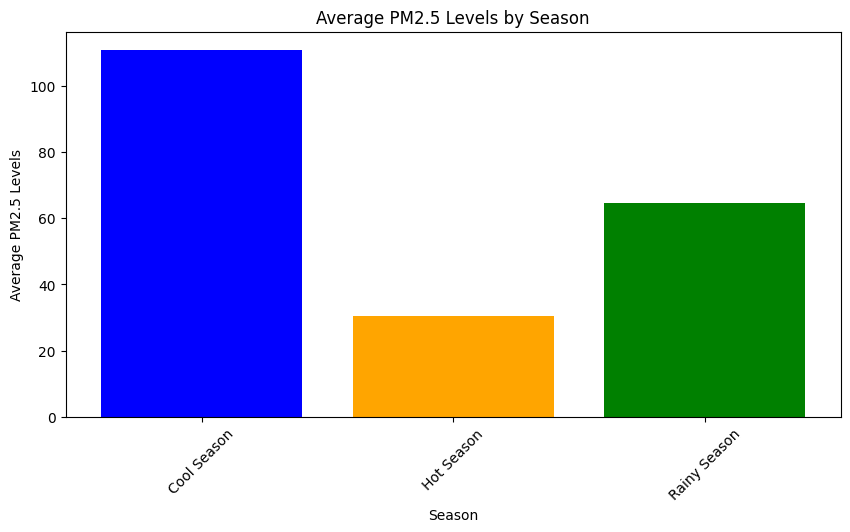

In [76]:
# Group by season and calculate the mean
seasonal_pm25 = df.groupby('season', as_index=False)['pm2_5'].mean()

# Ensure it is a DataFrame
if not isinstance(seasonal_pm25, pd.DataFrame):
    raise TypeError("seasonal_pm25 is not a DataFrame after groupby operation.")

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(seasonal_pm25['season'], seasonal_pm25['pm2_5'], color=['blue', 'orange', 'green', 'red'])
plt.title('Average PM2.5 Levels by Season')
plt.xlabel('Season')
plt.ylabel('Average PM2.5 Levels')
plt.xticks(rotation=45)
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14133 entries, 0 to 14132
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   station              14133 non-null  object        
 1   temp                 14133 non-null  float64       
 2   pressure             14133 non-null  int64         
 3   humidity             14133 non-null  int64         
 4   windspeed            14133 non-null  float64       
 5   winddeg              14133 non-null  int64         
 6   cloudall             14133 non-null  int64         
 7   weathermain          14133 non-null  object        
 8   datetime             14133 non-null  datetime64[ns]
 9   day_of_week          14133 non-null  int32         
 10  hour                 14133 non-null  int32         
 11  traffic_level        14133 non-null  int64         
 12  sea_level            14133 non-null  int64         
 13  population           14133 non-

In [78]:
df.columns

Index(['station', 'temp', 'pressure', 'humidity', 'windspeed', 'winddeg',
       'cloudall', 'weathermain', 'datetime', 'day_of_week', 'hour',
       'traffic_level', 'sea_level', 'population', 'population_density',
       'household', 'household_density', 'green_space', 'green_space_area',
       'factory_num', 'factory_area', 'lat', 'lon', 'pm2_5', 'pm10', 'so2',
       'no2', 'o3', 'co', 'month', 'season', 'season_Cool Season',
       'season_Hot Season', 'season_Rainy Season'],
      dtype='object')

### **Inspect `PM2.5`**

#### Green Space Distribution By Station

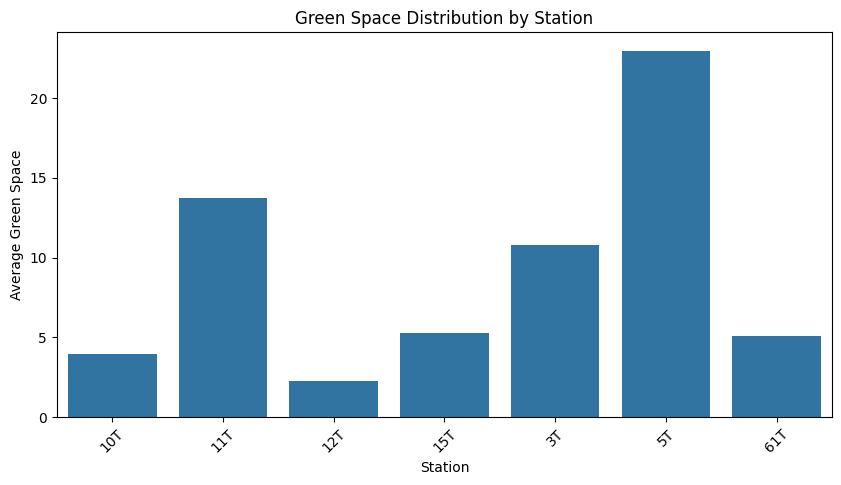

In [79]:
green_space_per_station = df.groupby('station')['green_space'].mean().reset_index()

# Create the bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x='station', y='green_space', data=green_space_per_station)
plt.title('Green Space Distribution by Station')
plt.xlabel('Station')
plt.ylabel('Average Green Space')
plt.xticks(rotation=45)  # Rotate station names for better readability
plt.show()

#### Distribution of PM2.5 Values

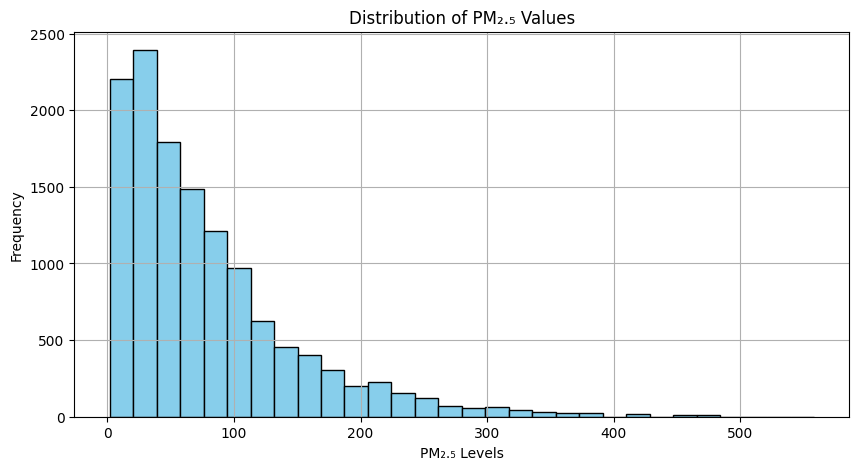

In [80]:
# Create histogram for PM2.5 distribution
plt.figure(figsize=(10, 5))
plt.hist(df['pm2_5'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of PM₂.₅ Values')
plt.xlabel('PM₂.₅ Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Average PM2.5 Level Per Month

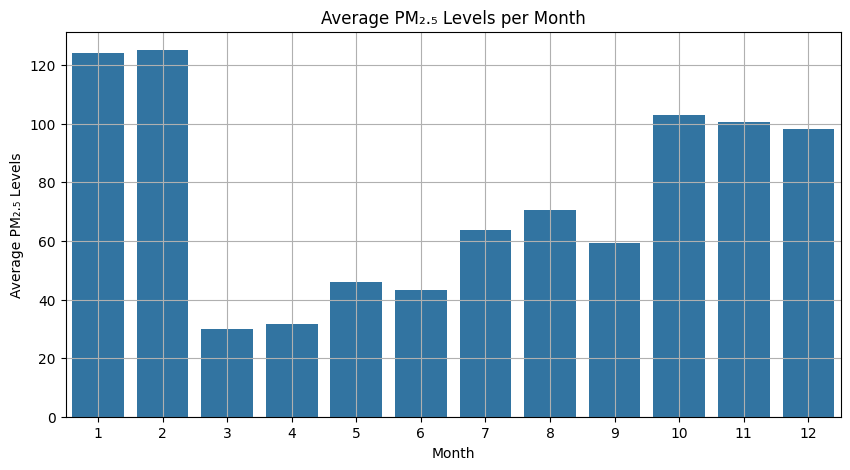

In [81]:
# Calculate average PM2.5 per month (Bar Graph)
average_pm25_per_month = df.groupby('month')['pm2_5'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=average_pm25_per_month, x='month', y='pm2_5')
plt.title('Average PM₂.₅ Levels per Month')
plt.xlabel('Month')
plt.ylabel('Average PM₂.₅ Levels')
plt.grid(True)
plt.show()

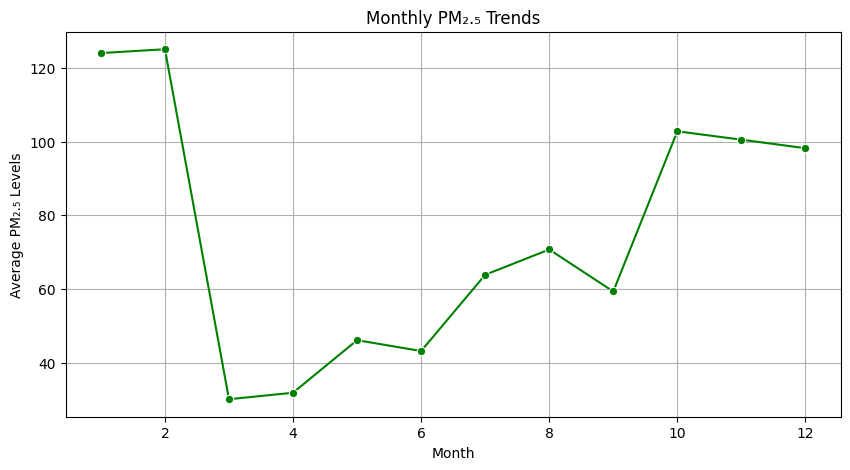

In [82]:
# Calculate average PM2.5 per month (Line Plot)
average_pm25_per_month = df.groupby('month')['pm2_5'].mean().reset_index()

# Create Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_pm25_per_month, x='month', y='pm2_5', marker='o', color='green')
plt.title('Monthly PM₂.₅ Trends')
plt.xlabel('Month')
plt.ylabel('Average PM₂.₅ Levels')
plt.grid(True)
plt.show()

#### Hourly Distribution of PM2.5 

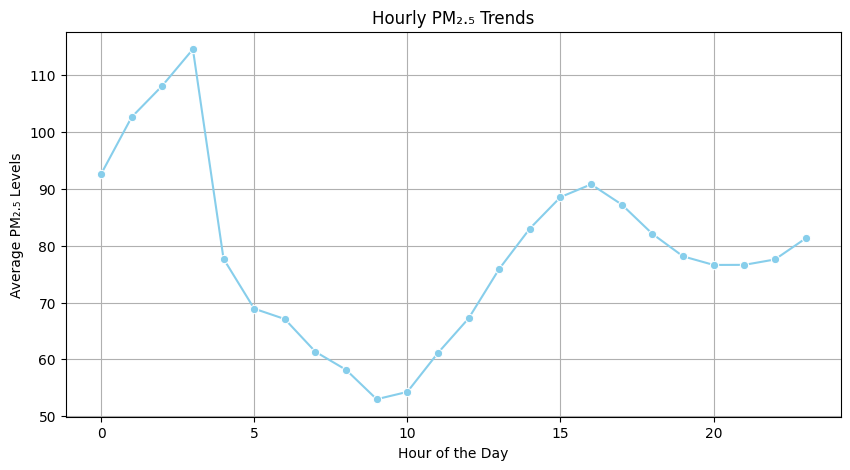

In [83]:
#Hourly Distribution of PM2.5 throughout the day
hourly_pm25_trends = df.groupby('hour')['pm2_5'].mean().reset_index()

# Create Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_pm25_trends, x='hour', y='pm2_5', marker='o', color='skyblue')
plt.title('Hourly PM₂.₅ Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM₂.₅ Levels')
plt.grid(True)
plt.show()

#### Distribution Per Day Throughtout the Week (0-Monday & 6-Sunday)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1072736171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='pm2_5', palette='coolwarm')


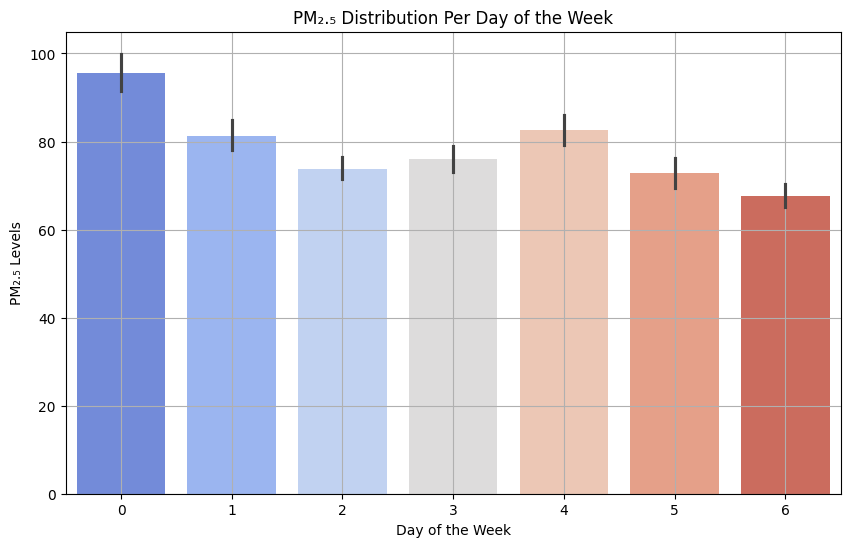

In [84]:
# Bar plot for PM2.5 distribution per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='pm2_5', palette='coolwarm')
plt.title('PM₂.₅ Distribution Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('PM₂.₅ Levels')
plt.grid(True)
plt.show()

#### Green Space and PM2.5 Levels Per Station

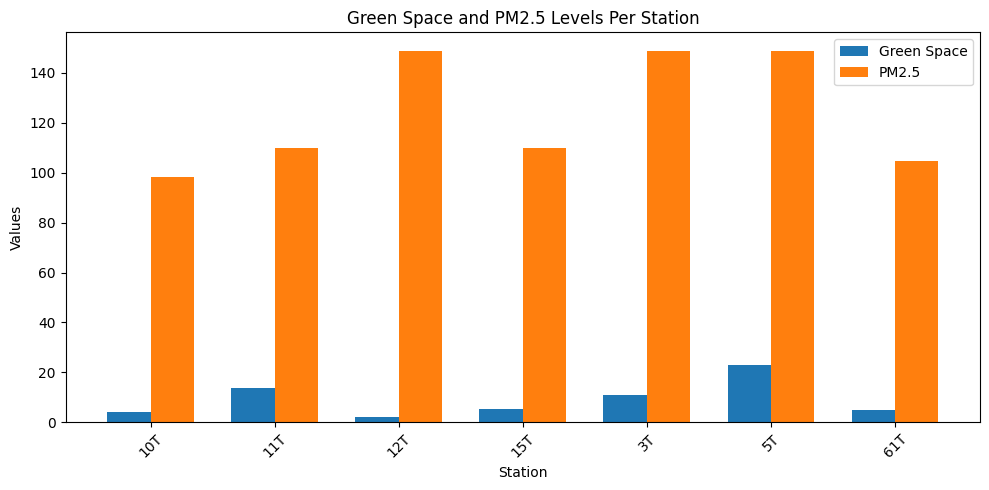

In [85]:
station_stats = df.groupby('station').agg({
    'green_space': 'mean',  # Average or sum of green space per station
    'pm10': 'mean'        # Average PM2.5 levels per station
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
# Setting the positions for the bars
bar_width = 0.35
index = range(len(station_stats['station']))

# Plotting both 'green_space' and 'pm10' data
bars1 = plt.bar(index, station_stats['green_space'], bar_width, label='Green Space')
bars2 = plt.bar([p + bar_width for p in index], station_stats['pm10'], bar_width, label='PM2.5')

# Adding labels, title, and legend
plt.xlabel('Station')
plt.ylabel('Values')
plt.title('Green Space and PM2.5 Levels Per Station')
plt.xticks([p + bar_width / 2 for p in index], station_stats['station'], rotation=45)
plt.legend()

# Show Graph
plt.tight_layout()
plt.show()

#### Average PM2.5 Level By Green Space

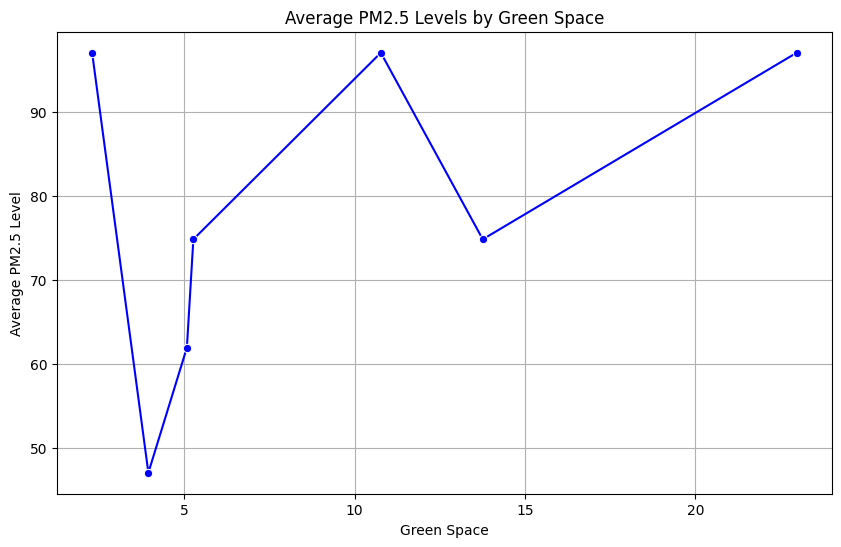

In [86]:
average_pm25_by_greenspace = df.groupby('green_space')['pm2_5'].mean().reset_index()
average_pm25_by_greenspace = average_pm25_by_greenspace.sort_values('green_space')

# Create a line plot for the average PM2.5 levels by green space
plt.figure(figsize=(10, 6))
sns.lineplot(x='green_space', y='pm2_5', data=average_pm25_by_greenspace, marker='o', color='blue')
plt.title('Average PM2.5 Levels by Green Space')
plt.xlabel('Green Space')
plt.ylabel('Average PM2.5 Level')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()


### **Inspect `PM10`**

#### Distribution of PM10 Values

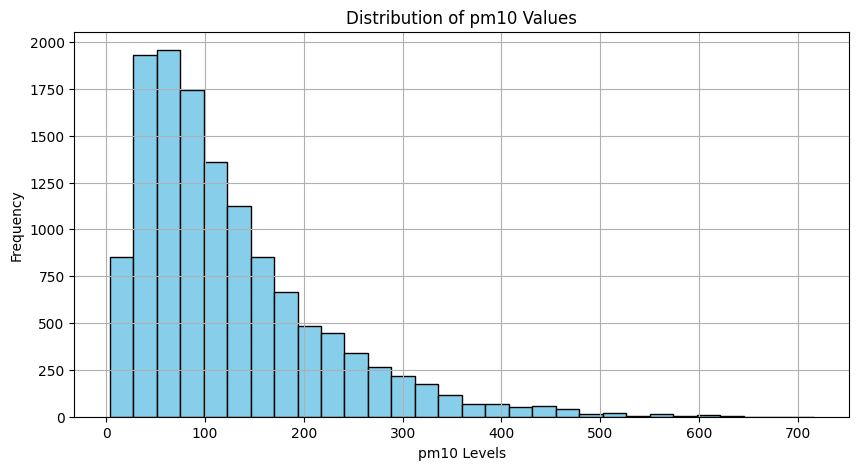

In [87]:
# Create histogram for pm10 distribution
plt.figure(figsize=(10, 5))
plt.hist(df['pm10'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of pm10 Values')
plt.xlabel('pm10 Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Average PM10 Levels Per Month

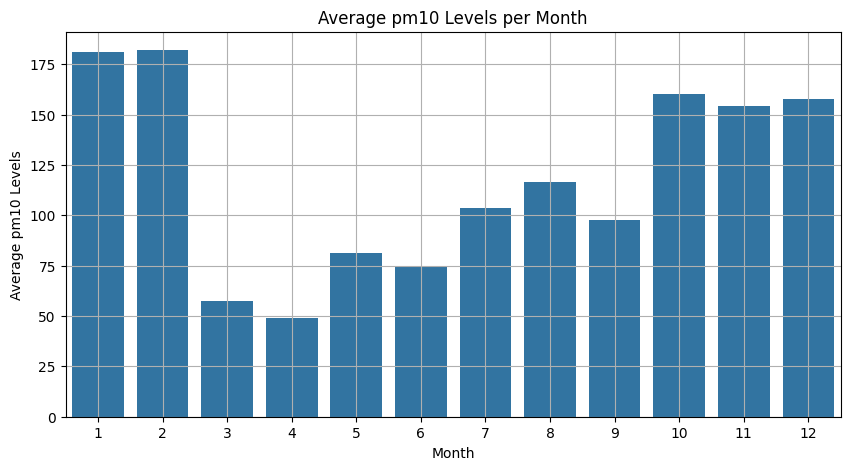

In [88]:
# Calculate average pm10 per month
average_pm10_per_month = df.groupby('month')['pm10'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=average_pm10_per_month, x='month', y='pm10')
plt.title('Average pm10 Levels per Month')
plt.xlabel('Month')
plt.ylabel('Average pm10 Levels')
plt.grid(True)
plt.show()

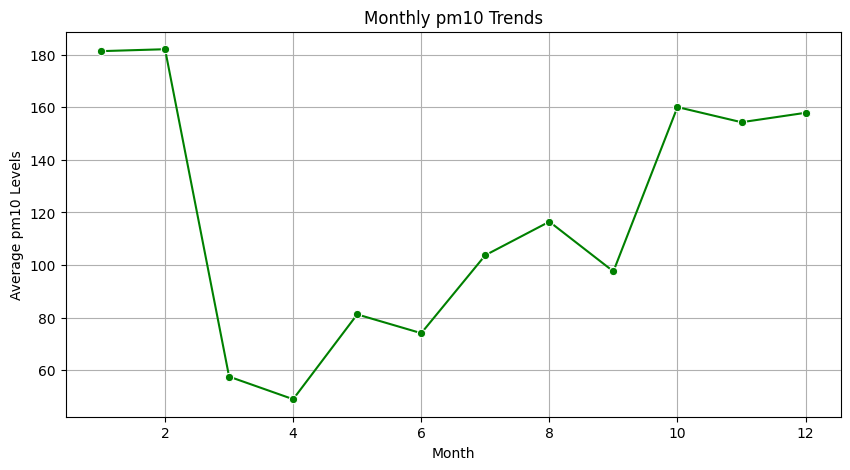

In [89]:
#Montly Trend PM10 Distribution
average_pm10_per_month = df.groupby('month')['pm10'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_pm10_per_month, x='month', y='pm10', marker='o', color='green')
plt.title('Monthly pm10 Trends')
plt.xlabel('Month')
plt.ylabel('Average pm10 Levels')
plt.grid(True)
plt.show()

#### Hourly Distribution of PM10

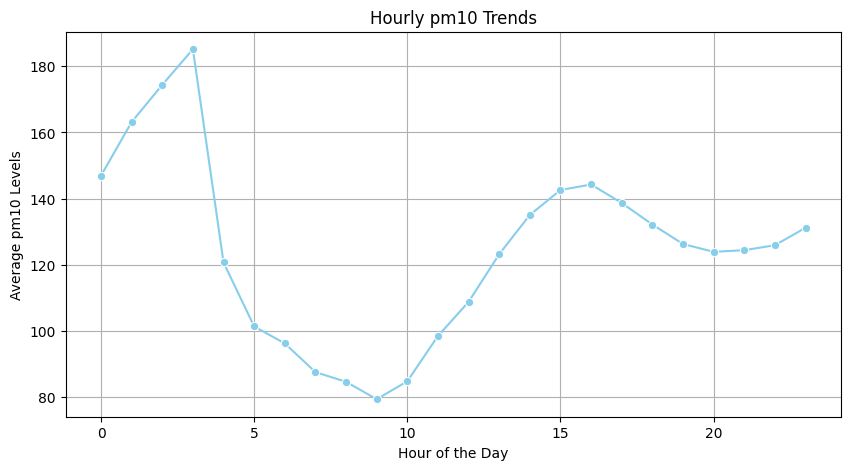

In [90]:
hourly_pm10_trends = df.groupby('hour')['pm10'].mean().reset_index()

# Create line plot for hourly trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_pm10_trends, x='hour', y='pm10', marker='o', color='skyblue')
plt.title('Hourly pm10 Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average pm10 Levels')
plt.grid(True)
plt.show()

#### PM10 Distribution Per Day of the Week (0-Monday & 6-Sunday)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\693026414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='pm10', palette='coolwarm')


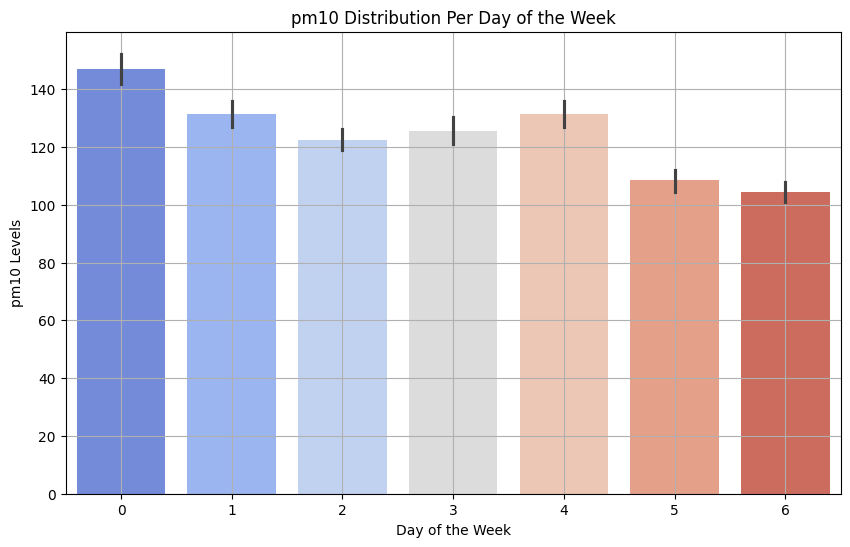

In [91]:
# Bar plot for pm10 distribution per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='pm10', palette='coolwarm')
plt.title('pm10 Distribution Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('pm10 Levels')
plt.grid(True)
plt.show()

#### Green Space and PM10 Levels per Station

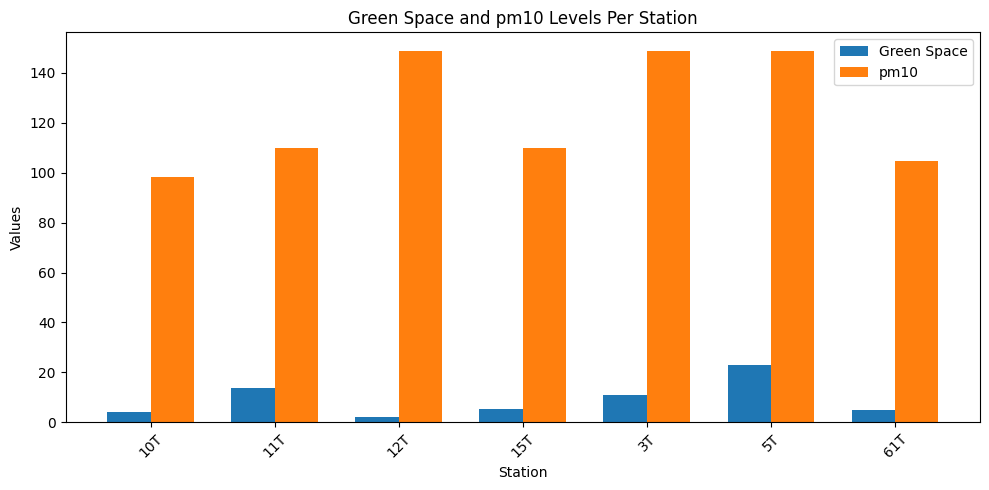

In [92]:
station_stats = df.groupby('station').agg({
    'green_space': 'mean',  # Average or sum of green space per station
    'pm10': 'mean'        # Average pm10 levels per station
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
# Setting the positions for the bars
bar_width = 0.35
index = range(len(station_stats['station']))

# Plotting both 'green_space' and 'pm10' data
bars1 = plt.bar(index, station_stats['green_space'], bar_width, label='Green Space')
bars2 = plt.bar([p + bar_width for p in index], station_stats['pm10'], bar_width, label='pm10')

# Adding labels, title, and legend
plt.xlabel('Station')
plt.ylabel('Values')
plt.title('Green Space and pm10 Levels Per Station')
plt.xticks([p + bar_width / 2 for p in index], station_stats['station'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Average PM10 Levels by Green Space

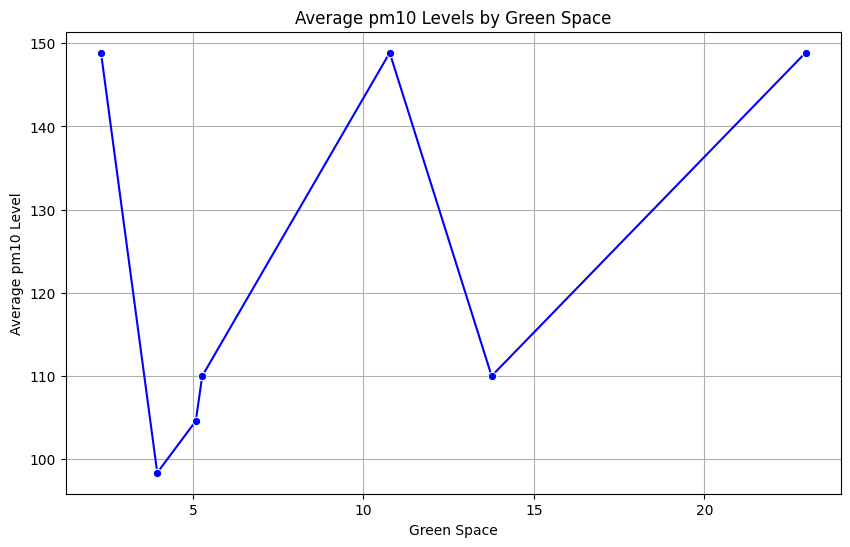

In [93]:
average_pm10_by_greenspace = df.groupby('green_space')['pm10'].mean().reset_index()
average_pm10_by_greenspace = average_pm10_by_greenspace.sort_values('green_space')

# Create a line plot for the average pm10 levels by green space
plt.figure(figsize=(10, 6))
sns.lineplot(x='green_space', y='pm10', data=average_pm10_by_greenspace, marker='o', color='blue')
plt.title('Average pm10 Levels by Green Space')
plt.xlabel('Green Space')
plt.ylabel('Average pm10 Level')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

### **Inspect `Sulfur dioxide(SO2)`**

#### Distribution of SO2 Values

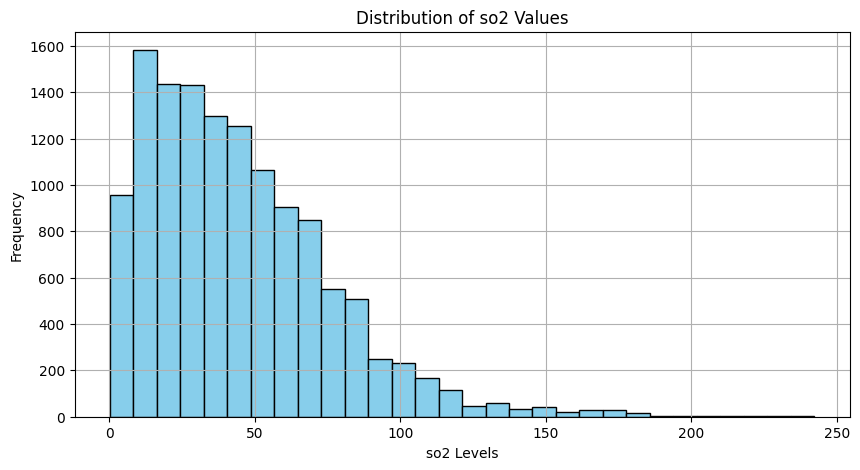

In [94]:
# Create histogram for so2 distribution
plt.figure(figsize=(10, 5))
plt.hist(df['so2'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of so2 Values')
plt.xlabel('so2 Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Average Distribution of SO2 Levels per Month

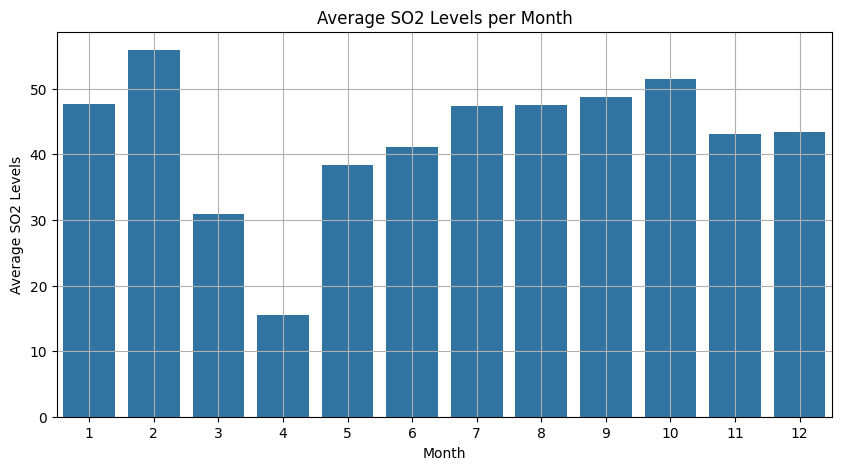

In [95]:
# Calculate average so2 per month
average_so2_per_month = df.groupby('month')['so2'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=average_so2_per_month, x='month', y='so2')
plt.title('Average SO2 Levels per Month')
plt.xlabel('Month')
plt.ylabel('Average SO2 Levels')
plt.grid(True)
plt.show()

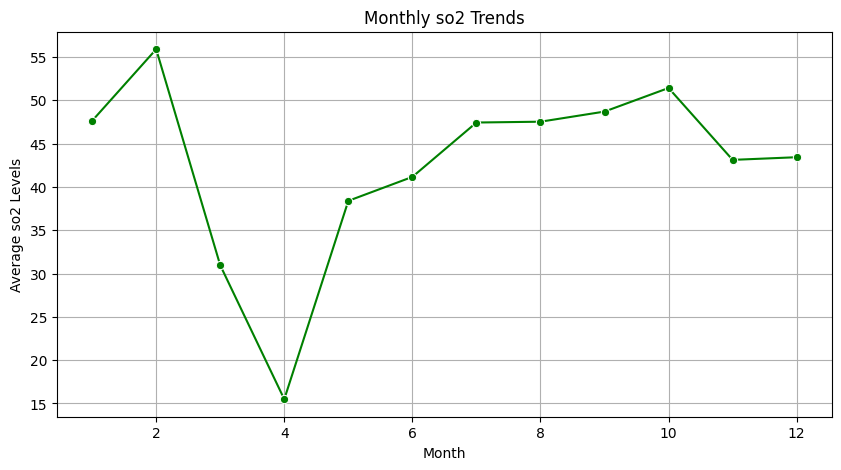

In [96]:
#Trends of Montly SO2 Distribution
average_so2_per_month = df.groupby('month')['so2'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=average_so2_per_month, x='month', y='so2', marker='o', color='green')
plt.title('Monthly so2 Trends')
plt.xlabel('Month')
plt.ylabel('Average so2 Levels')
plt.grid(True)
plt.show()

#### Hourly Distribution of SO2

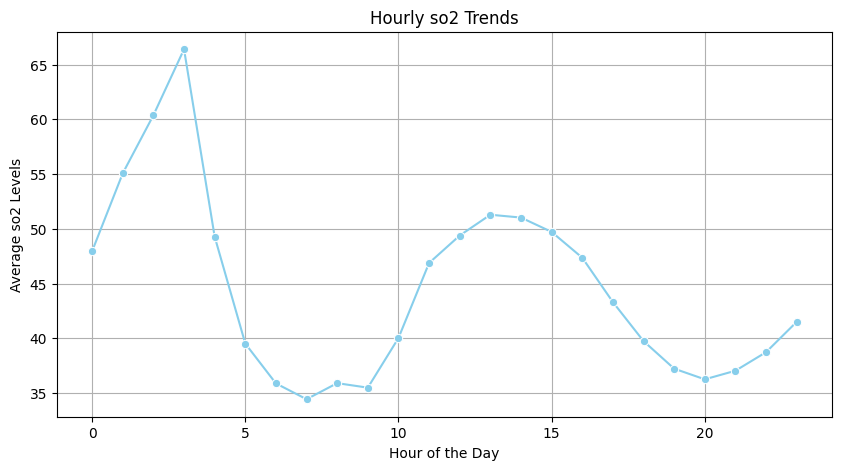

In [97]:
hourly_so2_trends = df.groupby('hour')['so2'].mean().reset_index()

# Create line plot for hourly trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_so2_trends, x='hour', y='so2', marker='o', color='skyblue')
plt.title('Hourly so2 Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average so2 Levels')
plt.grid(True)
plt.show()

#### Distributuion of SO2 Per Day of the Week (0-Monday & 6-Sunday)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1278283898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='so2', palette='coolwarm')


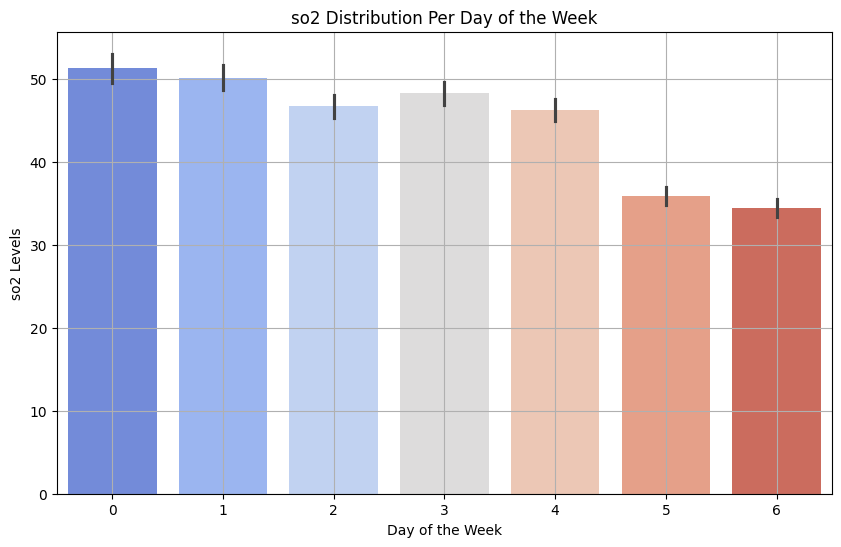

In [98]:
# Bar plot for so2 distribution per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='so2', palette='coolwarm')
plt.title('so2 Distribution Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('so2 Levels')
plt.grid(True)
plt.show()

#### Green Space and SO2 Levels Per Station

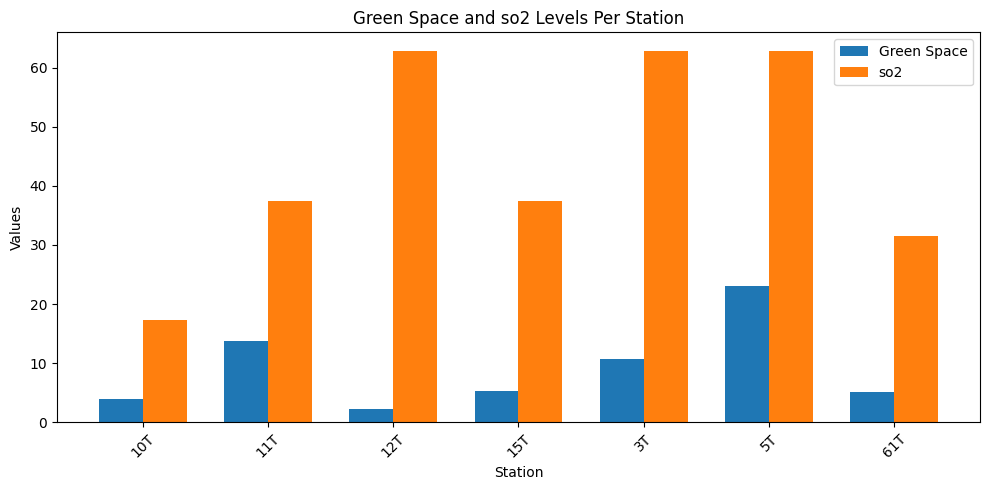

In [99]:
station_stats = df.groupby('station').agg({
    'green_space': 'mean',  # Average or sum of green space per station
    'so2': 'mean'        # Average so2 levels per station
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
# Setting the positions for the bars
bar_width = 0.35
index = range(len(station_stats['station']))

# Plotting both 'green_space' and 'so2' data
bars1 = plt.bar(index, station_stats['green_space'], bar_width, label='Green Space')
bars2 = plt.bar([p + bar_width for p in index], station_stats['so2'], bar_width, label='so2')

# Adding labels, title, and legend
plt.xlabel('Station')
plt.ylabel('Values')
plt.title('Green Space and so2 Levels Per Station')
plt.xticks([p + bar_width / 2 for p in index], station_stats['station'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Average SO2 Levels by Green Space

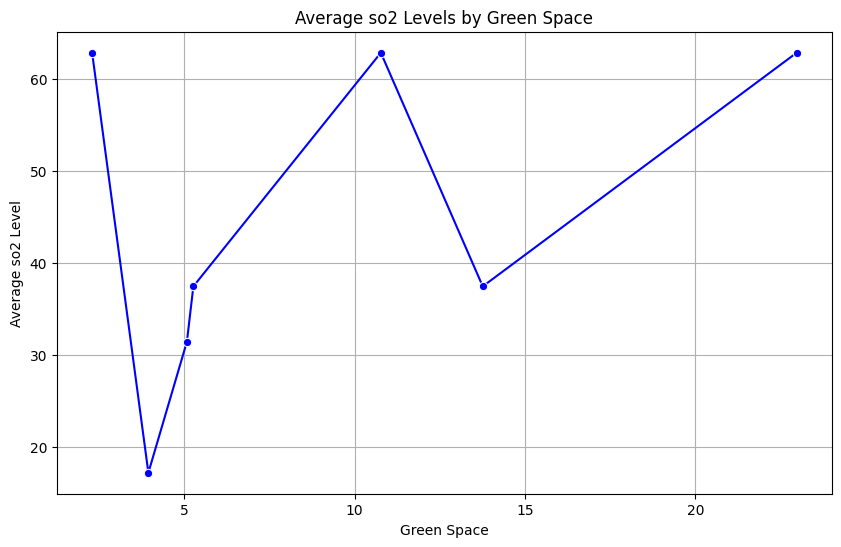

In [100]:
average_so2_by_greenspace = df.groupby('green_space')['so2'].mean().reset_index()
average_so2_by_greenspace = average_so2_by_greenspace.sort_values('green_space')

# Create a line plot for the average so2 levels by green space
plt.figure(figsize=(10, 6))
sns.lineplot(x='green_space', y='so2', data=average_so2_by_greenspace, marker='o', color='blue')
plt.title('Average so2 Levels by Green Space')
plt.xlabel('Green Space')
plt.ylabel('Average so2 Level')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

### **Inspect `Nitrogen dioxide (NO2)`**

#### Distributuon of NO2 Values

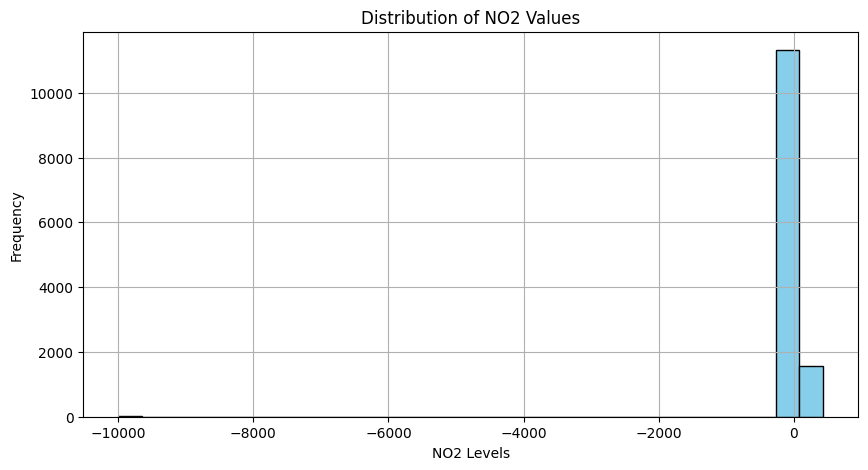

In [101]:
# Create histogram for no2 distribution
plt.figure(figsize=(10, 5))
plt.hist(df['no2'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of NO2 Values')
plt.xlabel('NO2 Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Average Distributuon of NO2 Levels per Month

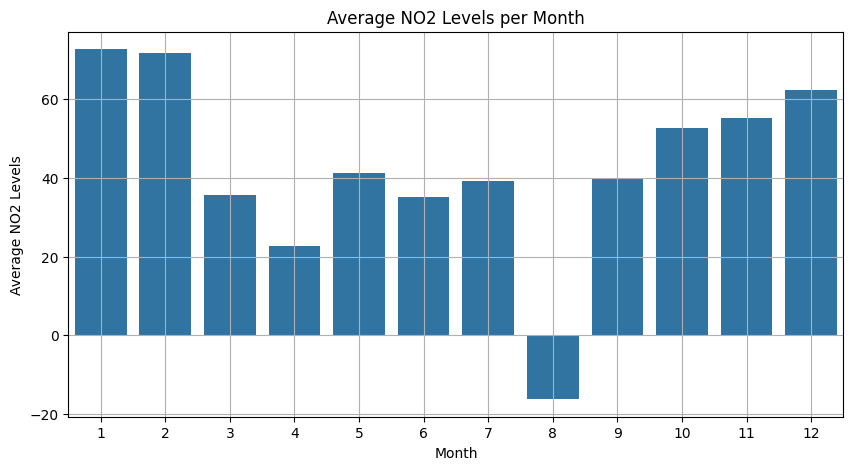

In [102]:
# Calculate average no2 per month
average_no2_per_month = df.groupby('month')['no2'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=average_no2_per_month, x='month', y='no2')
plt.title('Average NO2 Levels per Month')
plt.xlabel('Month')
plt.ylabel('Average NO2 Levels')
plt.grid(True)
plt.show()

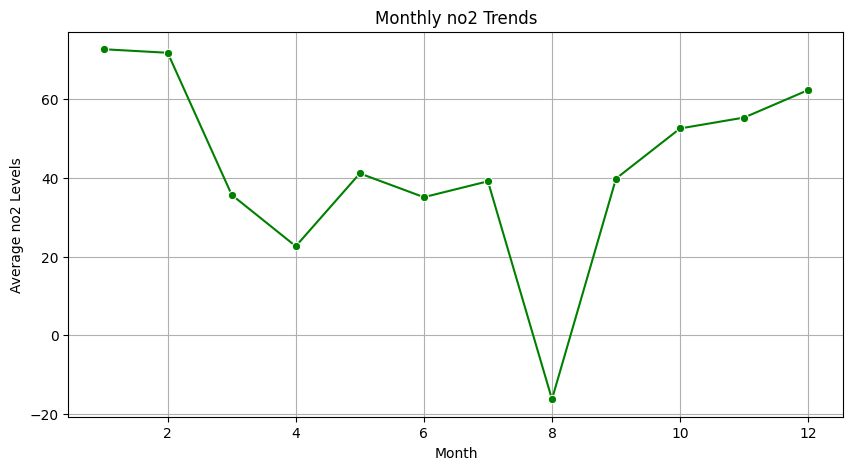

In [103]:
# You can reuse average_no2_per_month calculated previously
average_no2_per_month = df.groupby('month')['no2'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=average_no2_per_month, x='month', y='no2', marker='o', color='green')
plt.title('Monthly no2 Trends')
plt.xlabel('Month')
plt.ylabel('Average no2 Levels')
plt.grid(True)
plt.show()

#### Hourly Distribution of NO2 Trend

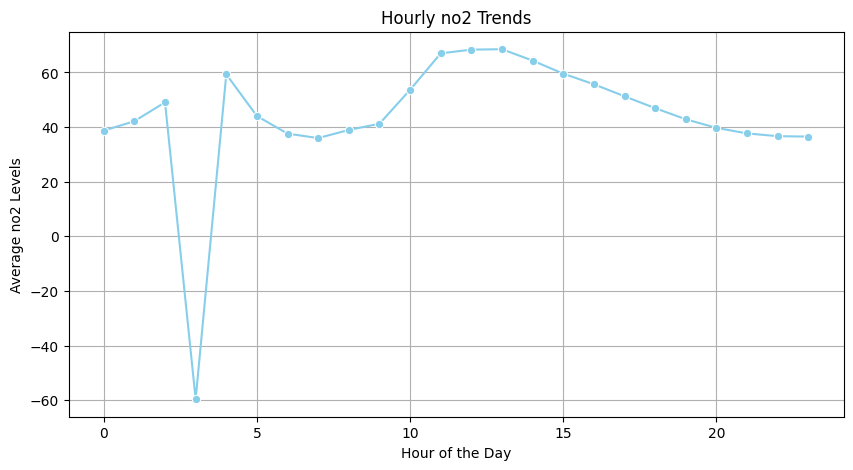

In [104]:
hourly_no2_trends = df.groupby('hour')['no2'].mean().reset_index()

# Create line plot for hourly trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_no2_trends, x='hour', y='no2', marker='o', color='skyblue')
plt.title('Hourly no2 Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average no2 Levels')
plt.grid(True)
plt.show()

#### NO2 Distribution Per Day of the Week (0-Monday & 6-Sunday)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1610298790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='no2', palette='coolwarm')


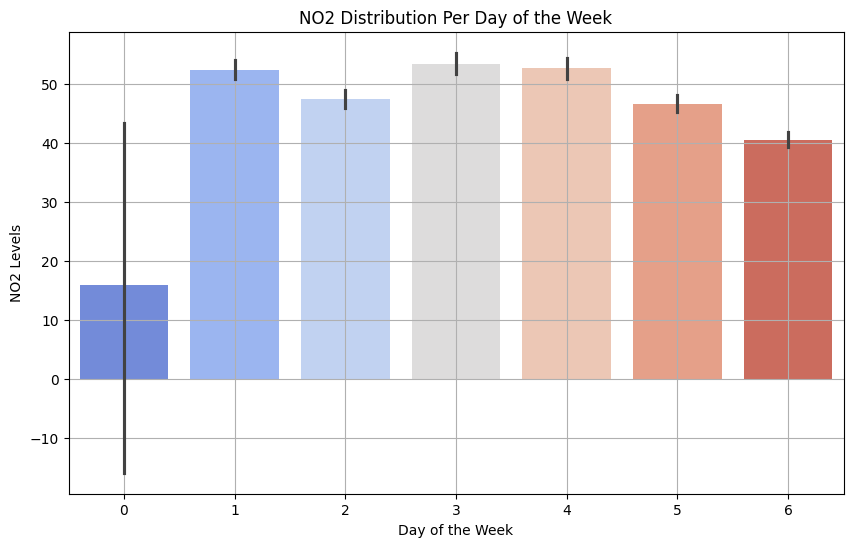

In [105]:
# Bar plot for no2 distribution per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='no2', palette='coolwarm')
plt.title('NO2 Distribution Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('NO2 Levels')
plt.grid(True)
plt.show()

#### Green Space and NO2 Levels Per Station

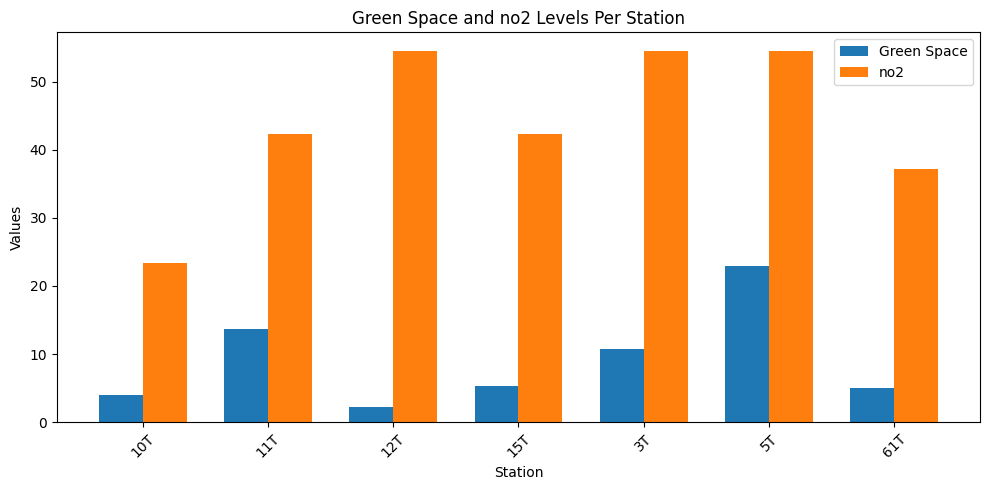

In [106]:
station_stats = df.groupby('station').agg({
    'green_space': 'mean',  # Average or sum of green space per station
    'no2': 'mean'        # Average no2 levels per station
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
# Setting the positions for the bars
bar_width = 0.35
index = range(len(station_stats['station']))

# Plotting both 'green_space' and 'no2' data
bars1 = plt.bar(index, station_stats['green_space'], bar_width, label='Green Space')
bars2 = plt.bar([p + bar_width for p in index], station_stats['no2'], bar_width, label='no2')

# Adding labels, title, and legend
plt.xlabel('Station')
plt.ylabel('Values')
plt.title('Green Space and no2 Levels Per Station')
plt.xticks([p + bar_width / 2 for p in index], station_stats['station'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Average NO2 Levels by Green Space

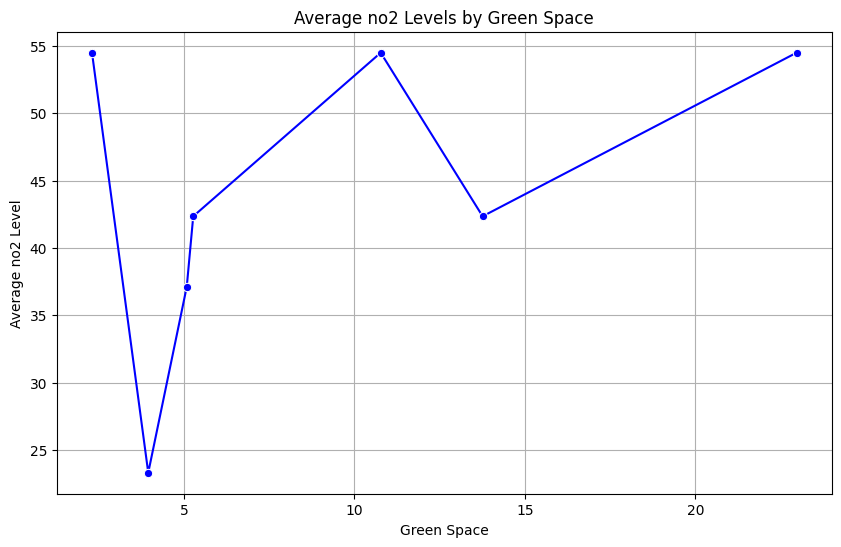

In [107]:
average_no2_by_greenspace = df.groupby('green_space')['no2'].mean().reset_index()
average_no2_by_greenspace = average_no2_by_greenspace.sort_values('green_space')

# Create a line plot for the average no2 levels by green space
plt.figure(figsize=(10, 6))
sns.lineplot(x='green_space', y='no2', data=average_no2_by_greenspace, marker='o', color='blue')
plt.title('Average no2 Levels by Green Space')
plt.xlabel('Green Space')
plt.ylabel('Average no2 Level')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

### **Inspect `Ozone Level(O3)`**

#### Distribution of O3 Values

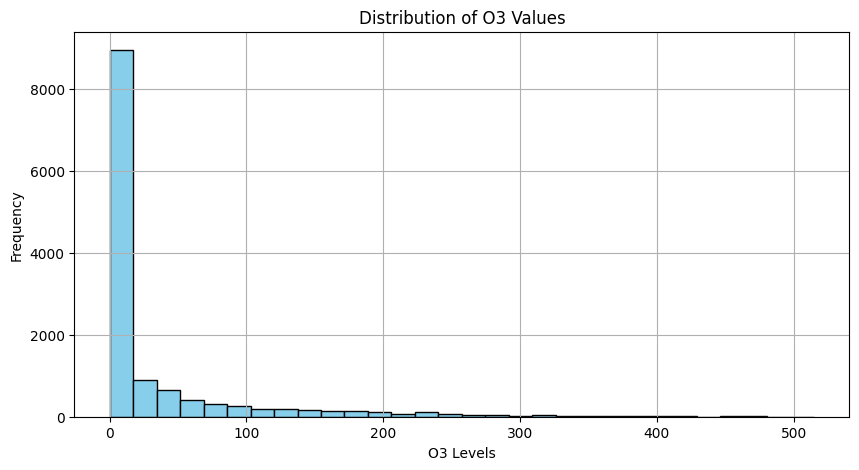

In [108]:
# Create histogram for o3 distribution
plt.figure(figsize=(10, 5))
plt.hist(df['o3'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of O3 Values')
plt.xlabel('O3 Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Average O3 Level Per Month

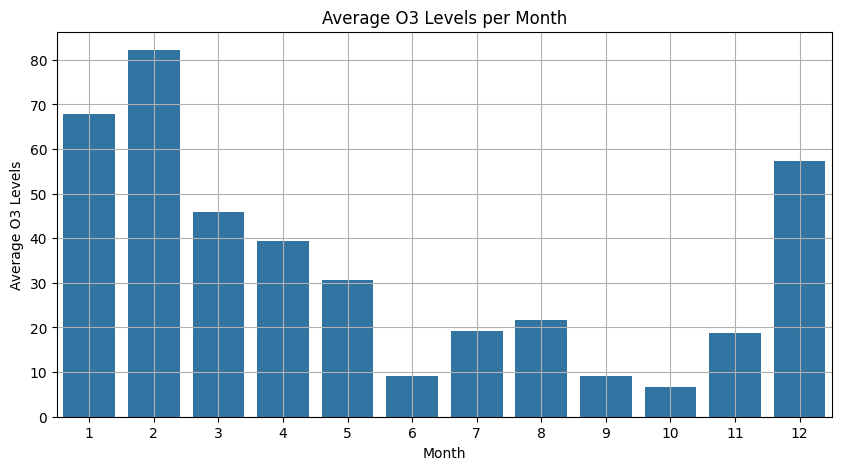

In [109]:
# Calculate average o3 per month
average_o3_per_month = df.groupby('month')['o3'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=average_o3_per_month, x='month', y='o3')
plt.title('Average O3 Levels per Month')
plt.xlabel('Month')
plt.ylabel('Average O3 Levels')
plt.grid(True)
plt.show()

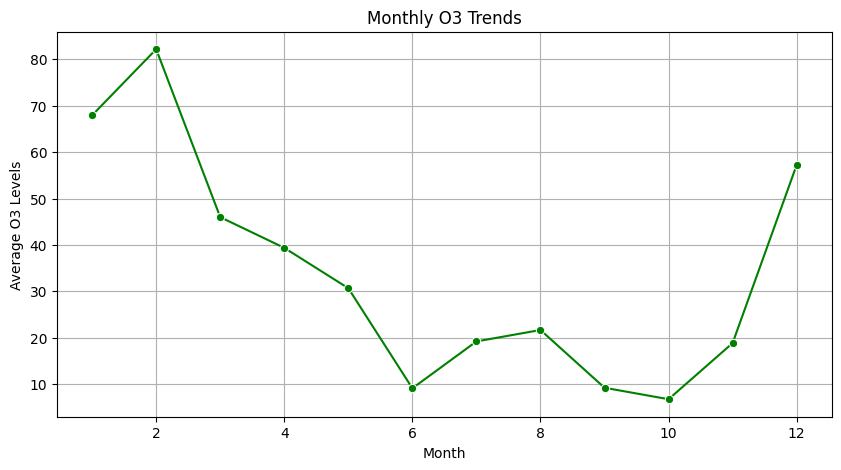

In [110]:
# You can reuse average_o3_per_month calculated previously
average_o3_per_month = df.groupby('month')['o3'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=average_o3_per_month, x='month', y='o3', marker='o', color='green')
plt.title('Monthly O3 Trends')
plt.xlabel('Month')
plt.ylabel('Average O3 Levels')
plt.grid(True)
plt.show()

#### Average Hourly O3 Trends

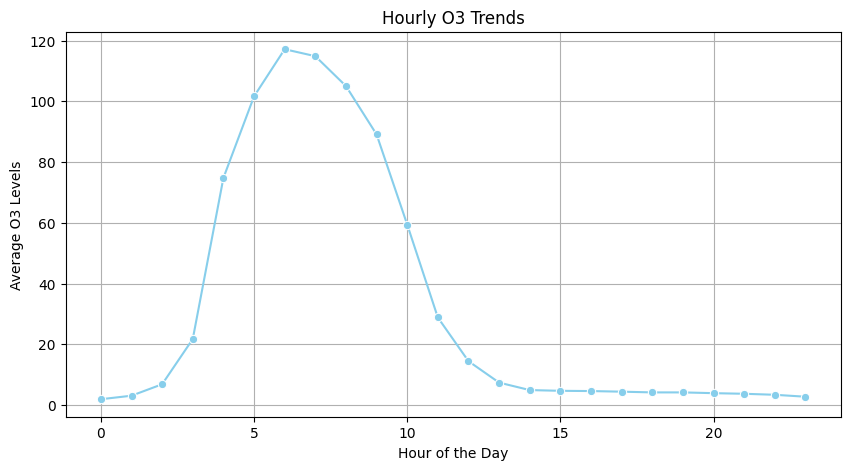

In [111]:
hourly_o3_trends = df.groupby('hour')['o3'].mean().reset_index()

# Create line plot for hourly trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_o3_trends, x='hour', y='o3', marker='o', color='skyblue')
plt.title('Hourly O3 Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average O3 Levels')
plt.grid(True)
plt.show()

#### O3 Distribution per Day of the Week (0-Monday & 6-Sunday)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\605535918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='o3', palette='coolwarm')


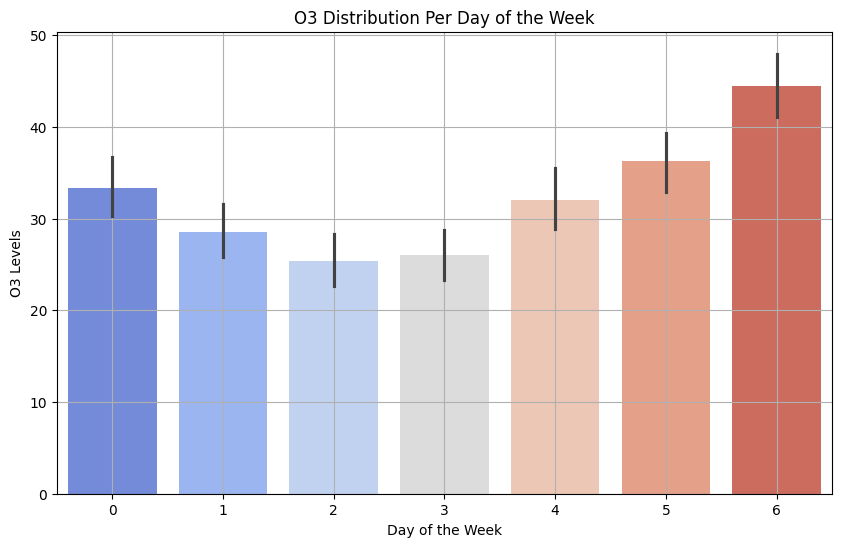

In [112]:
# Bar plot for o3 distribution per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='o3', palette='coolwarm')
plt.title('O3 Distribution Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('O3 Levels')
plt.grid(True)
plt.show()

#### Green Space nad O3 Levels Per Station

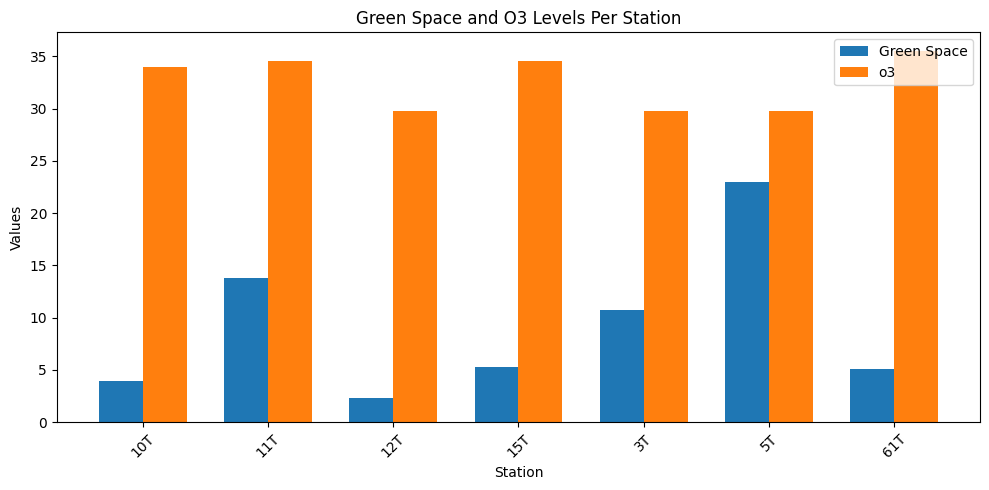

In [113]:
station_stats = df.groupby('station').agg({
    'green_space': 'mean',  # Average or sum of green space per station
    'o3': 'mean'        # Average o3 levels per station
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
# Setting the positions for the bars
bar_width = 0.35
index = range(len(station_stats['station']))

# Plotting both 'green_space' and 'o3' data
bars1 = plt.bar(index, station_stats['green_space'], bar_width, label='Green Space')
bars2 = plt.bar([p + bar_width for p in index], station_stats['o3'], bar_width, label='o3')

# Adding labels, title, and legend
plt.xlabel('Station')
plt.ylabel('Values')
plt.title('Green Space and O3 Levels Per Station')
plt.xticks([p + bar_width / 2 for p in index], station_stats['station'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Average O3 Levels by Green Space

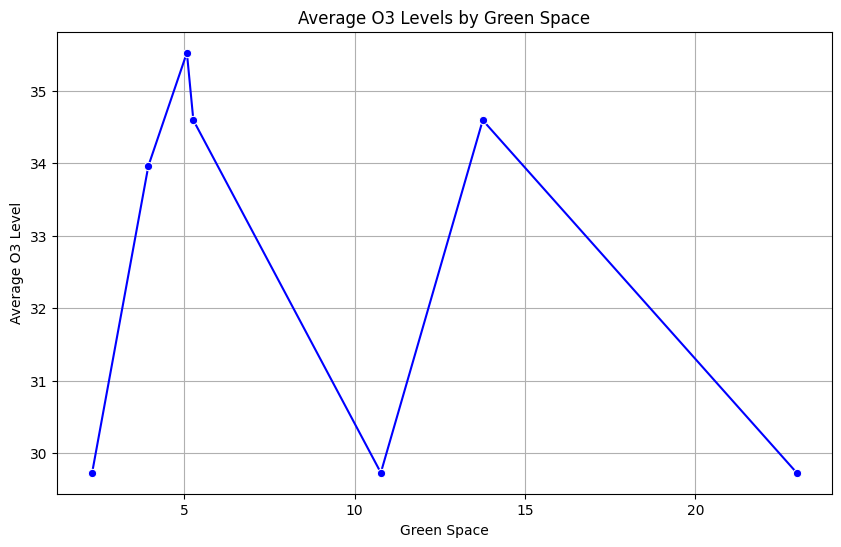

In [114]:
average_o3_by_greenspace = df.groupby('green_space')['o3'].mean().reset_index()
average_o3_by_greenspace = average_o3_by_greenspace.sort_values('green_space')

# Create a line plot for the average o3 levels by green space
plt.figure(figsize=(10, 6))
sns.lineplot(x='green_space', y='o3', data=average_o3_by_greenspace, marker='o', color='blue')
plt.title('Average O3 Levels by Green Space')
plt.xlabel('Green Space')
plt.ylabel('Average O3 Level')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

### **Inspect `Carbon Monoxide(CO)`**

#### Distribution of CO Values

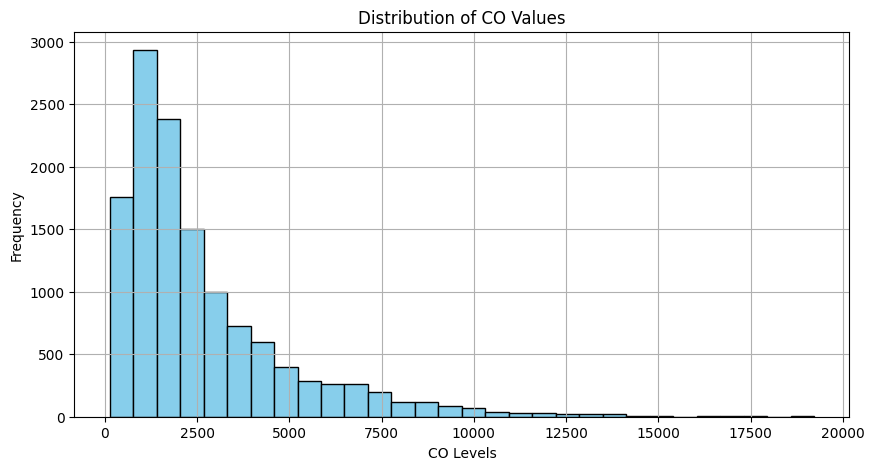

In [115]:
# Create histogram for co distribution
plt.figure(figsize=(10, 5))
plt.hist(df['co'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CO Values')
plt.xlabel('CO Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Average CO Levels Per Month

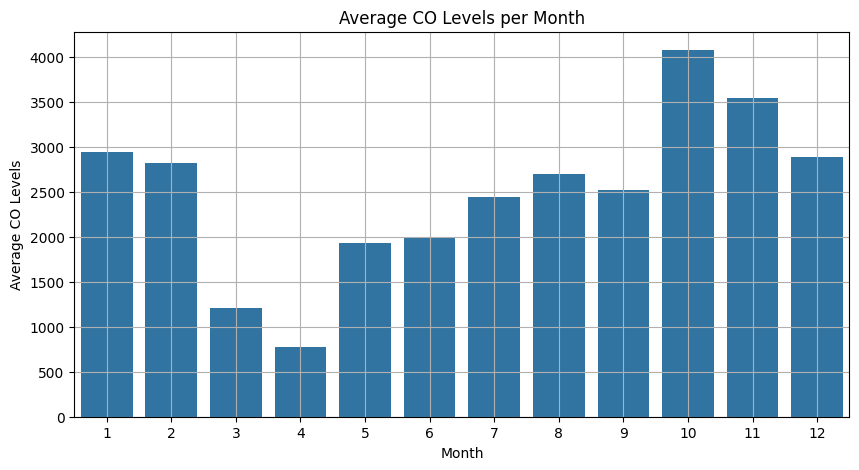

In [116]:
# Calculate average co per month
average_co_per_month = df.groupby('month')['co'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=average_co_per_month, x='month', y='co')
plt.title('Average CO Levels per Month')
plt.xlabel('Month')
plt.ylabel('Average CO Levels')
plt.grid(True)
plt.show()

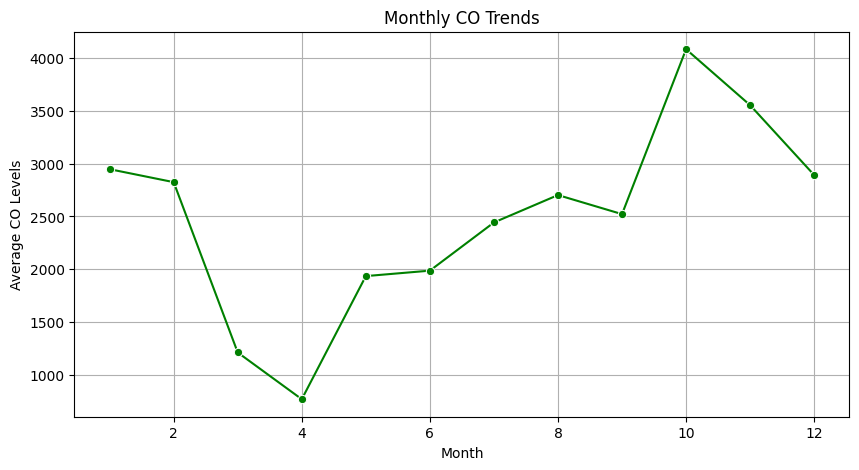

In [117]:
# You can reuse average_co_per_month calculated previously
average_co_per_month = df.groupby('month')['co'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=average_co_per_month, x='month', y='co', marker='o', color='green')
plt.title('Monthly CO Trends')
plt.xlabel('Month')
plt.ylabel('Average CO Levels')
plt.grid(True)
plt.show()

#### Hourly Distribution of CO Trends

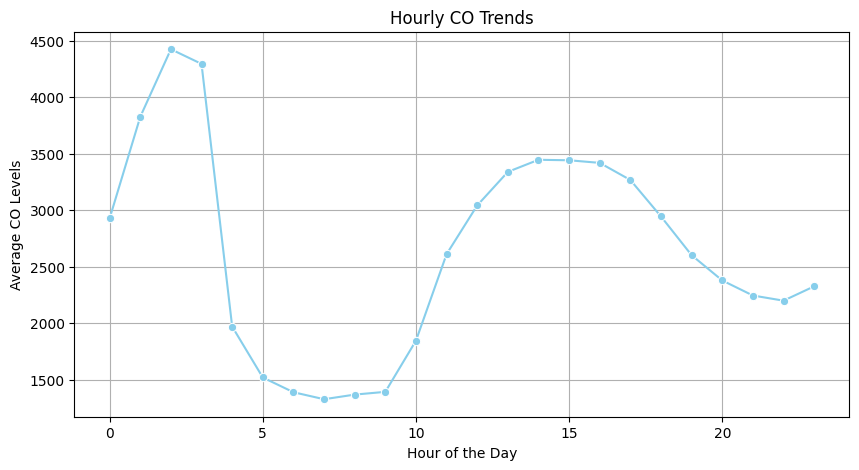

In [118]:
hourly_co_trends = df.groupby('hour')['co'].mean().reset_index()

# Create line plot for hourly trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_co_trends, x='hour', y='co', marker='o', color='skyblue')
plt.title('Hourly CO Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average CO Levels')
plt.grid(True)
plt.show()

#### CO Distribution Per Day of the Week

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\313729694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='co', palette='coolwarm')


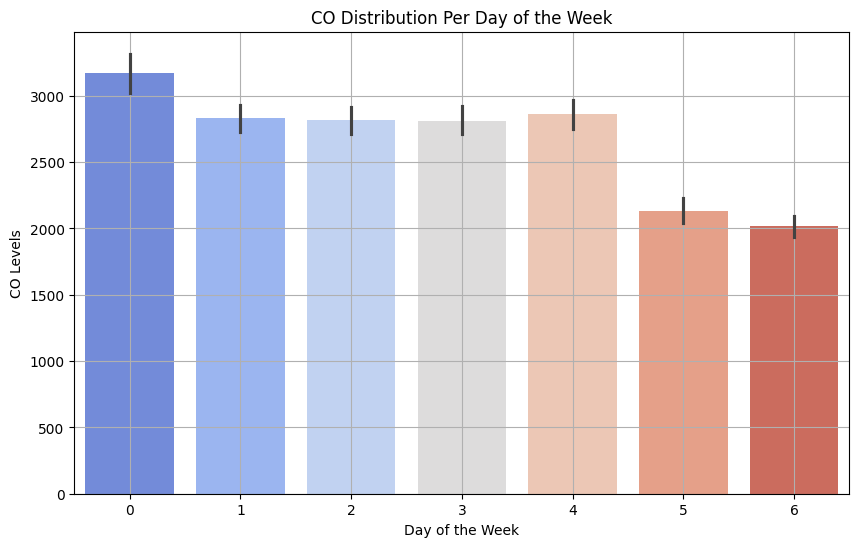

In [119]:
# Bar plot for co distribution per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='co', palette='coolwarm')
plt.title('CO Distribution Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('CO Levels')
plt.grid(True)
plt.show()

#### Green Space and CO Levels Per Station

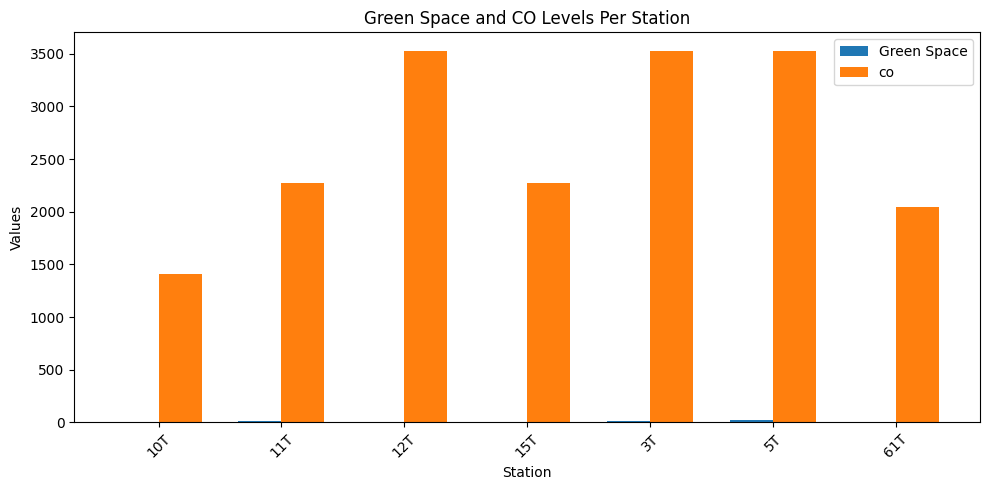

In [120]:
station_stats = df.groupby('station').agg({
    'green_space': 'mean',  # Average or sum of green space per station
    'co': 'mean'        # Average co levels per station
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
# Setting the positions for the bars
bar_width = 0.35
index = range(len(station_stats['station']))

# Plotting both 'green_space' and 'co' data
bars1 = plt.bar(index, station_stats['green_space'], bar_width, label='Green Space')
bars2 = plt.bar([p + bar_width for p in index], station_stats['co'], bar_width, label='co')

# Adding labels, title, and legend
plt.xlabel('Station')
plt.ylabel('Values')
plt.title('Green Space and CO Levels Per Station')
plt.xticks([p + bar_width / 2 for p in index], station_stats['station'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Average CO Levels By Green Space

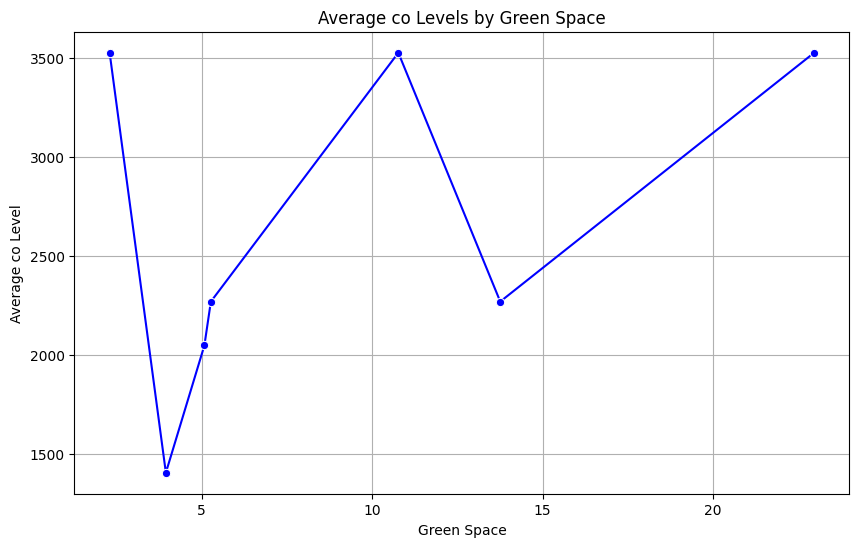

In [121]:
average_co_by_greenspace = df.groupby('green_space')['co'].mean().reset_index()
average_co_by_greenspace = average_co_by_greenspace.sort_values('green_space')

# Create a line plot for the average co levels by green space
plt.figure(figsize=(10, 6))
sns.lineplot(x='green_space', y='co', data=average_co_by_greenspace, marker='o', color='blue')
plt.title('Average co Levels by Green Space')
plt.xlabel('Green Space')
plt.ylabel('Average co Level')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

### **Inspect `Other Variables`**

#### Average PM2.5 Levels by Traffic Level

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1396813456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_level', y='pm2_5', data=avg_pm25_by_traffic, palette="Blues_d")


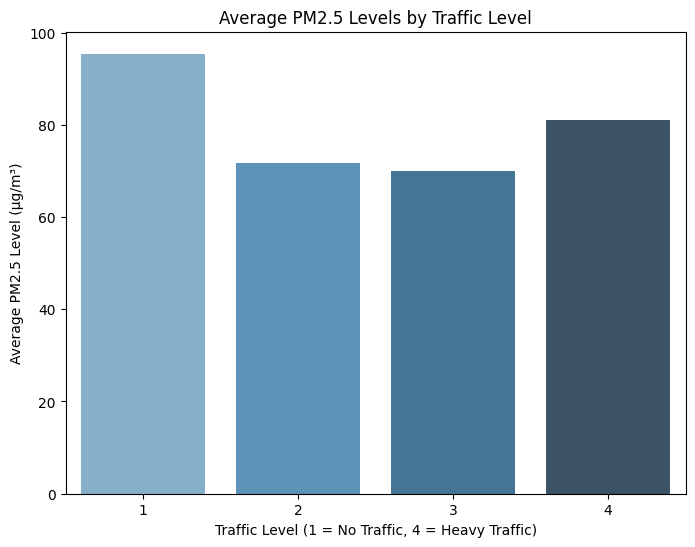

In [122]:
# Calculate the average PM2.5 for each traffic level
avg_pm25_by_traffic = df.groupby('traffic_level')['pm2_5'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='traffic_level', y='pm2_5', data=avg_pm25_by_traffic, palette="Blues_d")

# Add labels and title
plt.xlabel('Traffic Level (1 = No Traffic, 4 = Heavy Traffic)')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.title('Average PM2.5 Levels by Traffic Level')

# Show the plot
plt.show()

#### Traffic Level by Hour of the Day

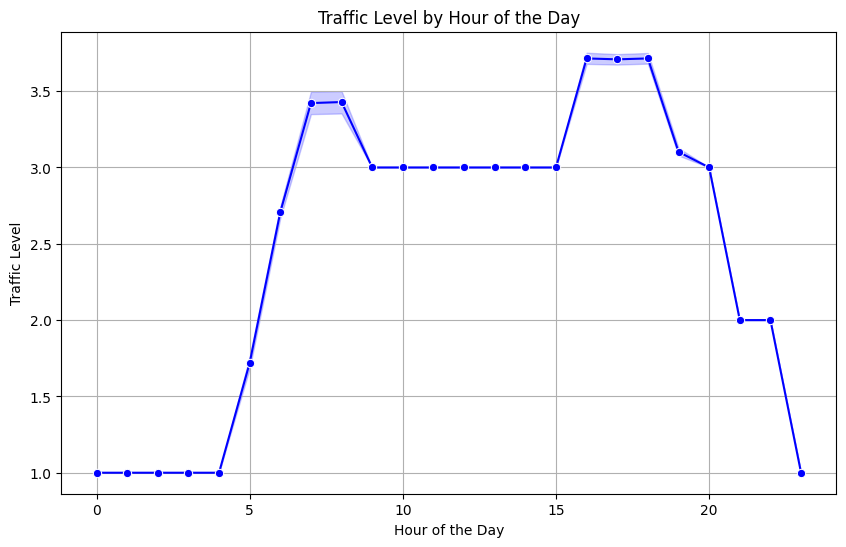

In [123]:
# Create a line plot for Traffic Level by Hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='traffic_level', data=df, marker='o', color='b')

# Label the axes and the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Level')
plt.title('Traffic Level by Hour of the Day')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

### **Analyzing Correlation** `Correlation between PM2.5 and Other Air Quality Indices (PM10, SO2, NO2, O3, CO)'`

#### Correlation Plot between PM10 and PM2.5

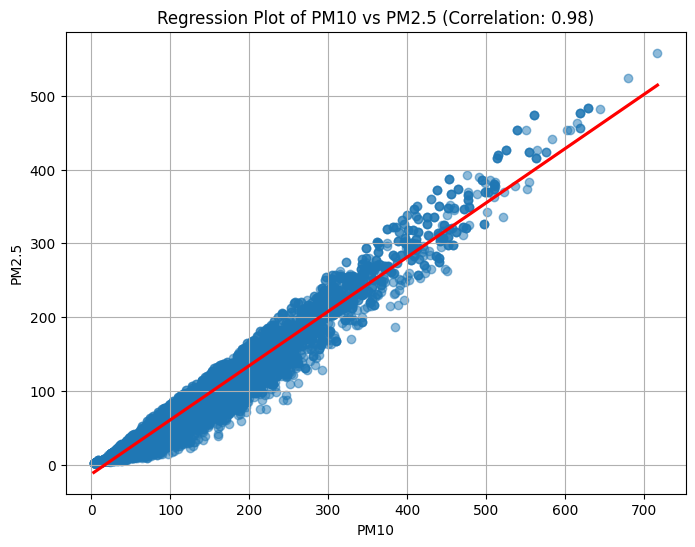

In [124]:
# Create the regression plot for pm10 vs. pm2.5
plt.figure(figsize=(8, 6))
sns.regplot(x=df['pm10'], y=df['pm2_5'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.title(f"Regression Plot of PM10 vs PM2.5 (Correlation: {df['pm10'].corr(df['pm2_5']):.2f})")
plt.grid()
plt.show()

#### Correlation Plot between SO2 and PM2.5

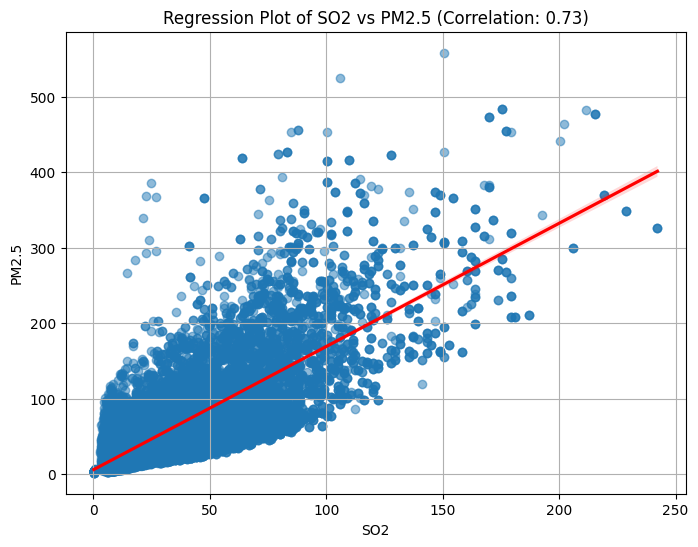

In [125]:
# Create the regression plot for so2 vs. pm2.5
plt.figure(figsize=(8, 6))
sns.regplot(x=df['so2'], y=df['pm2_5'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("SO2")
plt.ylabel("PM2.5")
plt.title(f"Regression Plot of SO2 vs PM2.5 (Correlation: {df['so2'].corr(df['pm2_5']):.2f})")
plt.grid()
plt.show()

#### Correlation Plot between NO2 and PM2.5

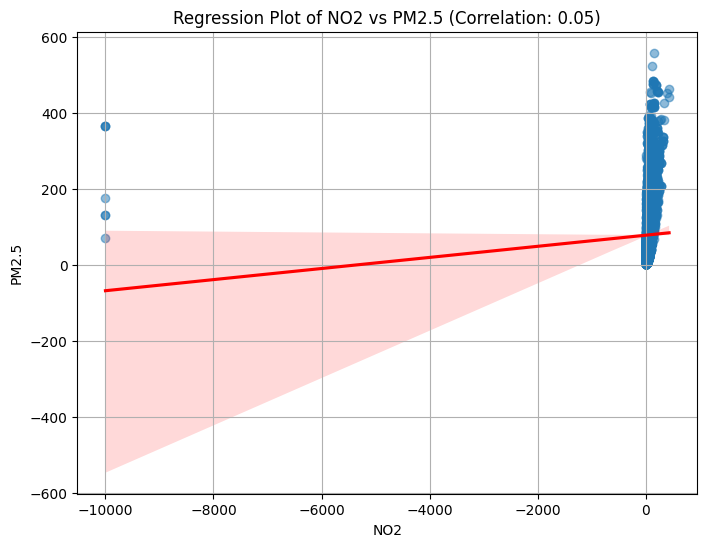

In [126]:
# Create the regression plot for no2 vs. pm2.5
plt.figure(figsize=(8, 6))
sns.regplot(x=df['no2'], y=df['pm2_5'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("NO2")
plt.ylabel("PM2.5")
plt.title(f"Regression Plot of NO2 vs PM2.5 (Correlation: {df['no2'].corr(df['pm2_5']):.2f})")
plt.grid()
plt.show()

#### Correlation Plot between O3 and PM2.5

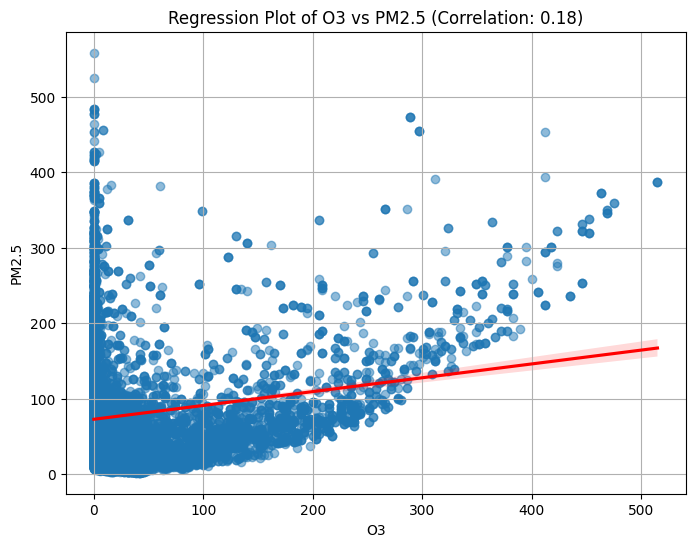

In [127]:
# Create the regression plot for o3 vs. pm2.5
plt.figure(figsize=(8, 6))
sns.regplot(x=df['o3'], y=df['pm2_5'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("O3")
plt.ylabel("PM2.5")
plt.title(f"Regression Plot of O3 vs PM2.5 (Correlation: {df['o3'].corr(df['pm2_5']):.2f})")
plt.grid()
plt.show()

#### Correlation Plot between CO and PM2.5

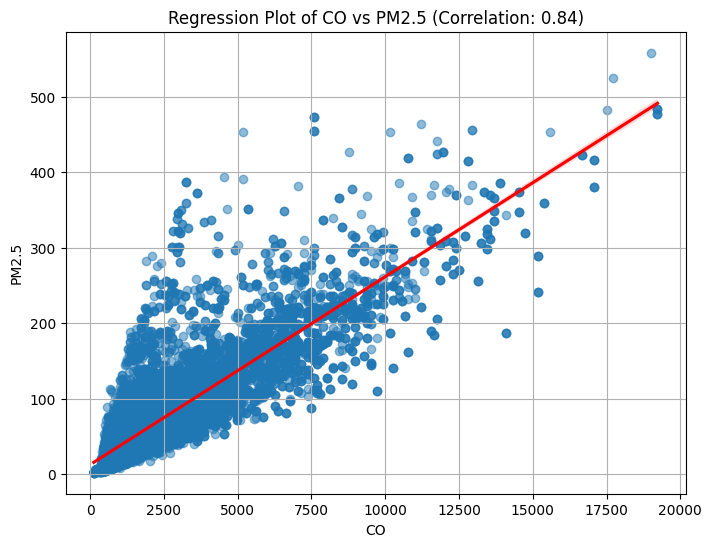

In [128]:
# Create the regression plot for co vs. pm2.5
plt.figure(figsize=(8, 6))
sns.regplot(x=df['co'], y=df['pm2_5'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("CO")
plt.ylabel("PM2.5")
plt.title(f"Regression Plot of CO vs PM2.5 (Correlation: {df['co'].corr(df['pm2_5']):.2f})")
plt.grid()
plt.show()

### **We need to use these analysis**
- Trend analysis
- Cyclicity analysis
- Seasonal analysis

In [129]:
# Selected features for heatmap correlation analysis
selected_cols = ['pm2_5', 'pm10', 'so2', 'no2', 'o3', 'co', 'sea_level','temp','humidity','hour','month','day_of_week', 'population_density', 'household_density','green_space_area','factory_num', 'factory_area', 'season_Hot Season', 'season_Rainy Season','season_Cool Season']

### **Heatmap with `pearson` method: Good for linear relationship**

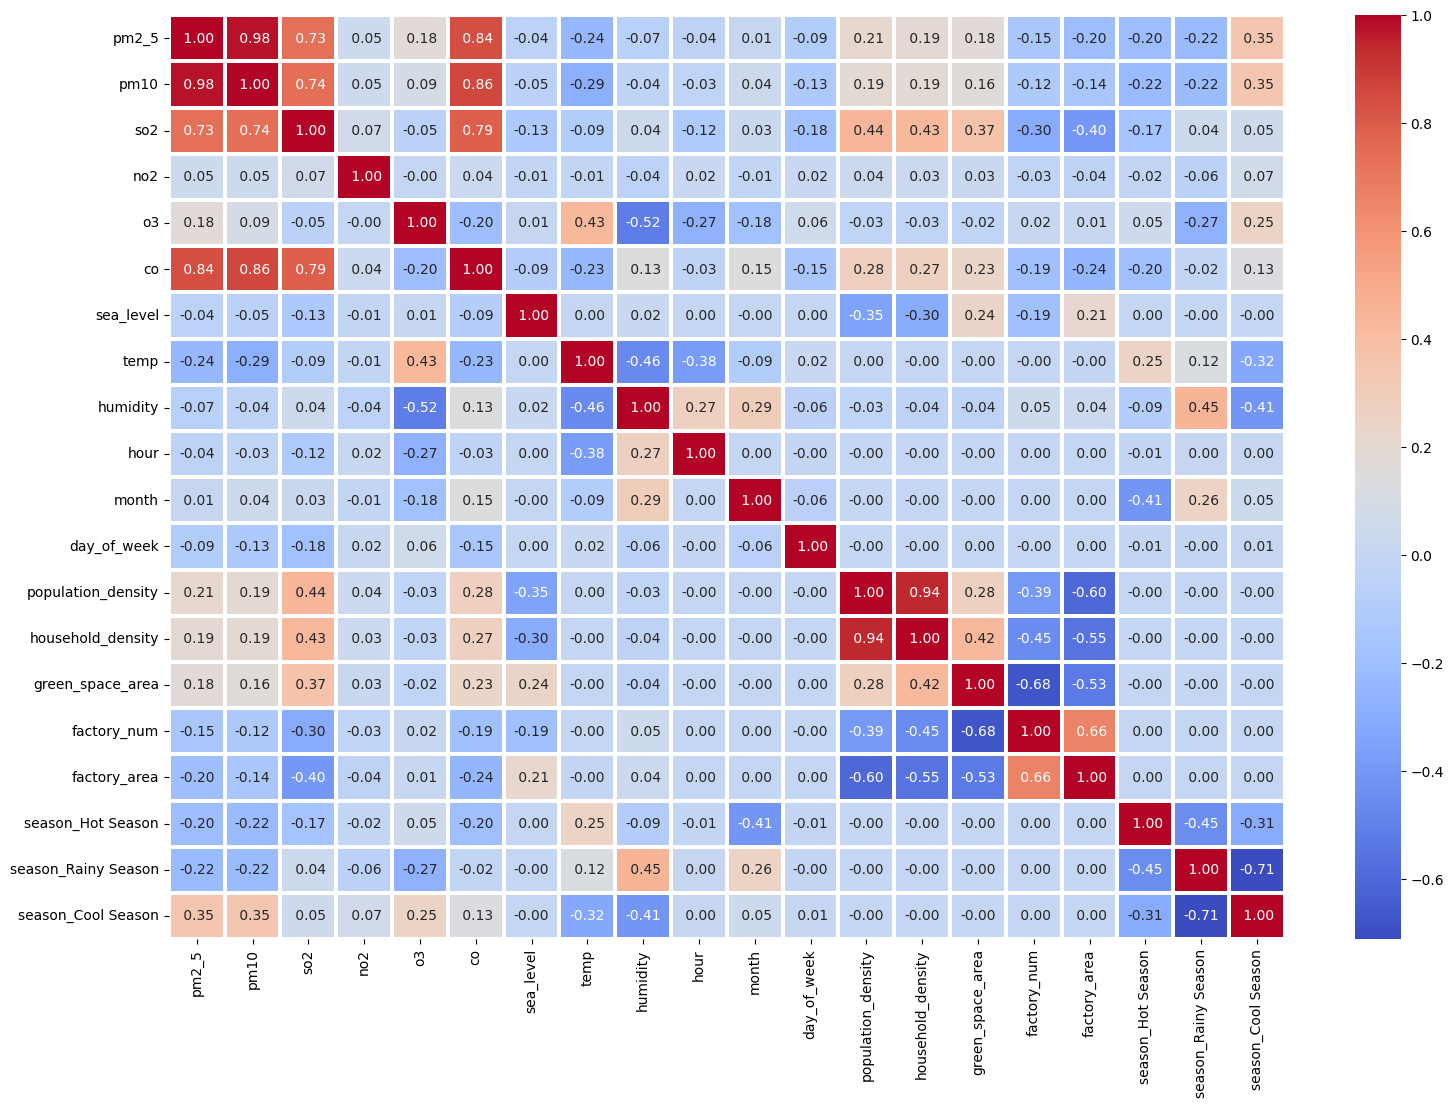

In [130]:
corr_matrix = df[selected_cols].corr(method='pearson')
corr_matrix

# Plotting the heatmap for numerical columns
plt.figure(figsize=(18,12))
sns.heatmap(data=corr_matrix, cmap='coolwarm', fmt=' .2f', annot=True, linewidths=1.5)
plt.show()

### **Heatmap with `spearman` method: Good for non-linear relationship**

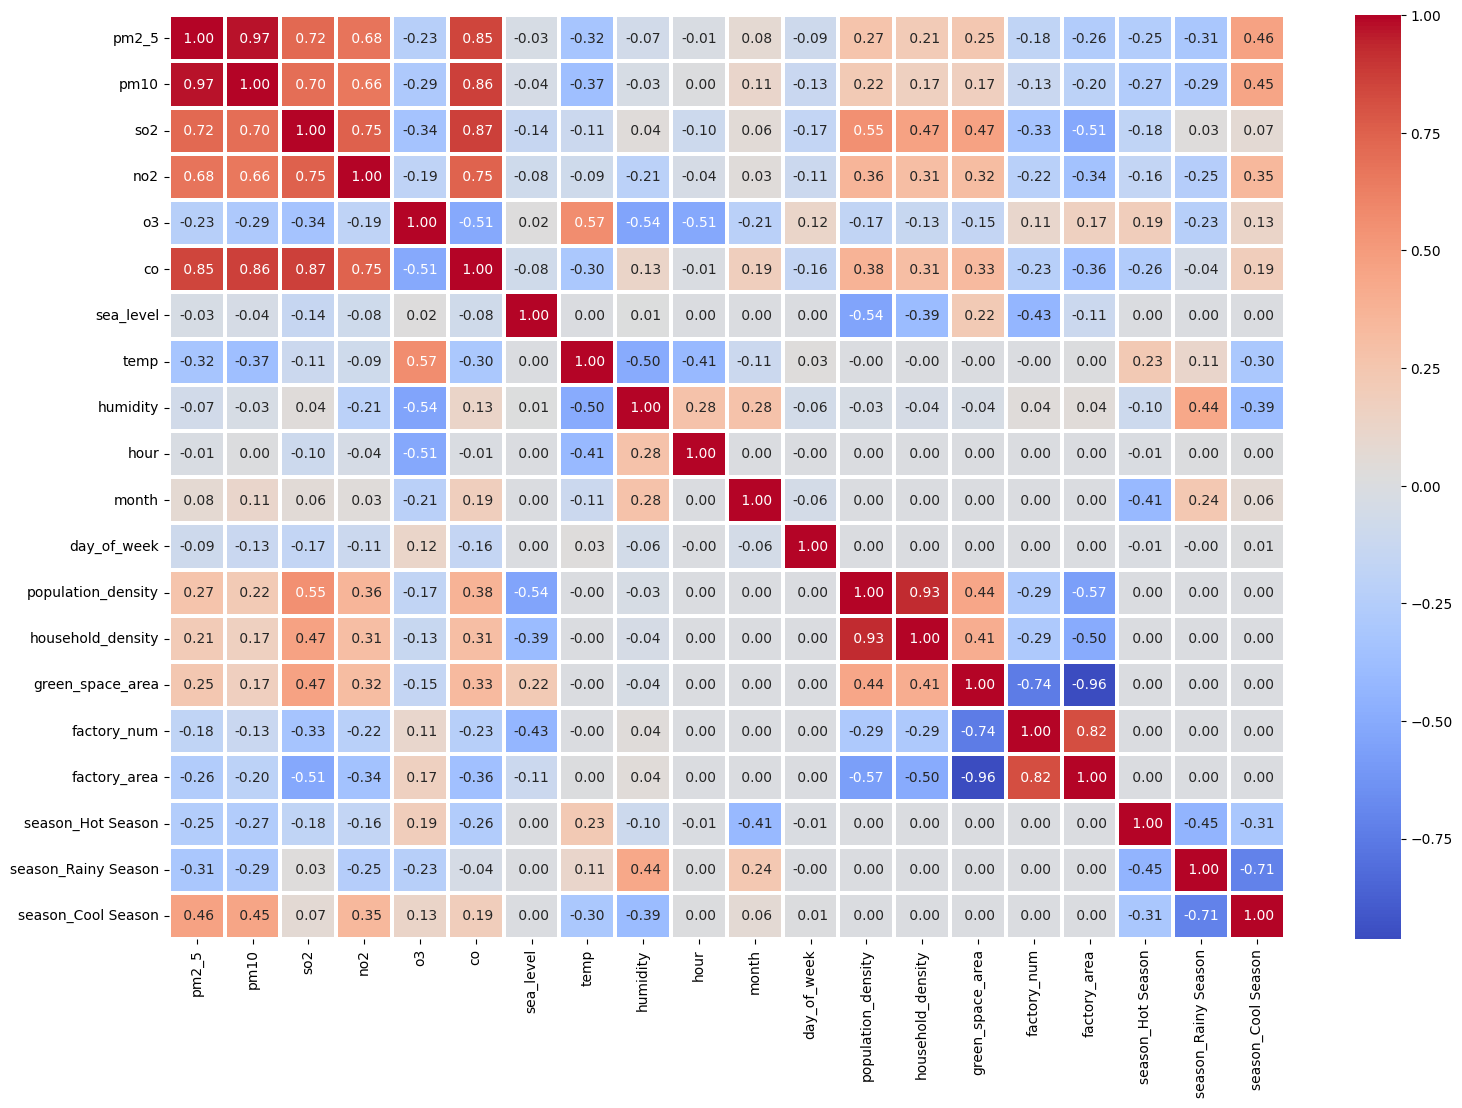

In [131]:
corr_matrix = df[selected_cols].corr(method='spearman')
corr_matrix

# Plotting the heatmap for numerical columns
plt.figure(figsize=(18,12))
sns.heatmap(data=corr_matrix, cmap='coolwarm', fmt=' .2f', annot=True, linewidths=1.5)
plt.show()

### **We use `spearman` method of correlation** 
- Because we are relying on rendom forest, XGBoost, Decision Tree!
- This is the non-parametric method!
- And we will compare performance for these 3 models (non-parametric method) to Linear models like Linear Regression, Ridge, Lasso Regression (Parametric method), and non-machine-learning method such as moving average to make sure that our assumption of non-parametric method is the best suited for PM2.5 prediction
- Additionally, spearman (non-linear relation) captures relationship better than pearson (Linear relation)

## **7. Feature selection**

### **Choose the most salient X**
- Rule of thumb: Good features MUST NOT BE correlated, i.e., independent
- Rule of thumb: Correlation is not causation; don’t pick features using correlation only; it should make sense!
- Rule of thumb: For ML, less features are usually better (but NOT necessarily for DL)

### **Specify the y**

### **Split train / test**

In [132]:
average_no2_per_month# 🔹 Ensure all expected stations exist (even if missing in df)
expected_stations = ['3T', '5T', '10T', '11T', '12T', '15T', '61T']  # include all known stations

# Perform one-hot encoding
station_dummies = pd.get_dummies(df["station"], prefix="station")

# Add missing station columns (if not present in df)
for col in expected_stations:
    dummy_col = f'station_{col}'
    if dummy_col not in station_dummies:
        station_dummies[dummy_col] = 0  # Fill missing station columns with 0

# Ensure all dummy columns are int type
station_dummies = station_dummies.astype(int)

# Concatenate the encoded station features back to the dataset
df = pd.concat([df, station_dummies], axis=1)

In [133]:
df

station    temp  pressure  humidity  windspeed  winddeg  cloudall  \
0          3T  305.44      1006        70       6.57      181        63   
1          3T  304.42      1006        68       6.04      179        68   
2          3T  304.42      1005        69       5.53      176       100   
3          3T  304.09      1004        69       5.03      174       100   
4          3T  304.52      1005        69       4.84      168       100   
...       ...     ...       ...       ...        ...      ...       ...   
14128     61T  303.12      1009        68       7.68      189       100   
14129     61T  303.12      1010        68       7.03      189       100   
14130     61T  303.12      1011        69       7.04      187       100   
14131     61T  303.12      1011        71       6.84      183        98   
14132     61T  302.12      1011        73       5.92      183        86   

      weathermain            datetime  day_of_week  ...  season_Cool Season  \
0          Clouds 2024-05-04 17:00:00            5  ...                   0   
1          Clouds 2024-05-04 18:00:00            5  ...                   0   
2          Clouds 2024-05-04 19:00:00            5  ...                   0   
3          Clouds 2024-05-04 20:00:00            5  ...                   0   
4          Clouds 2024-05-04 21:00:00            5  ...                   0   
...           ...                 ...          ...  ...                 ...   
14128      Clouds 2025-04-06 13:00:00            6  ...                   0   
14129      Clouds 2025-04-06 14:00:00            6  ...                   0   
14130      Clouds 2025-04-06 15:00:00            6  ...                   0   
14131      Clouds 2025-04-06 16:00:00            6  ...                   0   
14132      Clouds 2025-04-06 17:00:00            6  ...                   0   

       season_Hot Season  season_Rainy Season  station_10T  station_11T  \
0                      0                    1            0            0   
1                      0                    1            0            0   
2                      0                    1            0            0   
3                      0                    1            0            0   
4                      0                    1            0            0   
...                  ...                  ...          ...          ...   
14128                  1                    0            0            0   
14129                  1                    0            0            0   
14130                  1                    0            0            0   
14131                  1                    0            0            0   
14132                  1                    0            0            0   

       station_12T  station_15T  station_3T  station_5T  station_61T  
0                0            0           1           0            0  
1                0            0           1           0            0  
2                0            0           1           0            0  
3                0            0           1           0            0  
4                0            0           1           0            0  
...            ...          ...         ...         ...          ...  
14128            0            0           0           0            1  
14129            0            0           0           0            1  
14130            0            0           0           0            1  
14131            0            0           0           0            1  
14132            0            0           0           0            1  

[14133 rows x 41 columns]

In [134]:
df.columns

Index(['station', 'temp', 'pressure', 'humidity', 'windspeed', 'winddeg',
       'cloudall', 'weathermain', 'datetime', 'day_of_week', 'hour',
       'traffic_level', 'sea_level', 'population', 'population_density',
       'household', 'household_density', 'green_space', 'green_space_area',
       'factory_num', 'factory_area', 'lat', 'lon', 'pm2_5', 'pm10', 'so2',
       'no2', 'o3', 'co', 'month', 'season', 'season_Cool Season',
       'season_Hot Season', 'season_Rainy Season', 'station_10T',
       'station_11T', 'station_12T', 'station_15T', 'station_3T', 'station_5T',
       'station_61T'],
      dtype='object')

In [135]:
df['station'].unique()

array(['3T', '5T', '10T', '11T', '12T', '15T', '61T'], dtype=object)

In [136]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"⚠️ '{col}' has only one unique value in test set: {df[col].unique()[0]}")


In [137]:
features = df[['station', 'temp','population_density','factory_area','season_Cool Season','season_Hot Season','season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co']]
target = df['pm2_5']

### **Split X and y features (Time-Aware Style)**

In [138]:
df['population_density'].unique()

array([ 9046.87,  4788.74,  1452.45,  3437.36, 10275.79,  4324.14,
        4542.29])

In [139]:
df_sorted = df.sort_values(by=['datetime', 'station']).reset_index(drop=True)

In [140]:
int(len(features) * 0.9)

12719

In [141]:
target.isna().sum()

np.int64(1232)

In [142]:
df_sorted.isna().sum()

station                   0
temp                      0
pressure                  0
humidity                  0
windspeed                 0
winddeg                   0
cloudall                  0
weathermain               0
datetime                  0
day_of_week               0
hour                      0
traffic_level             0
sea_level                 0
population                0
population_density        0
household                 0
household_density         0
green_space               0
green_space_area          0
factory_num               0
factory_area              0
lat                    1232
lon                    1232
pm2_5                  1232
pm10                   1232
so2                    1232
no2                    1232
o3                     1232
co                     1232
month                     0
season                    0
season_Cool Season        0
season_Hot Season         0
season_Rainy Season       0
station_10T               0
station_11T         

In [143]:
df_sorted.dropna(inplace=True)

In [144]:
features = df_sorted[['station_10T', 'station_11T', 'station_12T', 'station_15T', 'station_3T', 'station_5T', 
                      'station_61T', 'temp','population_density','factory_area',
                      'season_Cool Season','season_Hot Season','season_Rainy Season',
                      'pm10', 'so2', 'no2', 'o3', 'co']]

target = df_sorted['pm2_5']

split_point = int(len(features) * 0.9)
X_train = features.iloc[:split_point]
X_test = features.iloc[split_point:]

y_train = target.iloc[:split_point]
y_test = target.iloc[split_point:]

In [145]:
for col in X_test.columns:
    if X_test[col].nunique() == 1:
        print(f"⚠️ '{col}' has only one unique value in test set: {X_test[col].unique()[0]}")

⚠️ 'season_Rainy Season' has only one unique value in test set: 0


In [146]:
print("Train unique pop_density:", X_train['population_density'].nunique())
print("Test unique pop_density:", X_test['population_density'].nunique())

Train unique pop_density: 7
Test unique pop_density: 7


In [147]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (11610, 18)
X_test shape: (1291, 18)


In [148]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (11610,)
y_test shape: (1291,)


In [149]:
X_train

station_10T  station_11T  station_12T  station_15T  station_3T  \
0                1            0            0            0           0   
1                0            1            0            0           0   
2                0            0            1            0           0   
3                0            0            0            1           0   
4                0            0            0            0           1   
...            ...          ...          ...          ...         ...   
11605            0            0            0            0           0   
11606            1            0            0            0           0   
11607            0            1            0            0           0   
11608            0            0            1            0           0   
11609            0            0            0            1           0   

       station_5T  station_61T    temp  population_density  factory_area  \
0               0            0  305.04             1452.45       4770457   
1               0            0  306.10             3437.36        144736   
2               0            0  305.70            10275.79        297638   
3               0            0  306.66             4324.14       1148799   
4               0            0  305.44             9046.87        123059   
...           ...          ...     ...                 ...           ...   
11605           0            1  301.12             4542.29        631723   
11606           0            0  300.12             1452.45       4770457   
11607           0            0  299.93             3437.36        144736   
11608           0            0  299.74            10275.79        297638   
11609           0            0  300.15             4324.14       1148799   

       season_Cool Season  season_Hot Season  season_Rainy Season    pm10  \
0                       0                  0                    1   48.05   
1                       0                  0                    1   49.19   
2                       0                  0                    1   67.32   
3                       0                  0                    1   49.19   
4                       0                  0                    1   67.32   
...                   ...                ...                  ...     ...   
11605                   1                  0                    0  170.51   
11606                   1                  0                    0  151.00   
11607                   1                  0                    0  310.17   
11608                   1                  0                    0  260.48   
11609                   1                  0                    0  310.17   

         so2     no2     o3       co  
0       5.96   12.51  41.13   467.30  
1      16.45   23.31  33.97   700.95  
2      29.56   40.44   1.06  1134.87  
3      16.45   23.31  33.97   700.95  
4      29.56   40.44   1.06  1134.87  
...      ...     ...    ...      ...  
11605  28.37  106.93   5.54  2643.59  
11606   9.30   50.04  16.63  1668.93  
11607  64.85  148.06   0.00  6195.07  
11608  96.32  131.61   0.00  4592.90  
11609  64.85  148.06   0.00  6195.07  

[11610 rows x 18 columns]

In [150]:
X_test

station_10T  station_11T  station_12T  station_15T  station_3T  \
11610            0            0            0            0           1   
11611            0            0            0            0           0   
11612            0            0            0            0           0   
11613            1            0            0            0           0   
11614            0            1            0            0           0   
...            ...          ...          ...          ...         ...   
14128            0            0            1            0           0   
14129            0            0            0            1           0   
14130            0            0            0            0           1   
14131            0            0            0            0           0   
14132            0            0            0            0           0   

       station_5T  station_61T    temp  population_density  factory_area  \
11610           0            0  300.20             9046.87        123059   
11611           1            0  300.20             4788.74         54185   
11612           0            1  300.88             4542.29        631723   
11613           0            0  299.25             1452.45       4770457   
11614           0            0  299.10             3437.36        144736   
...           ...          ...     ...                 ...           ...   
14128           0            0  302.13            10275.79        297638   
14129           0            0  302.07             4324.14       1148799   
14130           0            0  302.09             9046.87        123059   
14131           1            0  302.09             4788.74         54185   
14132           0            1  302.12             4542.29        631723   

       season_Cool Season  season_Hot Season  season_Rainy Season    pm10  \
11610                   1                  0                    0  260.48   
11611                   1                  0                    0  260.48   
11612                   1                  0                    0  142.15   
11613                   1                  0                    0  142.83   
11614                   1                  0                    0  329.52   
...                   ...                ...                  ...     ...   
14128                   0                  1                    0    8.23   
14129                   0                  1                    0    7.55   
14130                   0                  1                    0    8.23   
14131                   0                  1                    0    8.23   
14132                   0                  1                    0    7.83   

         so2     no2     o3       co  
11610  96.32  131.61   0.00  4592.90  
11611  96.32  131.61   0.00  4592.90  
11612  24.56   94.59   7.60  2296.45  
11613   7.39   45.93  20.74  1575.47  
11614  70.57  149.43   0.00  6408.69  
...      ...     ...    ...      ...  
14128   0.29    1.01  26.25   168.04  
14129   0.31    1.48  19.02   173.68  
14130   0.29    1.01  26.25   168.04  
14131   0.29    1.01  26.25   168.04  
14132   0.24    0.81  27.31   161.98  

[1291 rows x 18 columns]

In [151]:
y_train

0         20.68
1         31.13
2         38.68
3         31.13
4         38.68
          ...  
11605     99.46
11606     81.52
11607    214.77
11608    144.39
11609    214.77
Name: pm2_5, Length: 11610, dtype: float64

In [152]:
y_test

11610    144.39
11611    144.39
11612     87.53
11613     80.80
11614    228.16
          ...  
14128      3.96
14129      4.18
14130      3.96
14131      3.96
14132      3.81
Name: pm2_5, Length: 1291, dtype: float64

In [153]:
X_train

station_10T  station_11T  station_12T  station_15T  station_3T  \
0                1            0            0            0           0   
1                0            1            0            0           0   
2                0            0            1            0           0   
3                0            0            0            1           0   
4                0            0            0            0           1   
...            ...          ...          ...          ...         ...   
11605            0            0            0            0           0   
11606            1            0            0            0           0   
11607            0            1            0            0           0   
11608            0            0            1            0           0   
11609            0            0            0            1           0   

       station_5T  station_61T    temp  population_density  factory_area  \
0               0            0  305.04             1452.45       4770457   
1               0            0  306.10             3437.36        144736   
2               0            0  305.70            10275.79        297638   
3               0            0  306.66             4324.14       1148799   
4               0            0  305.44             9046.87        123059   
...           ...          ...     ...                 ...           ...   
11605           0            1  301.12             4542.29        631723   
11606           0            0  300.12             1452.45       4770457   
11607           0            0  299.93             3437.36        144736   
11608           0            0  299.74            10275.79        297638   
11609           0            0  300.15             4324.14       1148799   

       season_Cool Season  season_Hot Season  season_Rainy Season    pm10  \
0                       0                  0                    1   48.05   
1                       0                  0                    1   49.19   
2                       0                  0                    1   67.32   
3                       0                  0                    1   49.19   
4                       0                  0                    1   67.32   
...                   ...                ...                  ...     ...   
11605                   1                  0                    0  170.51   
11606                   1                  0                    0  151.00   
11607                   1                  0                    0  310.17   
11608                   1                  0                    0  260.48   
11609                   1                  0                    0  310.17   

         so2     no2     o3       co  
0       5.96   12.51  41.13   467.30  
1      16.45   23.31  33.97   700.95  
2      29.56   40.44   1.06  1134.87  
3      16.45   23.31  33.97   700.95  
4      29.56   40.44   1.06  1134.87  
...      ...     ...    ...      ...  
11605  28.37  106.93   5.54  2643.59  
11606   9.30   50.04  16.63  1668.93  
11607  64.85  148.06   0.00  6195.07  
11608  96.32  131.61   0.00  4592.90  
11609  64.85  148.06   0.00  6195.07  

[11610 rows x 18 columns]

In [154]:
X_train.isna().sum()

station_10T            0
station_11T            0
station_12T            0
station_15T            0
station_3T             0
station_5T             0
station_61T            0
temp                   0
population_density     0
factory_area           0
season_Cool Season     0
season_Hot Season      0
season_Rainy Season    0
pm10                   0
so2                    0
no2                    0
o3                     0
co                     0
dtype: int64

In [155]:
X_test.isna().sum()

station_10T            0
station_11T            0
station_12T            0
station_15T            0
station_3T             0
station_5T             0
station_61T            0
temp                   0
population_density     0
factory_area           0
season_Cool Season     0
season_Hot Season      0
season_Rainy Season    0
pm10                   0
so2                    0
no2                    0
o3                     0
co                     0
dtype: int64

In [156]:
y_train.shape

(11610,)

In [157]:
y_train.isna().sum()

np.int64(0)

In [158]:
y_test.shape

(1291,)

In [159]:
y_test.isna().sum()

np.int64(0)

### **Handling Missing Values After Spliting**

In [160]:
# Drop missing values in y_train and y_test
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

In [161]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

In [162]:
y_train

0         20.68
1         31.13
2         38.68
3         31.13
4         38.68
          ...  
11605     99.46
11606     81.52
11607    214.77
11608    144.39
11609    214.77
Name: pm2_5, Length: 11610, dtype: float64

### **Check Distribution and skew value**

In [163]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

In [164]:
X_test.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

#### **Check distribution**

#### `temp`

- X_train

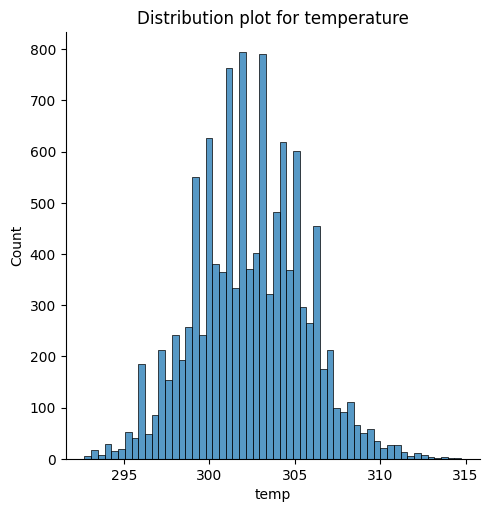

The distribution of temperature feature seems to be normaly distributed


In [165]:
sns.displot(X_train, x='temp')

plt.title('Distribution plot for temperature')

plt.show()
print('The distribution of temperature feature seems to be normaly distributed')

In [166]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['temp'])
print('-'*30)
print(f"SKewness of temperature: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is very close to the center')
print('This suggest taht the distribution is nearly normaly distributed')

------------------------------
SKewness of temperature: 0.0419
------------------------------
The skewness is being around 0.0419 which is very close to the center
This suggest taht the distribution is nearly normaly distributed


- X_test

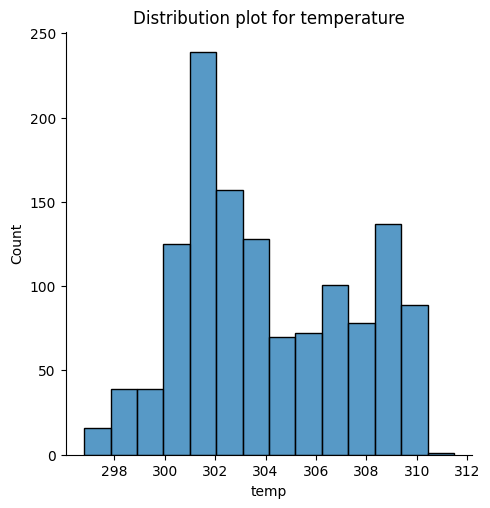

The distribution of temperature feature seems to be normaly distributed


In [167]:
sns.displot(X_test, x='temp')

plt.title('Distribution plot for temperature')

plt.show()
print('The distribution of temperature feature seems to be normaly distributed')

In [168]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['temp'])
print('-'*30)
print(f"SKewness of temperature: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is very close to the center')
print('This suggest taht the distribution is nearly normaly distributed')

------------------------------
SKewness of temperature: 0.2394
------------------------------
The skewness is being around 0.2394 which is very close to the center
This suggest taht the distribution is nearly normaly distributed


#### `poppulation_density`

- X_train

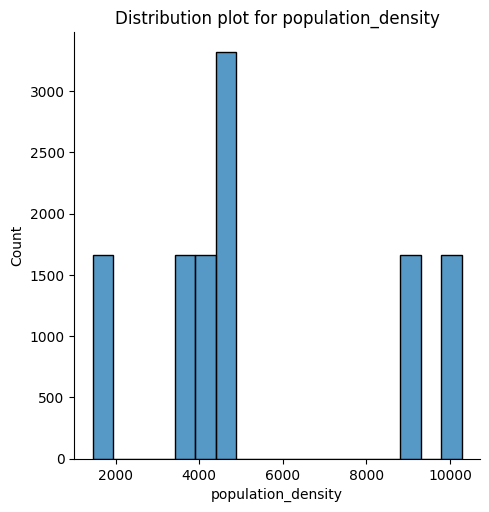

The distribution of population_density feature seems to be normaly distributed


In [169]:
sns.displot(X_train, x='population_density')

plt.title('Distribution plot for population_density')

plt.show()
print('The distribution of population_density feature seems to be normaly distributed')

In [170]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['population_density'])
print('-'*30)
print(f"SKewness of population_density: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest taht the distribution is right-skewed')

------------------------------
SKewness of population_density: 0.5375
------------------------------
The skewness is being around 0.5375 which is skewed to the right side
This suggest taht the distribution is right-skewed


- X_test

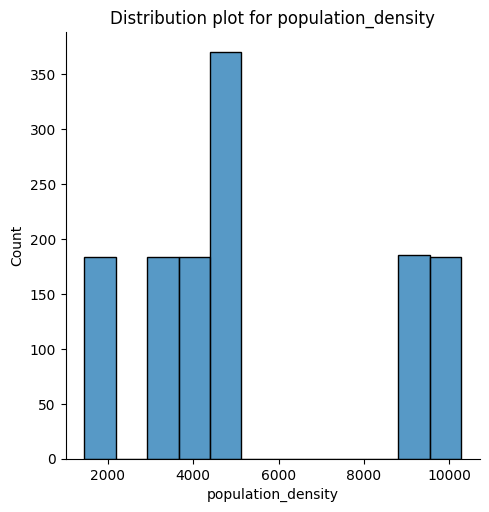

The distribution of population_density feature seems to be normaly distributed


In [171]:
sns.displot(X_test, x='population_density')

plt.title('Distribution plot for population_density')

plt.show()
print('The distribution of population_density feature seems to be normaly distributed')

In [172]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['population_density'])
print('-'*30)
print(f"SKewness of population_density: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest taht the distribution is right-skewed')

------------------------------
SKewness of population_density: 0.5368
------------------------------
The skewness is being around 0.5368 which is skewed to the right side
This suggest taht the distribution is right-skewed


In [173]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

In [174]:
print("Unique population_density values in X_train:", sorted(X_train['population_density'].unique()))
print("Value counts:")
print(X_train['population_density'].value_counts())

Unique population_density values in X_train: [np.float64(1452.45), np.float64(3437.36), np.float64(4324.14), np.float64(4542.29), np.float64(4788.74), np.float64(9046.87), np.float64(10275.79)]
Value counts:
population_density
1452.45     1659
3437.36     1659
10275.79    1659
4324.14     1659
9046.87     1658
4788.74     1658
4542.29     1658
Name: count, dtype: int64


#### `factory_area`

- X_train

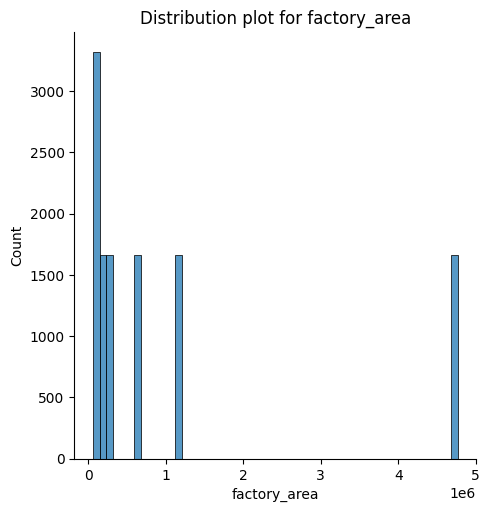

The distribution of factory_area feature seems to be right-skewd distributed


In [175]:
sns.displot(X_train, x='factory_area')

plt.title('Distribution plot for factory_area')

plt.show()
print('The distribution of factory_area feature seems to be right-skewd distributed')

In [176]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['factory_area'])
print('-'*30)
print(f"SKewness of factory_area: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest taht the distribution is right-skewed')

------------------------------
SKewness of factory_area: 1.8374
------------------------------
The skewness is being around 1.8374 which is skewed to the right side
This suggest taht the distribution is right-skewed


- X_test

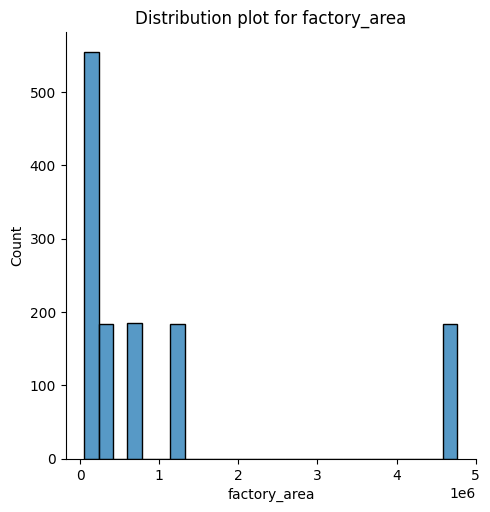

The distribution of factory_area feature seems to be right-skewd distributed


In [177]:
sns.displot(X_test, x='factory_area')

plt.title('Distribution plot for factory_area')

plt.show()
print('The distribution of factory_area feature seems to be right-skewd distributed')

In [178]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['factory_area'])
print('-'*30)
print(f"SKewness of factory_area: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest taht the distribution is right-skewed')

------------------------------
SKewness of factory_area: 1.8413
------------------------------
The skewness is being around 1.8413 which is skewed to the right side
This suggest taht the distribution is right-skewed


In [179]:
print("Unique factory_area values in X_train:", sorted(X_train['factory_area'].unique()))
print("Value counts:")
print(X_train['factory_area'].value_counts())

Unique factory_area values in X_train: [np.int64(54185), np.int64(123059), np.int64(144736), np.int64(297638), np.int64(631723), np.int64(1148799), np.int64(4770457)]
Value counts:
factory_area
4770457    1659
144736     1659
297638     1659
1148799    1659
123059     1658
54185      1658
631723     1658
Name: count, dtype: int64


#### `season_Cool Season`

- X-train

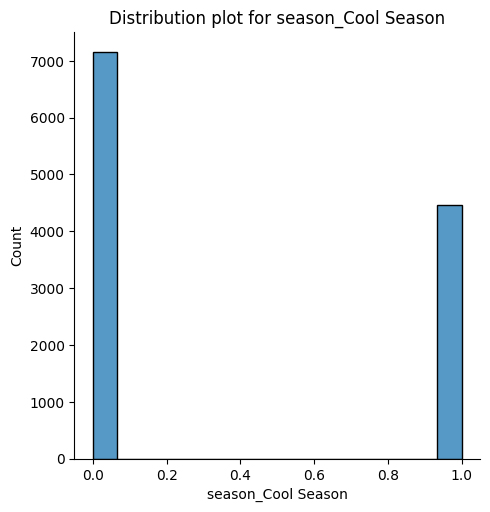

The distribution of season_Cool Season feature seems to be right-skewd distributed


In [180]:
sns.displot(X_train, x='season_Cool Season')

plt.title('Distribution plot for season_Cool Season')

plt.show()
print('The distribution of season_Cool Season feature seems to be right-skewd distributed')

In [181]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['season_Cool Season'])
print('-'*30)
print(f"SKewness of season_Cool Season: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest taht the distribution is right-skewed')

------------------------------
SKewness of season_Cool Season: 0.4752
------------------------------
The skewness is being around 0.4752 which is skewed to the right side
This suggest taht the distribution is right-skewed


- X_test

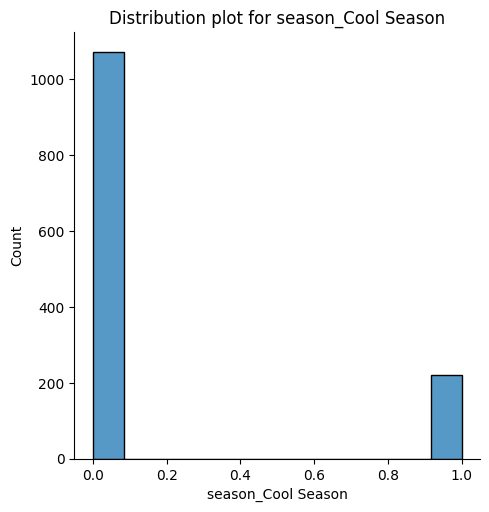

The distribution of season_Cool Season feature seems to be right-skewd distributed


In [182]:
sns.displot(X_test, x='season_Cool Season')

plt.title('Distribution plot for season_Cool Season')

plt.show()
print('The distribution of season_Cool Season feature seems to be right-skewd distributed')

In [183]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['season_Cool Season'])
print('-'*30)
print(f"SKewness of season_Cool Season: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest taht the distribution is right-skewed')

------------------------------
SKewness of season_Cool Season: 1.7532
------------------------------
The skewness is being around 1.7532 which is skewed to the right side
This suggest taht the distribution is right-skewed


In [184]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

#### `season_Hot Season`

- X_train

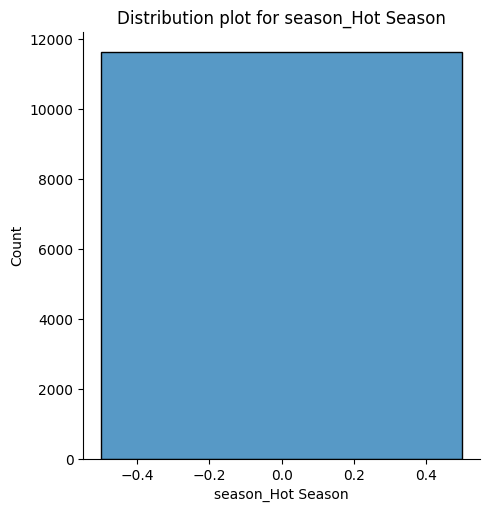

The distribution of season_Hot Season feature seems to be right-skewd distributed


In [185]:
sns.displot(X_train, x='season_Hot Season')

plt.title('Distribution plot for season_Hot Season')

plt.show()
print('The distribution of season_Hot Season feature seems to be right-skewd distributed')

In [186]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['season_Hot Season'])
print('-'*30)
print(f"SKewness of season_Hot Season: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest taht the distribution is heavily right-skewed')

------------------------------
SKewness of season_Hot Season: nan
------------------------------
The skewness is being around nan which is heavily skewed to the right side
This suggest taht the distribution is heavily right-skewed


- X_test

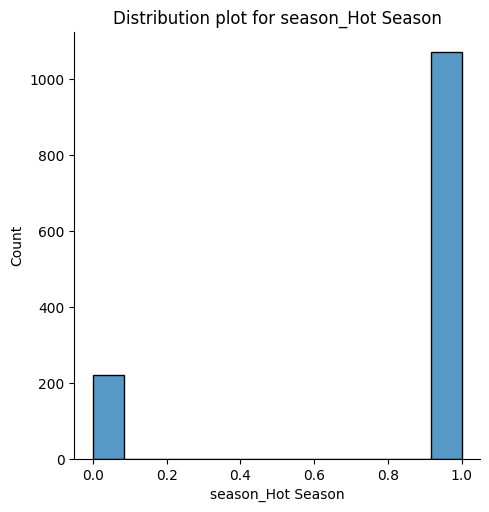

The distribution of season_Hot Season feature seems to be right-skewd distributed


In [187]:
sns.displot(X_test, x='season_Hot Season')

plt.title('Distribution plot for season_Hot Season')

plt.show()
print('The distribution of season_Hot Season feature seems to be right-skewd distributed')

In [188]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['season_Hot Season'])
print('-'*30)
print(f"SKewness of season_Hot Season: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest taht the distribution is heavily right-skewed')

------------------------------
SKewness of season_Hot Season: -1.7532
------------------------------
The skewness is being around -1.7532 which is heavily skewed to the right side
This suggest taht the distribution is heavily right-skewed


#### `season_Rainy Season`

- X_train

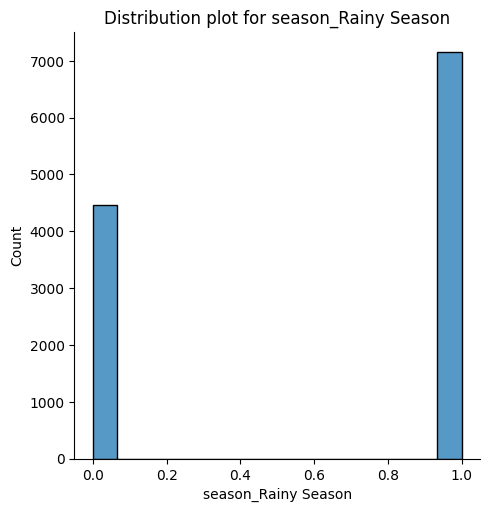

The distribution of season_Rainy Season feature seems to be normaly distributed


In [189]:
sns.displot(X_train, x='season_Rainy Season')

plt.title('Distribution plot for season_Rainy Season')

plt.show()
print('The distribution of season_Rainy Season feature seems to be normaly distributed')

In [190]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['season_Rainy Season'])
print('-'*30)
print(f"SKewness of season_Rainy Season: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is close to the center')
print('This suggest that the distribution is normaly distributed')

------------------------------
SKewness of season_Rainy Season: -0.4752
------------------------------
The skewness is being around -0.4752 which is close to the center
This suggest that the distribution is normaly distributed


- X_test

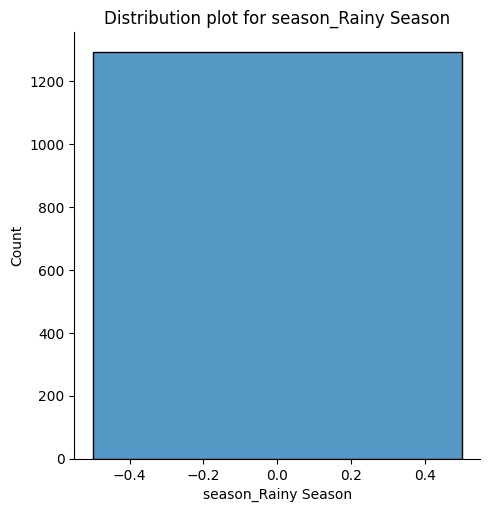

The distribution of season_Rainy Season feature seems to be normaly distributed


In [191]:
sns.displot(X_test, x='season_Rainy Season')

plt.title('Distribution plot for season_Rainy Season')

plt.show()
print('The distribution of season_Rainy Season feature seems to be normaly distributed')

In [192]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['season_Rainy Season'])
print('-'*30)
print(f"SKewness of season_Rainy Season: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is close to the center')
print('This suggest that the distribution is normaly distributed')

------------------------------
SKewness of season_Rainy Season: nan
------------------------------
The skewness is being around nan which is close to the center
This suggest that the distribution is normaly distributed


In [193]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

#### `pm10`

- X_train

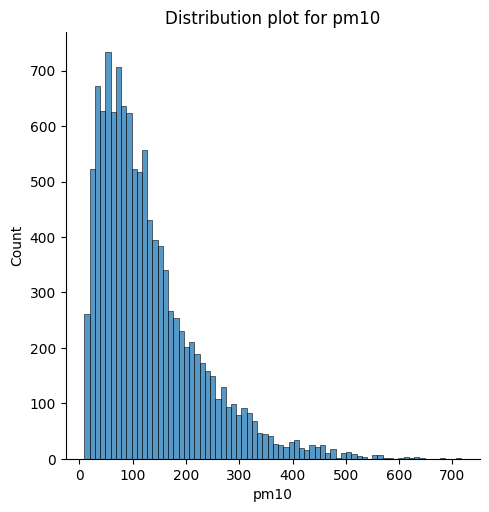

The distribution of pm10 feature seems to be heavily right-skewd distribution


In [194]:
sns.displot(X_train, x='pm10')

plt.title('Distribution plot for pm10')

plt.show()
print('The distribution of pm10 feature seems to be heavily right-skewd distribution')

In [195]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['pm10'])
print('-'*30)
print(f"SKewness of pm10: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of pm10: 1.4901
------------------------------
The skewness is being around 1.4901 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


- X_test

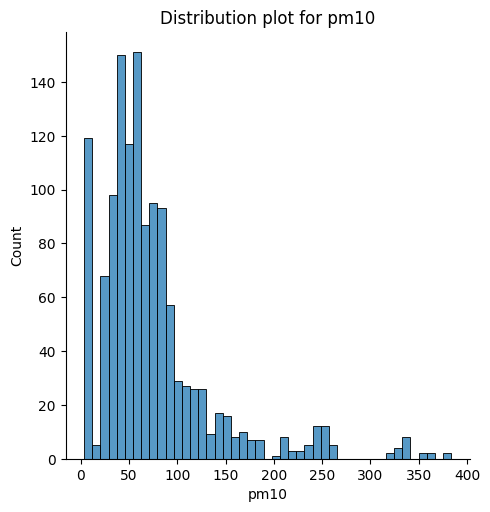

The distribution of pm10 feature seems to be heavily right-skewd distribution


In [196]:
sns.displot(X_test, x='pm10')

plt.title('Distribution plot for pm10')

plt.show()
print('The distribution of pm10 feature seems to be heavily right-skewd distribution')

In [197]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['pm10'])
print('-'*30)
print(f"SKewness of pm10: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of pm10: 2.2215
------------------------------
The skewness is being around 2.2215 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


In [198]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

#### `so2`

- X_train

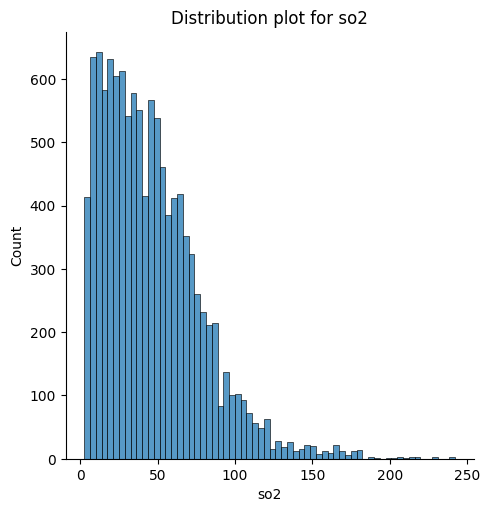

The distribution of so2 feature seems to be right-skewd distribution


In [199]:
sns.displot(X_train, x='so2')

plt.title('Distribution plot for so2')

plt.show()
print('The distribution of so2 feature seems to be right-skewd distribution')

In [200]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['so2'])
print('-'*30)
print(f"SKewness of so2: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest that the distribution is right-skewed')

------------------------------
SKewness of so2: 1.2583
------------------------------
The skewness is being around 1.2583 which is skewed to the right side
This suggest that the distribution is right-skewed


- X_test

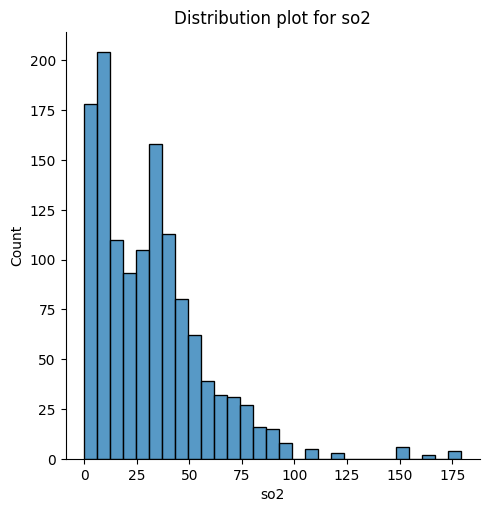

The distribution of so2 feature seems to be right-skewd distribution


In [201]:
sns.displot(X_test, x='so2')

plt.title('Distribution plot for so2')

plt.show()
print('The distribution of so2 feature seems to be right-skewd distribution')

In [202]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['so2'])
print('-'*30)
print(f"SKewness of so2: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is skewed to the right side')
print('This suggest that the distribution is right-skewed')

------------------------------
SKewness of so2: 1.5841
------------------------------
The skewness is being around 1.5841 which is skewed to the right side
This suggest that the distribution is right-skewed


#### `o3`

- X_train

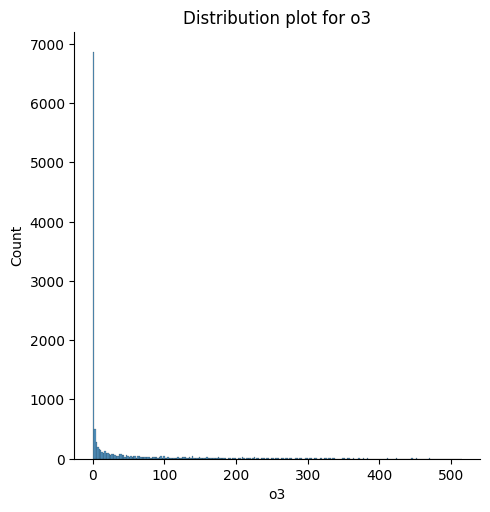

The distribution of o3 feature seems to be heavily right-skewd distribution


In [203]:
sns.displot(X_train, x='o3')

plt.title('Distribution plot for o3')

plt.show()
print('The distribution of o3 feature seems to be heavily right-skewd distribution')

In [204]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['o3'])
print('-'*30)
print(f"SKewness of o3: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of o3: 3.0859
------------------------------
The skewness is being around 3.0859 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


- X_test

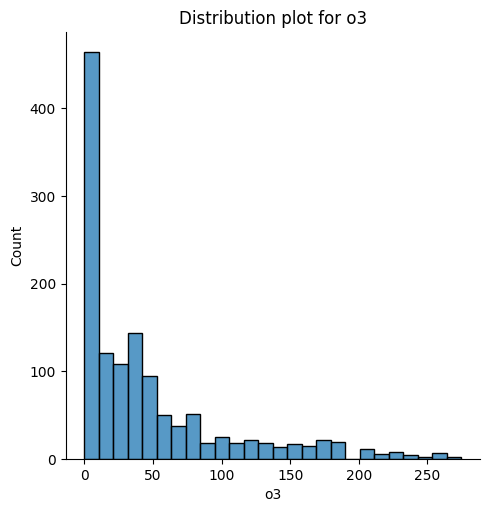

The distribution of o3 feature seems to be heavily right-skewd distribution


In [205]:
sns.displot(X_test, x='o3')

plt.title('Distribution plot for o3')

plt.show()
print('The distribution of o3 feature seems to be heavily right-skewd distribution')

In [206]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['o3'])
print('-'*30)
print(f"SKewness of o3: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of o3: 1.6909
------------------------------
The skewness is being around 1.6909 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


#### `co`

- X_train

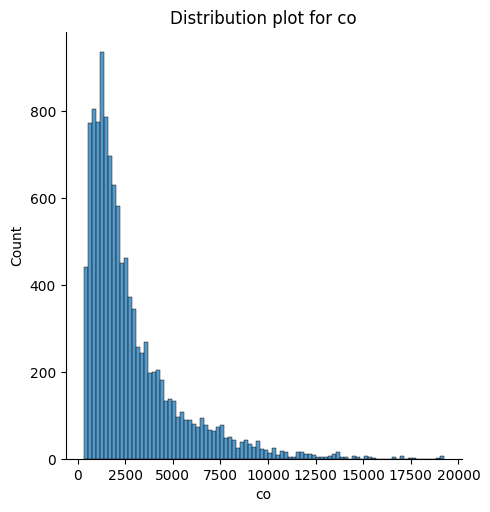

The distribution of co feature seems to be heavily right-skewd distribution


In [207]:
sns.displot(X_train, x='co')

plt.title('Distribution plot for co')

plt.show()
print('The distribution of co feature seems to be heavily right-skewd distribution')

In [208]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['co'])
print('-'*30)
print(f"SKewness of co: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of co: 2.0521
------------------------------
The skewness is being around 2.0521 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


- X_test

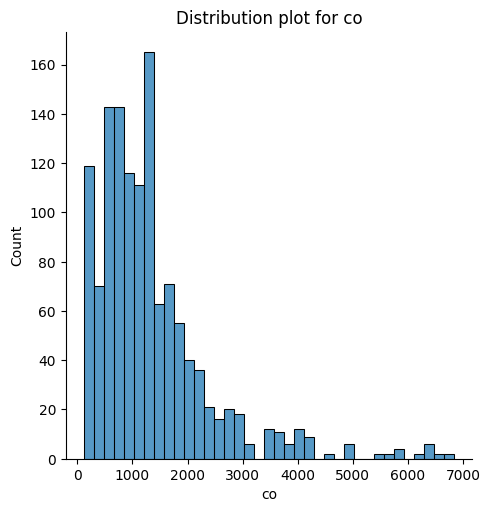

The distribution of co feature seems to be heavily right-skewd distribution


In [209]:
sns.displot(X_test, x='co')

plt.title('Distribution plot for co')

plt.show()
print('The distribution of co feature seems to be heavily right-skewd distribution')

In [210]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['co'])
print('-'*30)
print(f"SKewness of co: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of co: 2.0962
------------------------------
The skewness is being around 2.0962 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


#### **The distribution summary for the processed trainning dataset**

- `'fuel_eff'` has the normal distribution: Skewness of fuel_eff: 0.0015

- `'year'` has the left-skewed distribution: Skewness of year: -0.82

- `'max_power'` has the `right-skewed` distribution: Skewness of max_power: `0.84`

- `'km_driven'` has the `right-skewed` distribution: Skewness of km_driven: `0.75`

### **Handling Outliners**

- We found out that some of the features are unbalanced distributed

- Thus, this can be caused by having the outliner and is also leaving unsolved

- To improve the model performance in prediction, the outliners that can alter the predicting values must be handled

- **Rule of trump**: The catrgorical features must be excluded from scaling

### **Check propamatic feature with abnormal distribution**

#### `no2` in X_train **Need to be fixed**

- X_train

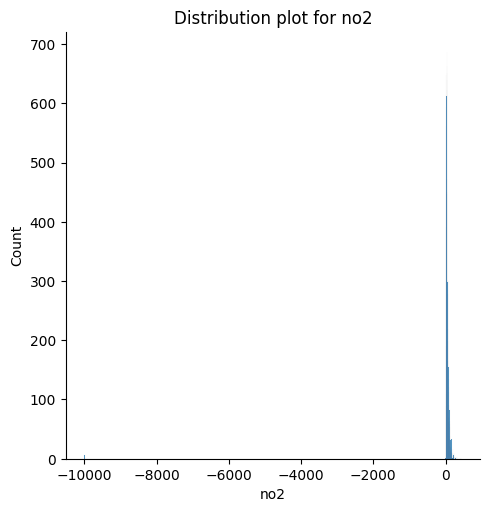

The distribution of no2 feature seems to be right-skewd distribution


In [211]:
sns.displot(X_train, x='no2')

plt.title('Distribution plot for no2')

plt.show()
print('The distribution of no2 feature seems to be right-skewd distribution')

In [212]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train['no2'])
print('-'*30)
print(f"SKewness of no2: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is abnormal as the further investigation is needed')
print('This suggest that the distribution is abnormal as the further investigation is neede')

------------------------------
SKewness of no2: -39.3749
------------------------------
The skewness is being around -39.3749 which is abnormal as the further investigation is needed
This suggest that the distribution is abnormal as the further investigation is neede


- X_test

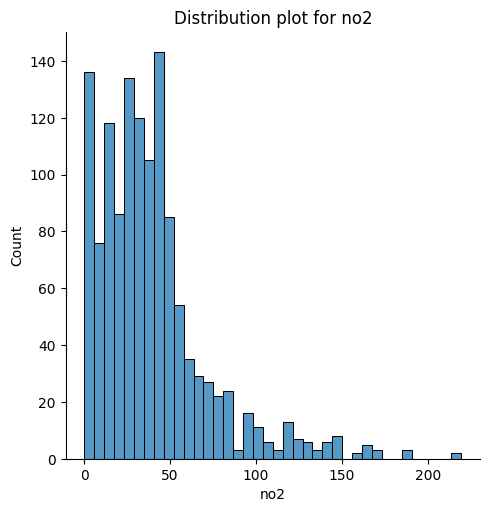

The distribution of no2 feature seems to be right-skewd distribution


In [213]:
sns.displot(X_test, x='no2')

plt.title('Distribution plot for no2')

plt.show()
print('The distribution of no2 feature seems to be right-skewd distribution')

In [214]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_test['no2'])
print('-'*30)
print(f"SKewness of no2: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of no2: 1.7355
------------------------------
The skewness is being around 1.7355 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


In [215]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

### **`pm2_5` in y_train needed to be fixed**

- y_train

In [216]:
y_train

0         20.68
1         31.13
2         38.68
3         31.13
4         38.68
          ...  
11605     99.46
11606     81.52
11607    214.77
11608    144.39
11609    214.77
Name: pm2_5, Length: 11610, dtype: float64

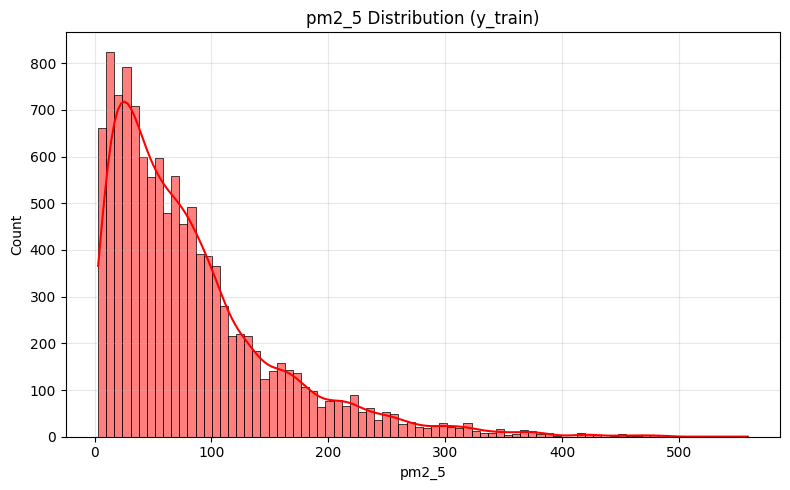

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, color="red")
plt.title("pm2_5 Distribution (y_train)")
plt.xlabel("pm2_5")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [218]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(y_train)
print('-'*30)
print(f"SKewness of pm2_5: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is abnormal as the further investigation is needed')
print('This suggest that the distribution is abnormal as the further investigation is neede')

------------------------------
SKewness of pm2_5: 1.7241
------------------------------
The skewness is being around 1.7241 which is abnormal as the further investigation is needed
This suggest that the distribution is abnormal as the further investigation is neede


- y_test

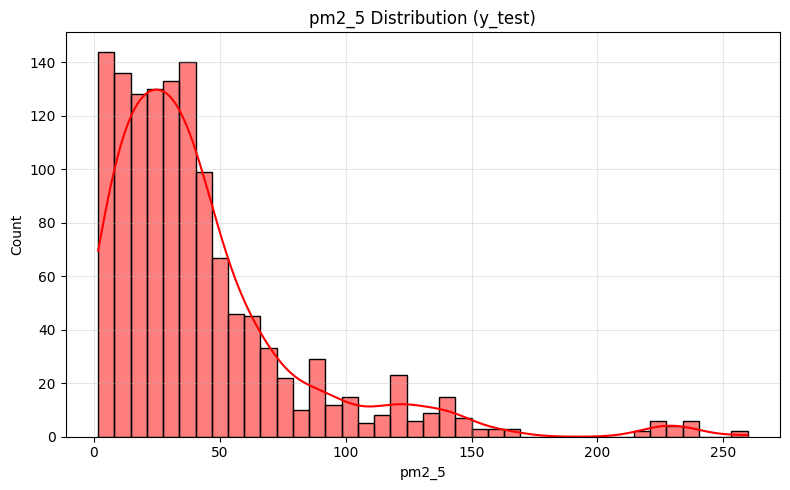

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True, color="red")
plt.title("pm2_5 Distribution (y_test)")
plt.xlabel("pm2_5")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [220]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(y_test)
print('-'*30)
print(f"SKewness of no2: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is abnormal as the further investigation is needed')
print('This suggest that the distribution is abnormal as the further investigation is neede')

------------------------------
SKewness of no2: 2.2416
------------------------------
The skewness is being around 2.2416 which is abnormal as the further investigation is needed
This suggest that the distribution is abnormal as the further investigation is neede


In [221]:
upper_bound = y_train.quantile(0.94)
# lower_bound = y_train.quantile(0.05)

# y_train = y_train.copy()
y_train[y_train > upper_bound] = upper_bound
# y_train[y_train < lower_bound] = lower_bound


In [222]:
print("Old Max:", y_train.max())

# Replace any pm2_5 values above threshold with the median
threshold = 150
y_train[y_train > threshold] = y_train.median()

print("Number of outliers replaced:",
      (y_train > threshold).sum())
print("Old Max:", y_train.max(), "| New Max:", y_train.max())

Old Max: 218.6
Number of outliers replaced: 0
Old Max: 149.99 | New Max: 149.99


In [223]:
print("Old Max:", y_test.max())

# Replace any pm2_5 values above threshold with the median
threshold = 150
y_test[y_test > threshold] = y_test.median()

print("Number of outliers replaced:",
      (y_test > threshold).sum())
print("New Max:", y_test.max())

Old Max: 259.56
Number of outliers replaced: 0
New Max: 144.71


#### **After capping outliners, check distribution and skewness again**

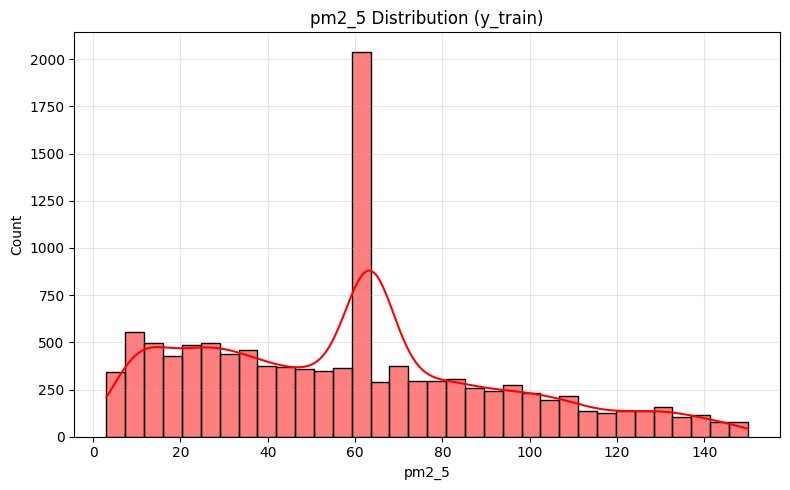

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, color="red")
plt.title("pm2_5 Distribution (y_train)")
plt.xlabel("pm2_5")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

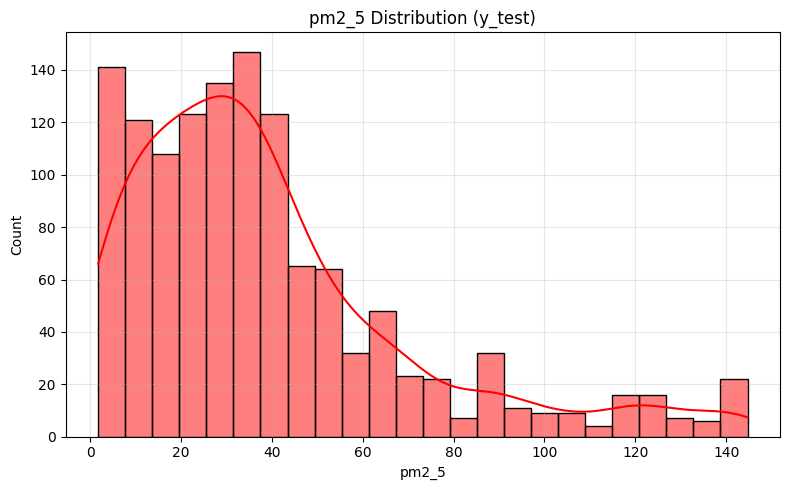

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True, color="red")
plt.title("pm2_5 Distribution (y_test)")
plt.xlabel("pm2_5")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Possible causes of extreme abnormal distribution of `no2`**

1. Distribution plot shows extreme negative skewness

- The strange distribution reaching down to -10,000 and beyond is not normal at all.

- NO₂ (Nitrogen Dioxide) levels can't realistically be negative in such extreme ways — it's likely:
    - Corrupted values
    - Measurement/recording errors
    - Or possibly placeholder values for missing data (e.g., -9999)

2. Skewness of -54.6277:

- This is extremely negative skew, which strongly contradicts our plot description ("right-skewed").

- This kind of value clearly shows abnormal, broken, or erroneous entries.

-> **Issue found: `X_train['no2']` column contains severe outliers or corrupted data, probably negative values that shouldn’t be there.**

### **Solution:**

- Check for negative values and count occuerances

- Investigate or clean them

In [226]:
# Check for negative values
print(X_train['no2'].describe())
print('-'*40)
print(f"Min value: {X_train['no2'].min()}")
print('-'*40)
print(f"Negative values count: {(X_train['no2'] < 0).sum()}")

count    11610.000000
mean        44.619483
std        249.396851
min      -9999.000000
25%         27.080000
50%         41.130000
75%         63.750000
max        433.210000
Name: no2, dtype: float64
----------------------------------------
Min value: -9999.0
----------------------------------------
Negative values count: 7


In [227]:
# Remove rows with negative NO2
X_train_cleaned = X_train[X_train['no2'] >= 0]

In [228]:
X_train_cleaned

station_10T  station_11T  station_12T  station_15T  station_3T  \
0                1            0            0            0           0   
1                0            1            0            0           0   
2                0            0            1            0           0   
3                0            0            0            1           0   
4                0            0            0            0           1   
...            ...          ...          ...          ...         ...   
11605            0            0            0            0           0   
11606            1            0            0            0           0   
11607            0            1            0            0           0   
11608            0            0            1            0           0   
11609            0            0            0            1           0   

       station_5T  station_61T    temp  population_density  factory_area  \
0               0            0  305.04             1452.45       4770457   
1               0            0  306.10             3437.36        144736   
2               0            0  305.70            10275.79        297638   
3               0            0  306.66             4324.14       1148799   
4               0            0  305.44             9046.87        123059   
...           ...          ...     ...                 ...           ...   
11605           0            1  301.12             4542.29        631723   
11606           0            0  300.12             1452.45       4770457   
11607           0            0  299.93             3437.36        144736   
11608           0            0  299.74            10275.79        297638   
11609           0            0  300.15             4324.14       1148799   

       season_Cool Season  season_Hot Season  season_Rainy Season    pm10  \
0                       0                  0                    1   48.05   
1                       0                  0                    1   49.19   
2                       0                  0                    1   67.32   
3                       0                  0                    1   49.19   
4                       0                  0                    1   67.32   
...                   ...                ...                  ...     ...   
11605                   1                  0                    0  170.51   
11606                   1                  0                    0  151.00   
11607                   1                  0                    0  310.17   
11608                   1                  0                    0  260.48   
11609                   1                  0                    0  310.17   

         so2     no2     o3       co  
0       5.96   12.51  41.13   467.30  
1      16.45   23.31  33.97   700.95  
2      29.56   40.44   1.06  1134.87  
3      16.45   23.31  33.97   700.95  
4      29.56   40.44   1.06  1134.87  
...      ...     ...    ...      ...  
11605  28.37  106.93   5.54  2643.59  
11606   9.30   50.04  16.63  1668.93  
11607  64.85  148.06   0.00  6195.07  
11608  96.32  131.61   0.00  4592.90  
11609  64.85  148.06   0.00  6195.07  

[11603 rows x 18 columns]

In [229]:
# Check for negative values
print(X_train_cleaned['no2'].describe())
print('-'*40)
print(f"Min value: {X_train_cleaned['no2'].min()}")
print('-'*40)
print(f"Negative values count: {(X_train_cleaned['no2'] < 0).sum()}")

count    11603.000000
mean        50.678721
std         36.574232
min          2.210000
25%         27.080000
50%         41.130000
75%         63.750000
max        433.210000
Name: no2, dtype: float64
----------------------------------------
Min value: 2.21
----------------------------------------
Negative values count: 0


### **The cleaned `no2` (After handling corrupted values)**

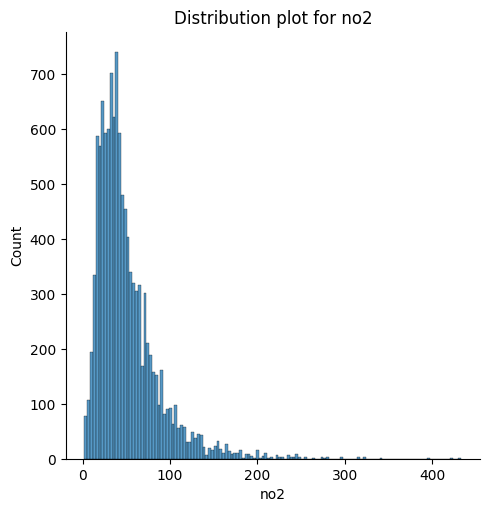

The distribution of no2 feature seems to be right-skewd distribution


In [230]:
# Check distribution again
sns.displot(X_train_cleaned, x='no2')

plt.title('Distribution plot for no2')

plt.show()
print('The distribution of no2 feature seems to be right-skewd distribution')

In [231]:
# Check skewness 
from scipy.stats import skew

# Calculate skewness
skew_value = skew(X_train_cleaned['no2'])
print('-'*30)
print(f"SKewness of no2: {round(skew_value, 4)}")
print('-'*30)
print(f'The skewness is being around {round(skew_value, 4)} which is heavily skewed to the right side')
print('This suggest that the distribution is heavily right-skewed')

------------------------------
SKewness of no2: 2.3724
------------------------------
The skewness is being around 2.3724 which is heavily skewed to the right side
This suggest that the distribution is heavily right-skewed


## **8. Scaling**

### **Log-transformation for right-skewed numerical features**

### **All these plots we have found:**

- `pm10`

- `so2`

- `o3`

- `co`

- `no2`


### **They have to be log-transformed due to:**

- They are all heavily right-skewed

- Continuous numerical features

- Showing long tails and concentrated values near zero

- Vulnerable to model distortion, especially with linear models or distance-based algorithms (like KNN, SVM, Logistic Regression, etc.)

In [232]:
# Apply log1p (log(1 + x)) for safe transformation
for col in ['pm10', 'so2', 'o3', 'co', 'no2']:
    X_train_cleaned[col + '_log'] = np.log1p(X_train_cleaned[col])
    X_test[col + '_log'] = np.log1p(X_test[col])

X_train_cleaned = X_train_cleaned.drop(columns=['co', 'no2', 'o3', 'pm10', 'so2'])
X_test = X_test.drop(columns=['co', 'no2', 'o3', 'pm10', 'so2'])

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1145569456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cleaned[col + '_log'] = np.log1p(X_train_cleaned[col])
C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1145569456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cleaned[col + '_log'] = np.log1p(X_train_cleaned[col])
C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1145569456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [233]:
X_train_cleaned

station_10T  station_11T  station_12T  station_15T  station_3T  \
0                1            0            0            0           0   
1                0            1            0            0           0   
2                0            0            1            0           0   
3                0            0            0            1           0   
4                0            0            0            0           1   
...            ...          ...          ...          ...         ...   
11605            0            0            0            0           0   
11606            1            0            0            0           0   
11607            0            1            0            0           0   
11608            0            0            1            0           0   
11609            0            0            0            1           0   

       station_5T  station_61T    temp  population_density  factory_area  \
0               0            0  305.04             1452.45       4770457   
1               0            0  306.10             3437.36        144736   
2               0            0  305.70            10275.79        297638   
3               0            0  306.66             4324.14       1148799   
4               0            0  305.44             9046.87        123059   
...           ...          ...     ...                 ...           ...   
11605           0            1  301.12             4542.29        631723   
11606           0            0  300.12             1452.45       4770457   
11607           0            0  299.93             3437.36        144736   
11608           0            0  299.74            10275.79        297638   
11609           0            0  300.15             4324.14       1148799   

       season_Cool Season  season_Hot Season  season_Rainy Season  pm10_log  \
0                       0                  0                    1  3.892840   
1                       0                  0                    1  3.915816   
2                       0                  0                    1  4.224203   
3                       0                  0                    1  3.915816   
4                       0                  0                    1  4.224203   
...                   ...                ...                  ...       ...   
11605                   1                  0                    0  5.144642   
11606                   1                  0                    0  5.023881   
11607                   1                  0                    0  5.740339   
11608                   1                  0                    0  5.566358   
11609                   1                  0                    0  5.740339   

        so2_log    o3_log    co_log   no2_log  
0      1.940179  3.740760  6.149109  2.603430  
1      2.859340  3.554491  6.553862  3.190888  
2      3.419692  0.722706  7.035154  3.724247  
3      2.859340  3.554491  6.553862  3.190888  
4      3.419692  0.722706  7.035154  3.724247  
...         ...       ...       ...       ...  
11605  3.379974  1.877937  7.880271  4.681483  
11606  2.332144  2.869602  7.420537  3.932610  
11607  4.187379  0.000000  8.731670  5.004349  
11608  4.578005  0.000000  8.432485  4.887412  
11609  4.187379  0.000000  8.731670  5.004349  

[11603 rows x 18 columns]

In [234]:
X_test

station_10T  station_11T  station_12T  station_15T  station_3T  \
11610            0            0            0            0           1   
11611            0            0            0            0           0   
11612            0            0            0            0           0   
11613            1            0            0            0           0   
11614            0            1            0            0           0   
...            ...          ...          ...          ...         ...   
14128            0            0            1            0           0   
14129            0            0            0            1           0   
14130            0            0            0            0           1   
14131            0            0            0            0           0   
14132            0            0            0            0           0   

       station_5T  station_61T    temp  population_density  factory_area  \
11610           0            0  300.20             9046.87        123059   
11611           1            0  300.20             4788.74         54185   
11612           0            1  300.88             4542.29        631723   
11613           0            0  299.25             1452.45       4770457   
11614           0            0  299.10             3437.36        144736   
...           ...          ...     ...                 ...           ...   
14128           0            0  302.13            10275.79        297638   
14129           0            0  302.07             4324.14       1148799   
14130           0            0  302.09             9046.87        123059   
14131           1            0  302.09             4788.74         54185   
14132           0            1  302.12             4542.29        631723   

       season_Cool Season  season_Hot Season  season_Rainy Season  pm10_log  \
11610                   1                  0                    0  5.566358   
11611                   1                  0                    0  5.566358   
11612                   1                  0                    0  4.963893   
11613                   1                  0                    0  4.968632   
11614                   1                  0                    0  5.800667   
...                   ...                ...                  ...       ...   
14128                   0                  1                    0  2.222459   
14129                   0                  1                    0  2.145931   
14130                   0                  1                    0  2.222459   
14131                   0                  1                    0  2.222459   
14132                   0                  1                    0  2.178155   

        so2_log    o3_log    co_log   no2_log  
11610  4.578005  0.000000  8.432485  4.887412  
11611  4.578005  0.000000  8.432485  4.887412  
11612  3.241029  2.151762  7.739555  4.560068  
11613  2.127041  3.079154  7.362943  3.848657  
11614  4.270676  0.000000  8.765566  5.013498  
...         ...       ...       ...       ...  
14128  0.254642  3.305054  5.130135  0.698135  
14129  0.270027  2.996732  5.162956  0.908259  
14130  0.254642  3.305054  5.130135  0.698135  
14131  0.254642  3.305054  5.130135  0.698135  
14132  0.215111  3.343215  5.093627  0.593327  

[1291 rows x 18 columns]

In [235]:
# Align target to the cleaned X
y_train_cleaned = y_train.loc[X_train_cleaned.index]

### **Apply Standard Scaler**

In [236]:
X_train.columns

Index(['station_10T', 'station_11T', 'station_12T', 'station_15T',
       'station_3T', 'station_5T', 'station_61T', 'temp', 'population_density',
       'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10', 'so2', 'no2', 'o3', 'co'],
      dtype='object')

In [237]:
from sklearn.preprocessing import StandardScaler

# Choose all columns to be scaled
log_cols = ['temp', 'population_density',
        'factory_area', 'season_Cool Season', 'season_Hot Season',
       'season_Rainy Season', 'pm10_log', 'so2_log', 'no2_log', 'co_log', 'o3_log']

# Fit only on training data, transform both
scaler = StandardScaler()
X_train_cleaned[log_cols] = scaler.fit_transform(X_train_cleaned[log_cols])
X_test[log_cols] = scaler.transform(X_test[log_cols])

In [238]:
X_train_cleaned

station_10T  station_11T  station_12T  station_15T  station_3T  \
0                1            0            0            0           0   
1                0            1            0            0           0   
2                0            0            1            0           0   
3                0            0            0            1           0   
4                0            0            0            0           1   
...            ...          ...          ...          ...         ...   
11605            0            0            0            0           0   
11606            1            0            0            0           0   
11607            0            1            0            0           0   
11608            0            0            1            0           0   
11609            0            0            0            1           0   

       station_5T  station_61T      temp  population_density  factory_area  \
0               0            0  0.830109           -1.365528      2.385410   
1               0            0  1.162721           -0.680557     -0.560282   
2               0            0  1.037207            1.679312     -0.462913   
3               0            0  1.338441           -0.374538      0.079112   
4               0            0  0.955623            1.255225     -0.574086   
...           ...          ...       ...                 ...           ...   
11605           0            1 -0.399927           -0.299257     -0.250165   
11606           0            0 -0.713712           -1.365528      2.385410   
11607           0            0 -0.773331           -0.680557     -0.560282   
11608           0            0 -0.832951            1.679312     -0.462913   
11609           0            0 -0.704299           -0.374538      0.079112   

       season_Cool Season  season_Hot Season  season_Rainy Season  pm10_log  \
0               -0.790614                0.0             0.790614 -0.956019   
1               -0.790614                0.0             0.790614 -0.925497   
2               -0.790614                0.0             0.790614 -0.515827   
3               -0.790614                0.0             0.790614 -0.925497   
4               -0.790614                0.0             0.790614 -0.515827   
...                   ...                ...                  ...       ...   
11605            1.264840                0.0            -1.264840  0.706910   
11606            1.264840                0.0            -1.264840  0.546488   
11607            1.264840                0.0            -1.264840  1.498252   
11608            1.264840                0.0            -1.264840  1.267130   
11609            1.264840                0.0            -1.264840  1.498252   

        so2_log    o3_log    co_log   no2_log  
0     -2.170824  1.152111 -1.869817 -1.757042  
1     -0.967083  1.054647 -1.356620 -0.848579  
2     -0.233240 -0.427056 -0.746376 -0.023776  
3     -0.967083  1.054647 -1.356620 -0.848579  
4     -0.233240 -0.427056 -0.746376 -0.023776  
...         ...       ...       ...       ...  
11605 -0.285255  0.177407  0.325171  1.456524  
11606 -1.657504  0.696286 -0.257739  0.298443  
11607  0.772132 -0.805205  1.404683  1.955814  
11608  1.283698 -0.805205  1.025337  1.774980  
11609  0.772132 -0.805205  1.404683  1.955814  

[11603 rows x 18 columns]

In [239]:
X_test

station_10T  station_11T  station_12T  station_15T  station_3T  \
11610            0            0            0            0           1   
11611            0            0            0            0           0   
11612            0            0            0            0           0   
11613            1            0            0            0           0   
11614            0            1            0            0           0   
...            ...          ...          ...          ...         ...   
14128            0            0            1            0           0   
14129            0            0            0            1           0   
14130            0            0            0            0           1   
14131            0            0            0            0           0   
14132            0            0            0            0           0   

       station_5T  station_61T      temp  population_density  factory_area  \
11610           0            0 -0.688609            1.255225     -0.574086   
11611           1            0 -0.688609           -0.214210     -0.617946   
11612           0            1 -0.475236           -0.299257     -0.250165   
11613           0            0 -0.986705           -1.365528      2.385410   
11614           0            0 -1.033773           -0.680557     -0.560282   
...           ...          ...       ...                 ...           ...   
14128           0            0 -0.083005            1.679312     -0.462913   
14129           0            0 -0.101832           -0.374538      0.079112   
14130           0            0 -0.095556            1.255225     -0.574086   
14131           1            0 -0.095556           -0.214210     -0.617946   
14132           0            1 -0.086143           -0.299257     -0.250165   

       season_Cool Season  season_Hot Season  season_Rainy Season  pm10_log  \
11610            1.264840                0.0             -1.26484  1.267130   
11611            1.264840                0.0             -1.26484  1.267130   
11612            1.264840                0.0             -1.26484  0.466799   
11613            1.264840                0.0             -1.26484  0.473094   
11614            1.264840                0.0             -1.26484  1.578393   
...                   ...                ...                  ...       ...   
14128           -0.790614                1.0             -1.26484 -3.175001   
14129           -0.790614                1.0             -1.26484 -3.276662   
14130           -0.790614                1.0             -1.26484 -3.175001   
14131           -0.790614                1.0             -1.26484 -3.175001   
14132           -0.790614                1.0             -1.26484 -3.233855   

        so2_log    o3_log    co_log   no2_log  
11610  1.283698 -0.805205  1.025337  1.774980  
11611  1.283698 -0.805205  1.025337  1.774980  
11612 -0.467219  0.320683  0.146753  1.268765  
11613 -1.926109  0.805932 -0.330763  0.168616  
11614  0.881218 -0.805205  1.447660  1.969963  
...         ...       ...       ...       ...  
14128 -4.378221  0.924132 -3.161802 -4.703450  
14129 -4.358073  0.762805 -3.120188 -4.378508  
14130 -4.378221  0.924132 -3.161802 -4.703450  
14131 -4.378221  0.924132 -3.161802 -4.703450  
14132 -4.429991  0.944099 -3.208091 -4.865529  

[1291 rows x 18 columns]

In [240]:
y_test

11610    144.39
11611    144.39
11612     87.53
11613     80.80
11614     32.59
          ...  
14128      3.96
14129      4.18
14130      3.96
14131      3.96
14132      3.81
Name: pm2_5, Length: 1291, dtype: float64

In [241]:
y_train

0         20.680
1         31.130
2         38.680
3         31.130
4         38.680
          ...   
11605     99.460
11606     81.520
11607     63.305
11608    144.390
11609     63.305
Name: pm2_5, Length: 11610, dtype: float64

### **Check the summary statistics for both features to confirm the transformations**

In [242]:
print(X_train_cleaned[log_cols].describe())
print('-'*140)
print('According to the summary statistics, the \'pm10_log\', \'so2_log\', \'co_log\', \'o3_log\' column has been successfully transformed and standardized')

               temp  population_density  factory_area  season_Cool Season  \
count  1.160300e+04        1.160300e+04  1.160300e+04        1.160300e+04   
mean  -5.584892e-15        1.604240e-16  5.492269e-18       -2.351533e-16   
std    1.000043e+00        1.000043e+00  1.000043e+00        1.000043e+00   
min   -3.048272e+00       -1.365528e+00 -6.179456e-01       -7.906137e-01   
25%   -7.105744e-01       -6.805566e-01 -5.740861e-01       -7.906137e-01   
50%   -3.279908e-02       -2.992572e-01 -4.629130e-01       -7.906137e-01   
75%    6.951818e-01        1.255225e+00  7.911237e-02        1.264840e+00   
max    3.873823e+00        1.679312e+00  2.385410e+00        1.264840e+00   

       season_Hot Season  season_Rainy Season      pm10_log       so2_log  \
count            11603.0         1.160300e+04  1.160300e+04  1.160300e+04   
mean                 0.0        -7.838444e-17  5.290950e-16  2.694465e-16   
std                  0.0         1.000043e+00  1.000043e+00  1.000043e+00  

## **9. Modeling**

### **Modeling using non-parametric method (`XGBoost`, `RandomForest`, `DecisionTree`)**

#### **Scaling for `XGBoost` model**
- We will use these scaled X features for `XGBoost` model only

In [243]:
# Import modules for modeling
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [244]:
X_test

station_10T  station_11T  station_12T  station_15T  station_3T  \
11610            0            0            0            0           1   
11611            0            0            0            0           0   
11612            0            0            0            0           0   
11613            1            0            0            0           0   
11614            0            1            0            0           0   
...            ...          ...          ...          ...         ...   
14128            0            0            1            0           0   
14129            0            0            0            1           0   
14130            0            0            0            0           1   
14131            0            0            0            0           0   
14132            0            0            0            0           0   

       station_5T  station_61T      temp  population_density  factory_area  \
11610           0            0 -0.688609            1.255225     -0.574086   
11611           1            0 -0.688609           -0.214210     -0.617946   
11612           0            1 -0.475236           -0.299257     -0.250165   
11613           0            0 -0.986705           -1.365528      2.385410   
11614           0            0 -1.033773           -0.680557     -0.560282   
...           ...          ...       ...                 ...           ...   
14128           0            0 -0.083005            1.679312     -0.462913   
14129           0            0 -0.101832           -0.374538      0.079112   
14130           0            0 -0.095556            1.255225     -0.574086   
14131           1            0 -0.095556           -0.214210     -0.617946   
14132           0            1 -0.086143           -0.299257     -0.250165   

       season_Cool Season  season_Hot Season  season_Rainy Season  pm10_log  \
11610            1.264840                0.0             -1.26484  1.267130   
11611            1.264840                0.0             -1.26484  1.267130   
11612            1.264840                0.0             -1.26484  0.466799   
11613            1.264840                0.0             -1.26484  0.473094   
11614            1.264840                0.0             -1.26484  1.578393   
...                   ...                ...                  ...       ...   
14128           -0.790614                1.0             -1.26484 -3.175001   
14129           -0.790614                1.0             -1.26484 -3.276662   
14130           -0.790614                1.0             -1.26484 -3.175001   
14131           -0.790614                1.0             -1.26484 -3.175001   
14132           -0.790614                1.0             -1.26484 -3.233855   

        so2_log    o3_log    co_log   no2_log  
11610  1.283698 -0.805205  1.025337  1.774980  
11611  1.283698 -0.805205  1.025337  1.774980  
11612 -0.467219  0.320683  0.146753  1.268765  
11613 -1.926109  0.805932 -0.330763  0.168616  
11614  0.881218 -0.805205  1.447660  1.969963  
...         ...       ...       ...       ...  
14128 -4.378221  0.924132 -3.161802 -4.703450  
14129 -4.358073  0.762805 -3.120188 -4.378508  
14130 -4.378221  0.924132 -3.161802 -4.703450  
14131 -4.378221  0.924132 -3.161802 -4.703450  
14132 -4.429991  0.944099 -3.208091 -4.865529  

[1291 rows x 18 columns]

In [245]:
# Double-Check Time Splits (Data Leakage Check)
print("Train Date Range:", X_train_cleaned.index.min(), "to", X_train_cleaned.index.max())
print("Test Date Range:", X_test.index.min(), "to", X_test.index.max())

Train Date Range: 0 to 11609
Test Date Range: 11610 to 14132


In [246]:
X_test.shape

(1291, 18)

In [247]:
X_train_cleaned.shape

(11603, 18)

In [248]:
# Define the models
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42)
}

# Define hyperparameter grids
param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200, 250],
        "max_depth": [8, 12, 15],
        "min_samples_split": [3, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 250],
        "learning_rate": [0.1, 0.01, 0.001],
        "max_depth": [8, 12],
        "subsample": [0.7, 0.9],
        "colsample_bytree": [0.7, 1]
    },
    "DecisionTree": {
        "max_depth": [5, 10, 20],
        "min_samples_split": [5, 7, 12]
    }
}

In [249]:
X_train_cleaned = X_train_cleaned.drop(columns=[col for col in X_train_cleaned.columns if col.startswith("station_")])

In [250]:
X_train_cleaned

temp  population_density  factory_area  season_Cool Season  \
0      0.830109           -1.365528      2.385410           -0.790614   
1      1.162721           -0.680557     -0.560282           -0.790614   
2      1.037207            1.679312     -0.462913           -0.790614   
3      1.338441           -0.374538      0.079112           -0.790614   
4      0.955623            1.255225     -0.574086           -0.790614   
...         ...                 ...           ...                 ...   
11605 -0.399927           -0.299257     -0.250165            1.264840   
11606 -0.713712           -1.365528      2.385410            1.264840   
11607 -0.773331           -0.680557     -0.560282            1.264840   
11608 -0.832951            1.679312     -0.462913            1.264840   
11609 -0.704299           -0.374538      0.079112            1.264840   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
0                    0.0             0.790614 -0.956019 -2.170824  1.152111   
1                    0.0             0.790614 -0.925497 -0.967083  1.054647   
2                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
3                    0.0             0.790614 -0.925497 -0.967083  1.054647   
4                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
...                  ...                  ...       ...       ...       ...   
11605                0.0            -1.264840  0.706910 -0.285255  0.177407   
11606                0.0            -1.264840  0.546488 -1.657504  0.696286   
11607                0.0            -1.264840  1.498252  0.772132 -0.805205   
11608                0.0            -1.264840  1.267130  1.283698 -0.805205   
11609                0.0            -1.264840  1.498252  0.772132 -0.805205   

         co_log   no2_log  
0     -1.869817 -1.757042  
1     -1.356620 -0.848579  
2     -0.746376 -0.023776  
3     -1.356620 -0.848579  
4     -0.746376 -0.023776  
...         ...       ...  
11605  0.325171  1.456524  
11606 -0.257739  0.298443  
11607  1.404683  1.955814  
11608  1.025337  1.774980  
11609  1.404683  1.955814  

[11603 rows x 11 columns]

In [251]:
X_test = X_test.drop(columns=[col for col in X_test.columns if col.startswith("station_")])

In [252]:
X_test

temp  population_density  factory_area  season_Cool Season  \
11610 -0.688609            1.255225     -0.574086            1.264840   
11611 -0.688609           -0.214210     -0.617946            1.264840   
11612 -0.475236           -0.299257     -0.250165            1.264840   
11613 -0.986705           -1.365528      2.385410            1.264840   
11614 -1.033773           -0.680557     -0.560282            1.264840   
...         ...                 ...           ...                 ...   
14128 -0.083005            1.679312     -0.462913           -0.790614   
14129 -0.101832           -0.374538      0.079112           -0.790614   
14130 -0.095556            1.255225     -0.574086           -0.790614   
14131 -0.095556           -0.214210     -0.617946           -0.790614   
14132 -0.086143           -0.299257     -0.250165           -0.790614   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
11610                0.0             -1.26484  1.267130  1.283698 -0.805205   
11611                0.0             -1.26484  1.267130  1.283698 -0.805205   
11612                0.0             -1.26484  0.466799 -0.467219  0.320683   
11613                0.0             -1.26484  0.473094 -1.926109  0.805932   
11614                0.0             -1.26484  1.578393  0.881218 -0.805205   
...                  ...                  ...       ...       ...       ...   
14128                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14129                1.0             -1.26484 -3.276662 -4.358073  0.762805   
14130                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14131                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14132                1.0             -1.26484 -3.233855 -4.429991  0.944099   

         co_log   no2_log  
11610  1.025337  1.774980  
11611  1.025337  1.774980  
11612  0.146753  1.268765  
11613 -0.330763  0.168616  
11614  1.447660  1.969963  
...         ...       ...  
14128 -3.161802 -4.703450  
14129 -3.120188 -4.378508  
14130 -3.161802 -4.703450  
14131 -3.161802 -4.703450  
14132 -3.208091 -4.865529  

[1291 rows x 11 columns]

In [253]:
y_test

11610    144.39
11611    144.39
11612     87.53
11613     80.80
11614     32.59
          ...  
14128      3.96
14129      4.18
14130      3.96
14131      3.96
14132      3.81
Name: pm2_5, Length: 1291, dtype: float64

In [254]:
y_train_cleaned

0         20.680
1         31.130
2         38.680
3         31.130
4         38.680
          ...   
11605     99.460
11606     81.520
11607     63.305
11608    144.390
11609     63.305
Name: pm2_5, Length: 11603, dtype: float64

In [255]:
X_train_cleaned

temp  population_density  factory_area  season_Cool Season  \
0      0.830109           -1.365528      2.385410           -0.790614   
1      1.162721           -0.680557     -0.560282           -0.790614   
2      1.037207            1.679312     -0.462913           -0.790614   
3      1.338441           -0.374538      0.079112           -0.790614   
4      0.955623            1.255225     -0.574086           -0.790614   
...         ...                 ...           ...                 ...   
11605 -0.399927           -0.299257     -0.250165            1.264840   
11606 -0.713712           -1.365528      2.385410            1.264840   
11607 -0.773331           -0.680557     -0.560282            1.264840   
11608 -0.832951            1.679312     -0.462913            1.264840   
11609 -0.704299           -0.374538      0.079112            1.264840   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
0                    0.0             0.790614 -0.956019 -2.170824  1.152111   
1                    0.0             0.790614 -0.925497 -0.967083  1.054647   
2                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
3                    0.0             0.790614 -0.925497 -0.967083  1.054647   
4                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
...                  ...                  ...       ...       ...       ...   
11605                0.0            -1.264840  0.706910 -0.285255  0.177407   
11606                0.0            -1.264840  0.546488 -1.657504  0.696286   
11607                0.0            -1.264840  1.498252  0.772132 -0.805205   
11608                0.0            -1.264840  1.267130  1.283698 -0.805205   
11609                0.0            -1.264840  1.498252  0.772132 -0.805205   

         co_log   no2_log  
0     -1.869817 -1.757042  
1     -1.356620 -0.848579  
2     -0.746376 -0.023776  
3     -1.356620 -0.848579  
4     -0.746376 -0.023776  
...         ...       ...  
11605  0.325171  1.456524  
11606 -0.257739  0.298443  
11607  1.404683  1.955814  
11608  1.025337  1.774980  
11609  1.404683  1.955814  

[11603 rows x 11 columns]

In [256]:
# Perform Cross-Validation and GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

best_models = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # # Use scaled data for XGBoost, but original data for RF and DT
    # X_train_cleaned = X_train_cleaned if model_name == "XGBoost" else X_train
    # X_test_used = X_test if model_name == "XGBoost" else X_test

    # GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train_cleaned, y_train_cleaned)

    # Best model
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Cross-validation scores
    mse_scores = -cross_val_score(best_model, X_train_cleaned, y_train_cleaned, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(mse_scores)

    mae_scores = -cross_val_score(best_model, X_train_cleaned, y_train_cleaned, cv=5, scoring="neg_mean_absolute_error")
    r2_scores = cross_val_score(best_model, X_train_cleaned, y_train_cleaned, cv=5, scoring="r2")

    mean_cv_rmse = rmse_scores.mean()
    mean_cv_mae = mae_scores.mean()
    mean_cv_mse = -mse_scores.mean()
    mean_cv_r2 = r2_scores.mean()

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"{model_name} Mean CV RMSE: {mean_cv_rmse}")
    print(f"{model_name} Mean CV MAE: {mean_cv_mae}")
    print(f"{model_name} Mean CV MSE: {mean_cv_mse}")
    print(f"{model_name} Mean CV R²: {mean_cv_r2}")

    print(f"{model_name} Test RMSE: {test_rmse}")
    print(f"{model_name} Test MAE: {test_mae}")
    print(f"{model_name} Test MSE: {test_mse}")
    print(f"{model_name} Test R²: {test_r2}\n") 

Training RandomForest...
RandomForest Mean CV RMSE: 12.852386449819278
RandomForest Mean CV MAE: 7.649770542406318
RandomForest Mean CV MSE: -177.6366260200761
RandomForest Mean CV R²: 0.8068362723980183
RandomForest Test RMSE: 10.982860270514914
RandomForest Test MAE: 5.833144424345439
RandomForest Test MSE: 120.62321972165493
RandomForest Test R²: 0.8761427145595069

Training XGBoost...
XGBoost Mean CV RMSE: 12.471040897786319
XGBoost Mean CV MAE: 7.48887977393246
XGBoost Mean CV MSE: -168.44409597651915
XGBoost Mean CV R²: 0.8165701665464317
XGBoost Test RMSE: 10.146072088643475
XGBoost Test MAE: 5.807055082978619
XGBoost Test MSE: 102.94277882795016
XGBoost Test R²: 0.8942971911150039

Training DecisionTree...
DecisionTree Mean CV RMSE: 14.777887785541722
DecisionTree Mean CV MAE: 9.759514350563498
DecisionTree Mean CV MSE: -230.9468851787038
DecisionTree Mean CV R²: 0.7457814099000715
DecisionTree Test RMSE: 12.974886321281824
DecisionTree Test MAE: 7.798185472523801
DecisionTree 

### **Best Model: XGBoost**

XGBoost sparkled in cross-validation, it is also stumbled less on the test set.

XGBoost had:

- Stable performance between CV and test

- Lowest test RMSE and MSE

- Highest test R²

### **Save the model for future usages...**

In [257]:
import os
import pickle

# Define save directory
save_dir = "../saved_model"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# File paths
model_path = os.path.join(save_dir, "best_xgb_model.pkl")
scaler_path = os.path.join(save_dir, "scaler.pkl")

# Save column names order during training
with open("../saved_model/log_col_order.pkl", "wb") as f:
    pickle.dump(log_cols, f)


# Save objects
pickle.dump(best_models["XGBoost"], open(model_path, "wb"))  # Save model
pickle.dump(scaler, open(scaler_path, "wb"))  # Save MinMaxScaler (or StandardScaler)

print(f"Best XGBoost model has been successfully saved in {save_dir}")
print(f"The column names order during training has been successfully saved in {save_dir}")
print(f"The scaler has been successfully saved in {save_dir}")

Best XGBoost model has been successfully saved in ../saved_model
The column names order during training has been successfully saved in ../saved_model
The scaler has been successfully saved in ../saved_model


### **Load the model...**

In [258]:
X_test.columns

Index(['temp', 'population_density', 'factory_area', 'season_Cool Season',
       'season_Hot Season', 'season_Rainy Season', 'pm10_log', 'so2_log',
       'o3_log', 'co_log', 'no2_log'],
      dtype='object')

In [259]:
# Load saved model and scaler
with open("../saved_model/best_xgb_model.pkl", "rb") as f:
    best_xgb_model = pickle.load(f)
    print("Model loaded successfully!")

with open("../saved_model/scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)
    print("Scaler loaded successfully!")

with open("../saved_model/log_col_order.pkl", "rb") as f:
    log_cols = pickle.load(f)

# # Define other columns used in training
# other_cols = ['temp', 'population_density', 'factory_area',
#               'season_Cool Season', 'season_Hot Season', 'season_Rainy Season']

# Prepare input features
X_test_log = X_test[log_cols]
scaled_log = pd.DataFrame(
    loaded_scaler.transform(X_test_log),  # no .values
    columns=log_cols,
    index=X_test.index
)


# X_test_final = pd.concat([scaled_log, X_test[other_cols]], axis=1)
X_test_final = X_test_log.copy()

# [Optional safety step]
# Ensure column order matches what model was trained with
if hasattr(best_xgb_model, 'feature_names_in_'):
    X_test_final = X_test_final[best_xgb_model.feature_names_in_]

# Make predictions
predictions = best_xgb_model.predict(X_test_final)

Model loaded successfully!
Scaler loaded successfully!


# **9.Feature Importance**

### **Check feature importance**

Used features (count = 11):
['temp', 'population_density', 'factory_area', 'season_Cool Season', 'season_Hot Season', 'season_Rainy Season', 'pm10_log', 'so2_log', 'o3_log', 'co_log', 'no2_log']
xgb_model.feature_importances_ shape: (11,)


C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\1139130461.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=importance_df, palette="coolwarm")


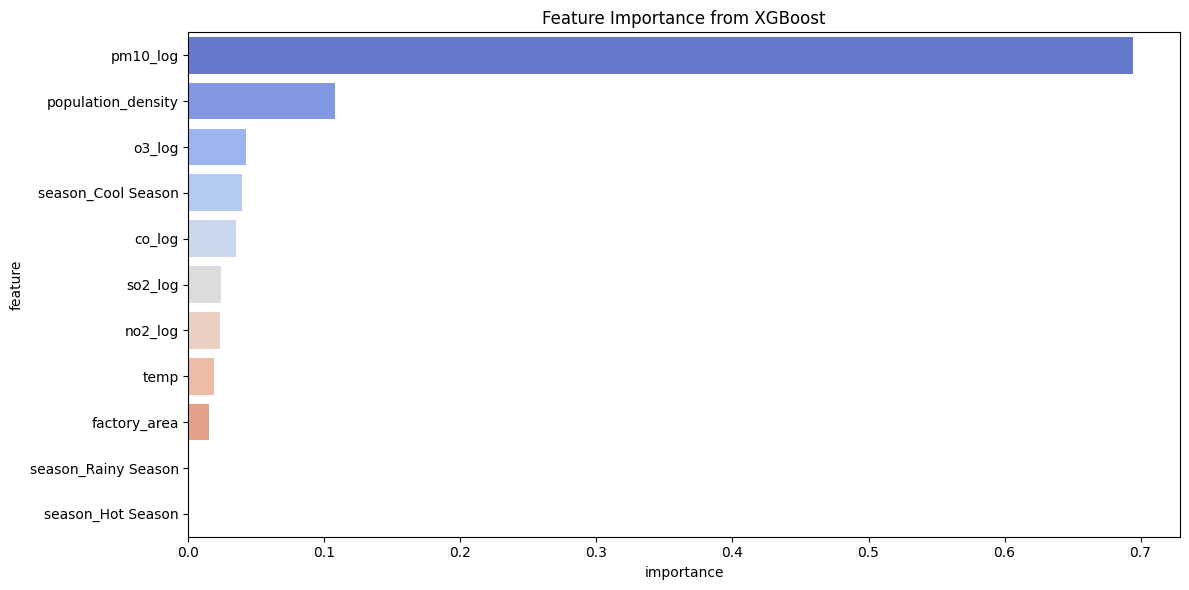

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Fit a XGBoost model on the entire train set for a global view
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_cleaned, y_train_cleaned)

# IMPORTANT: Use the actual feature names that were passed into the model
used_features = X_train_cleaned.columns.tolist()
if 'pm2_5' in used_features:
    used_features.remove('pm2_5')
print("Used features (count = {}):".format(len(used_features)))
print(used_features)

# Make sure xgb_model.feature_importances_ has the same length as used_features
print("xgb_model.feature_importances_ shape:", xgb_model.feature_importances_.shape)

# Create a DataFrame with feature importance
importance_df = pd.DataFrame({
    "feature": used_features,
    "importance": xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="importance", y="feature", data=importance_df, palette="coolwarm")
plt.title("Feature Importance from XGBoost")
plt.tight_layout()
plt.show()


### **Check overall feature correlation to pm2_5**

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\2790382756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_correlations.values, y=pm25_correlations.index, palette='coolwarm')


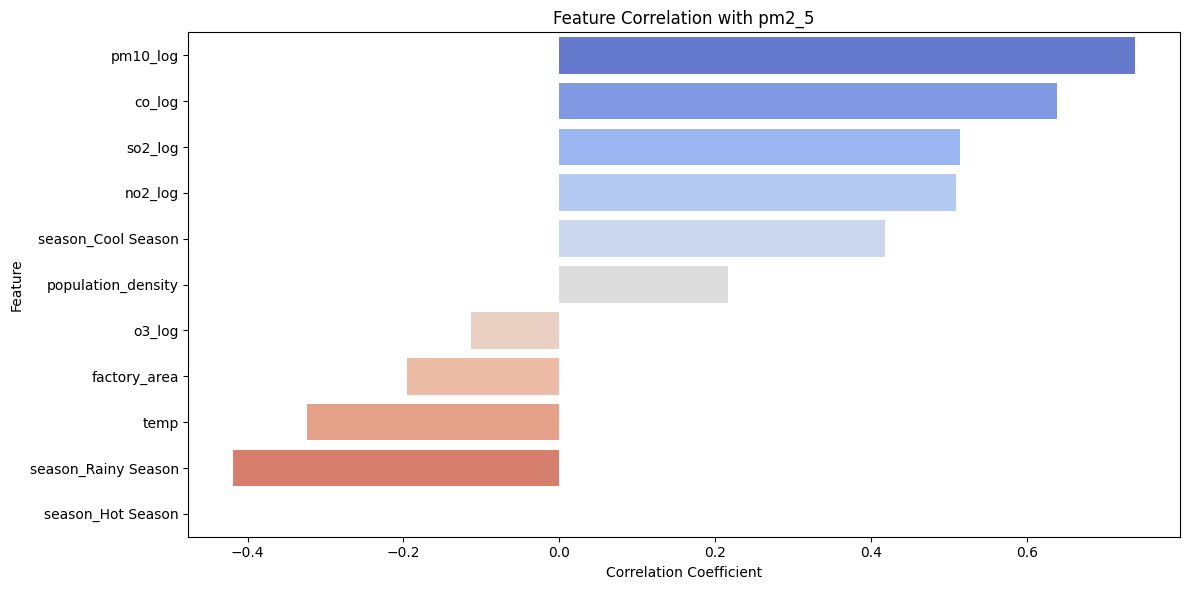

In [261]:
# Plot correlation
X_train_cleaned['pm2_5'] = y_train_cleaned
correlation_matrix = X_train_cleaned.corr()
pm25_correlations = correlation_matrix['pm2_5'].drop('pm2_5').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=pm25_correlations.values, y=pm25_correlations.index, palette='coolwarm')
plt.title('Feature Correlation with pm2_5')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### **Check feature correlation to pm2_5 for each feature one by one**

#### **Temperature vs pm2_5**

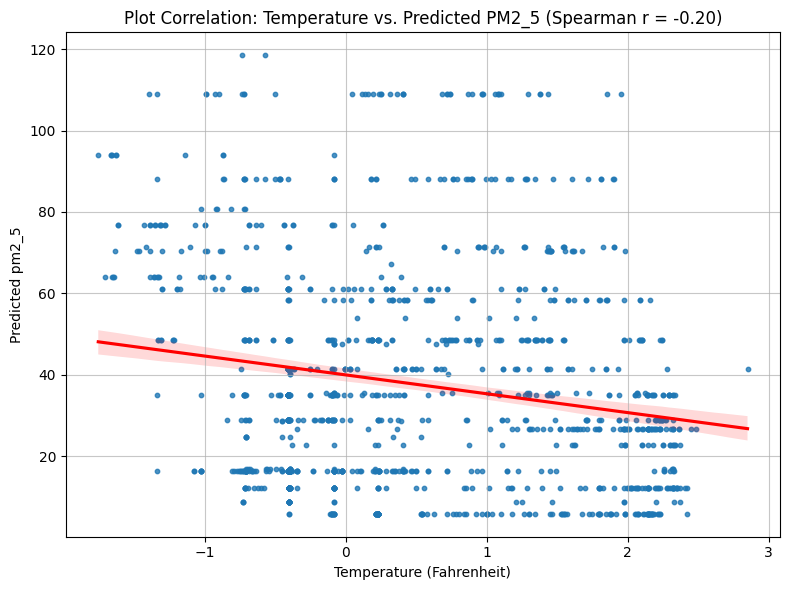

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['temp'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['temp'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: Temperature vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **Population density vs pm2_5**

In [263]:
X_test.columns

Index(['temp', 'population_density', 'factory_area', 'season_Cool Season',
       'season_Hot Season', 'season_Rainy Season', 'pm10_log', 'so2_log',
       'o3_log', 'co_log', 'no2_log'],
      dtype='object')

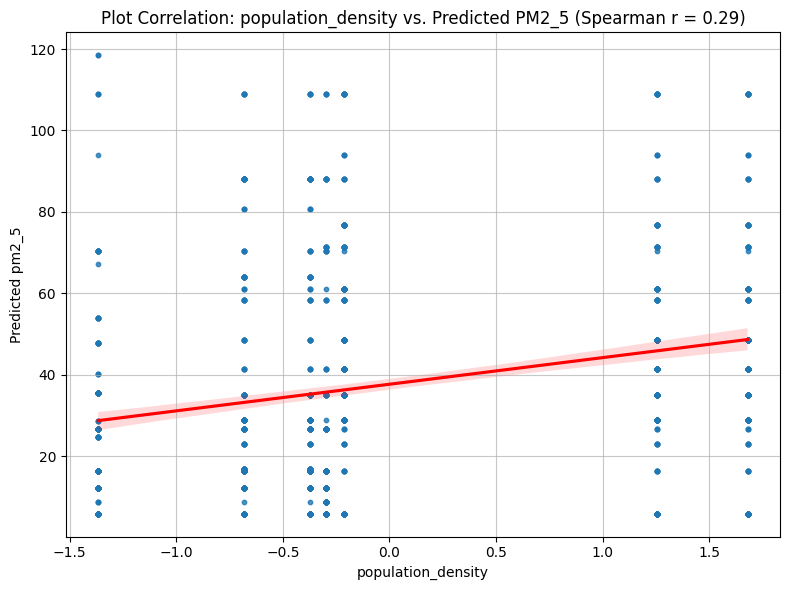

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['population_density'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['population_density'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('population_density')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: population_density vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **Factory area vs pm2_5**

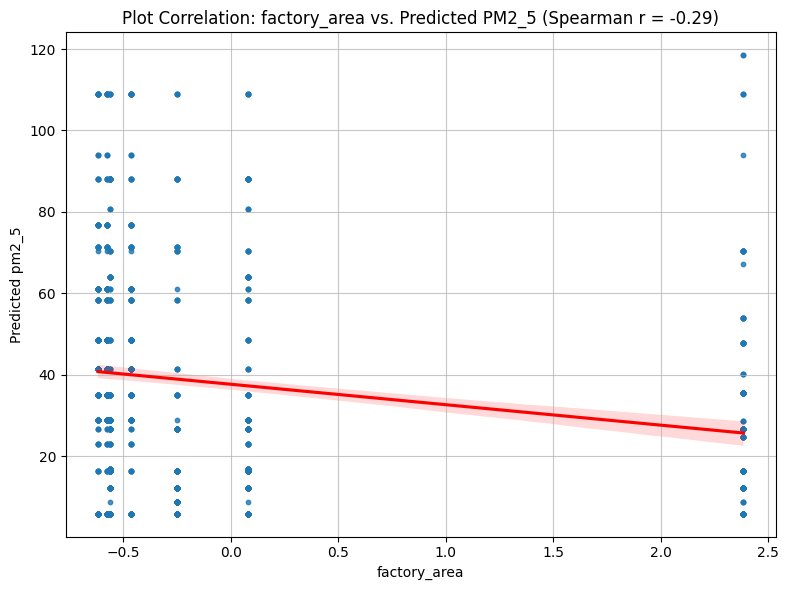

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['factory_area'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['factory_area'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('factory_area')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: factory_area vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **season_Cool Season vs pm2_5**

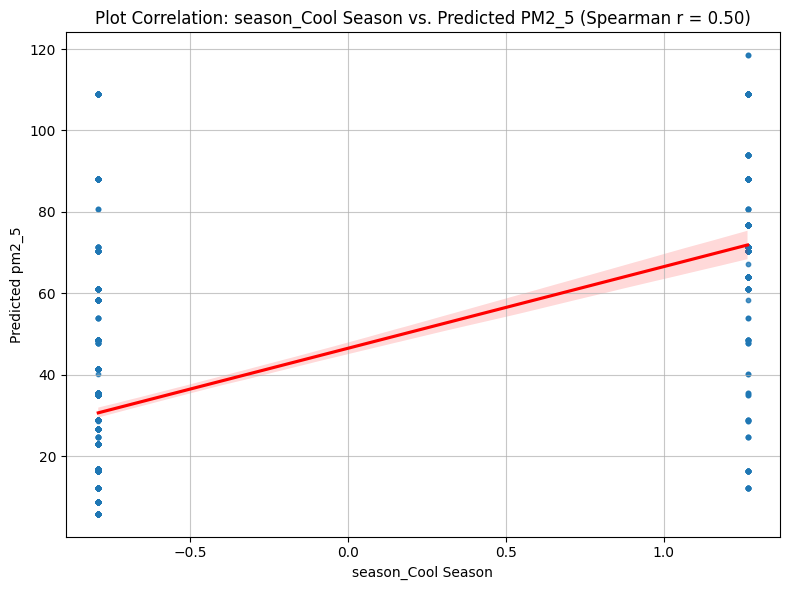

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['season_Cool Season'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['season_Cool Season'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('season_Cool Season')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: season_Cool Season vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **season_Hot Season vs pm2_5** `Box_plot`

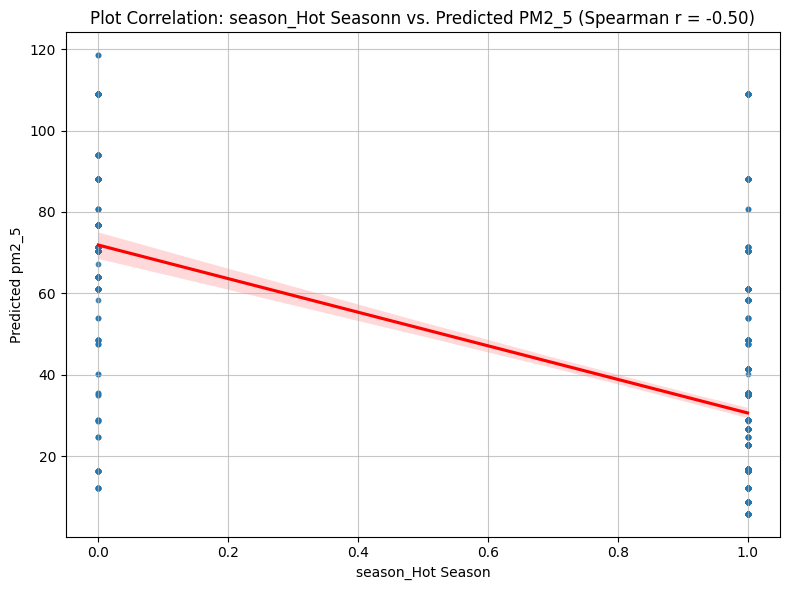

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['season_Hot Season'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['season_Hot Season'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('season_Hot Season')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: season_Hot Seasonn vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **season_Rainy Season vs pm2_5**

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_41828\2472194936.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_coef, _ = spearmanr(X_test['season_Rainy Season'], y_pred)


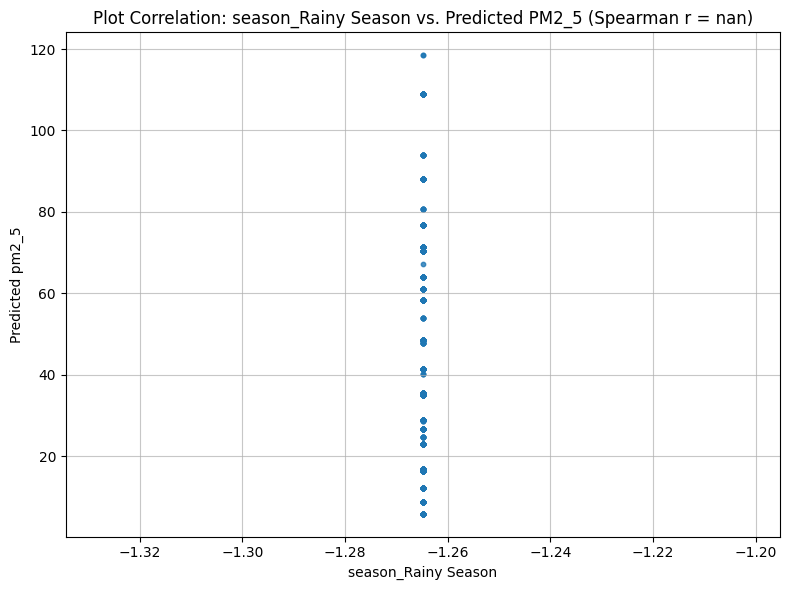

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['season_Rainy Season'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['season_Rainy Season'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('season_Rainy Season')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: season_Rainy Season vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **pm10 vs pm2_5**

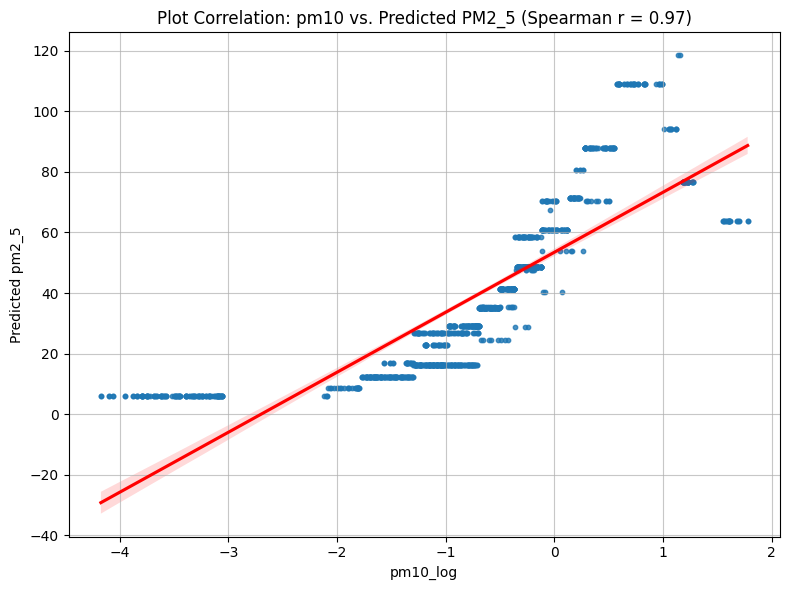

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['pm10_log'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['pm10_log'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('pm10_log')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: pm10 vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **so2 vs pm2_5**

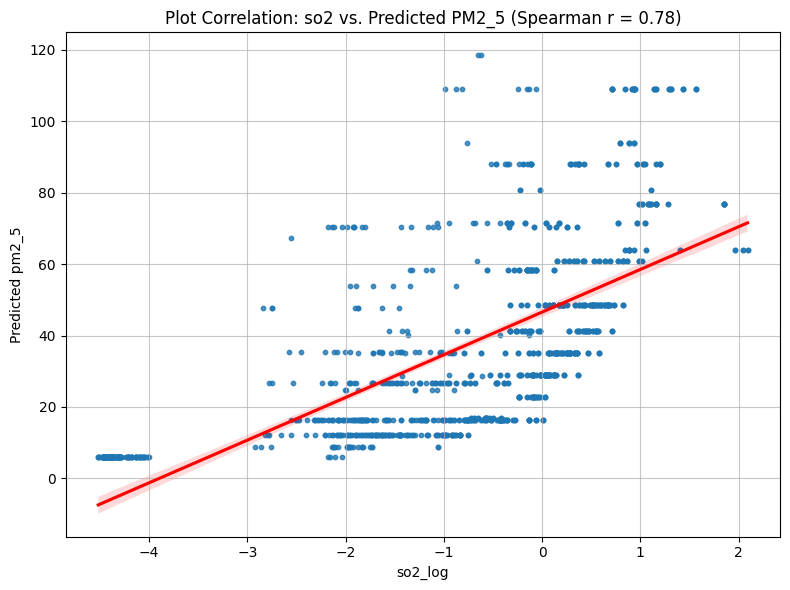

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['so2_log'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['so2_log'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('so2_log')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: so2 vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **o3 vs pm2_5**

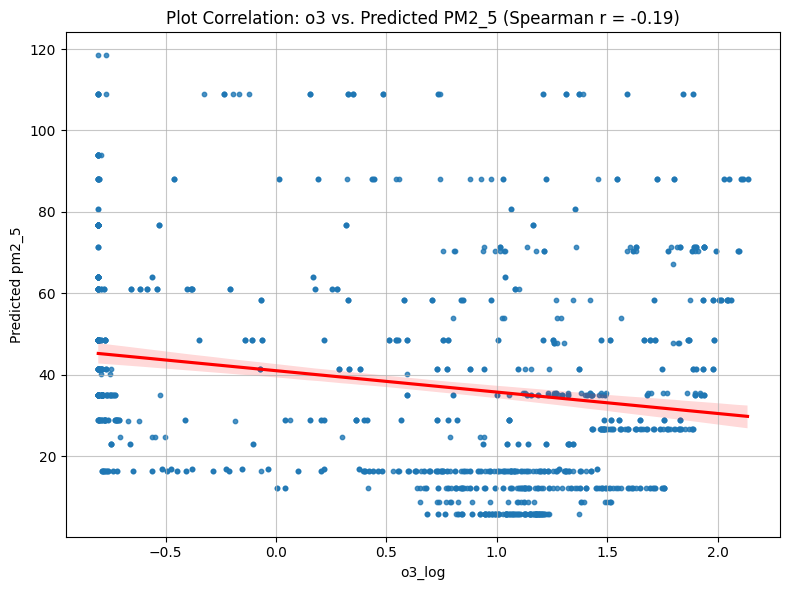

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['o3_log'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['o3_log'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('o3_log')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: o3 vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **co vs pm2_5**

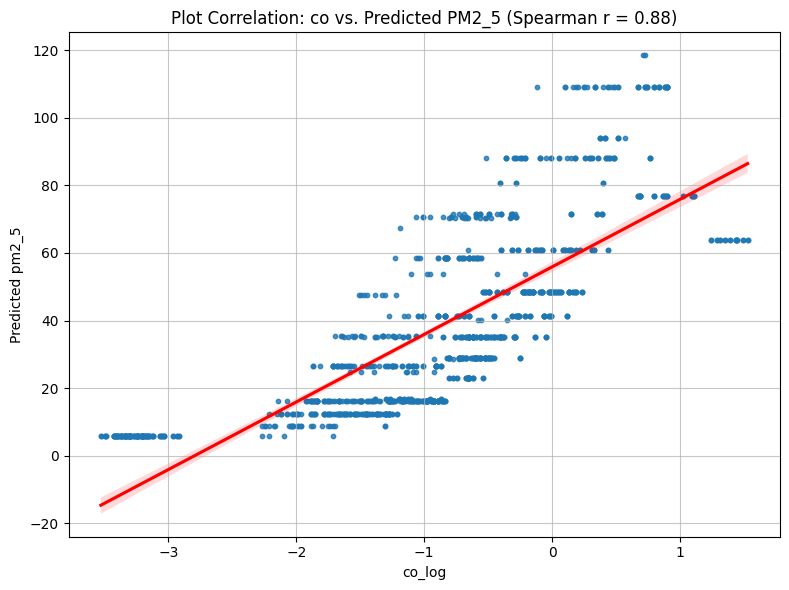

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['co_log'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['co_log'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('co_log')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: co vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

#### **no2 vs pm2_5**

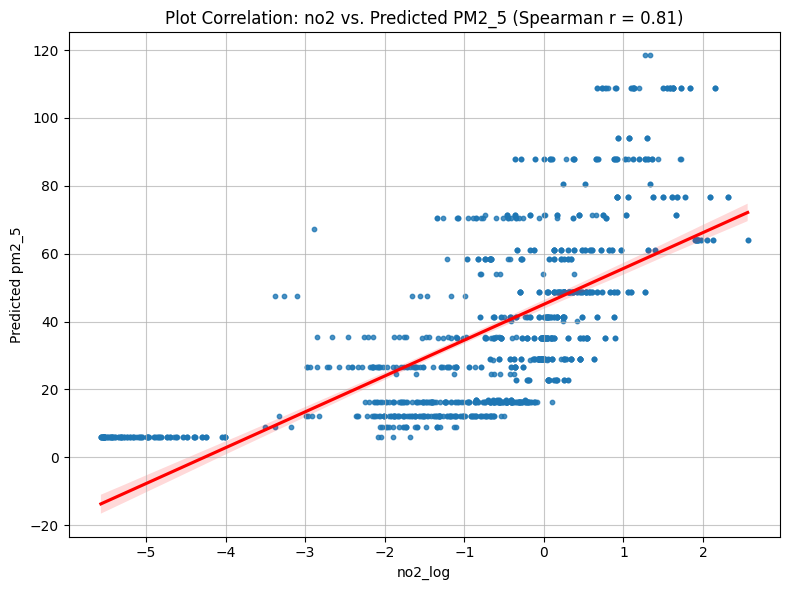

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Spearman correlation coefficient
spearman_coef, _ = spearmanr(X_test['no2_log'], y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['no2_log'], y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('no2_log')
plt.ylabel('Predicted pm2_5')
plt.title(f"Plot Correlation: no2 vs. Predicted PM2_5 (Spearman r = {spearman_coef:.2f})")
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

In [274]:
X_train_cleaned

temp  population_density  factory_area  season_Cool Season  \
0      0.830109           -1.365528      2.385410           -0.790614   
1      1.162721           -0.680557     -0.560282           -0.790614   
2      1.037207            1.679312     -0.462913           -0.790614   
3      1.338441           -0.374538      0.079112           -0.790614   
4      0.955623            1.255225     -0.574086           -0.790614   
...         ...                 ...           ...                 ...   
11605 -0.399927           -0.299257     -0.250165            1.264840   
11606 -0.713712           -1.365528      2.385410            1.264840   
11607 -0.773331           -0.680557     -0.560282            1.264840   
11608 -0.832951            1.679312     -0.462913            1.264840   
11609 -0.704299           -0.374538      0.079112            1.264840   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
0                    0.0             0.790614 -0.956019 -2.170824  1.152111   
1                    0.0             0.790614 -0.925497 -0.967083  1.054647   
2                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
3                    0.0             0.790614 -0.925497 -0.967083  1.054647   
4                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
...                  ...                  ...       ...       ...       ...   
11605                0.0            -1.264840  0.706910 -0.285255  0.177407   
11606                0.0            -1.264840  0.546488 -1.657504  0.696286   
11607                0.0            -1.264840  1.498252  0.772132 -0.805205   
11608                0.0            -1.264840  1.267130  1.283698 -0.805205   
11609                0.0            -1.264840  1.498252  0.772132 -0.805205   

         co_log   no2_log    pm2_5  
0     -1.869817 -1.757042   20.680  
1     -1.356620 -0.848579   31.130  
2     -0.746376 -0.023776   38.680  
3     -1.356620 -0.848579   31.130  
4     -0.746376 -0.023776   38.680  
...         ...       ...      ...  
11605  0.325171  1.456524   99.460  
11606 -0.257739  0.298443   81.520  
11607  1.404683  1.955814   63.305  
11608  1.025337  1.774980  144.390  
11609  1.404683  1.955814   63.305  

[11603 rows x 12 columns]

In [275]:
X_test

temp  population_density  factory_area  season_Cool Season  \
11610 -0.688609            1.255225     -0.574086            1.264840   
11611 -0.688609           -0.214210     -0.617946            1.264840   
11612 -0.475236           -0.299257     -0.250165            1.264840   
11613 -0.986705           -1.365528      2.385410            1.264840   
11614 -1.033773           -0.680557     -0.560282            1.264840   
...         ...                 ...           ...                 ...   
14128 -0.083005            1.679312     -0.462913           -0.790614   
14129 -0.101832           -0.374538      0.079112           -0.790614   
14130 -0.095556            1.255225     -0.574086           -0.790614   
14131 -0.095556           -0.214210     -0.617946           -0.790614   
14132 -0.086143           -0.299257     -0.250165           -0.790614   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
11610                0.0             -1.26484  1.267130  1.283698 -0.805205   
11611                0.0             -1.26484  1.267130  1.283698 -0.805205   
11612                0.0             -1.26484  0.466799 -0.467219  0.320683   
11613                0.0             -1.26484  0.473094 -1.926109  0.805932   
11614                0.0             -1.26484  1.578393  0.881218 -0.805205   
...                  ...                  ...       ...       ...       ...   
14128                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14129                1.0             -1.26484 -3.276662 -4.358073  0.762805   
14130                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14131                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14132                1.0             -1.26484 -3.233855 -4.429991  0.944099   

         co_log   no2_log  
11610  1.025337  1.774980  
11611  1.025337  1.774980  
11612  0.146753  1.268765  
11613 -0.330763  0.168616  
11614  1.447660  1.969963  
...         ...       ...  
14128 -3.161802 -4.703450  
14129 -3.120188 -4.378508  
14130 -3.161802 -4.703450  
14131 -3.161802 -4.703450  
14132 -3.208091 -4.865529  

[1291 rows x 11 columns]

In [276]:
y_test

11610    144.39
11611    144.39
11612     87.53
11613     80.80
11614     32.59
          ...  
14128      3.96
14129      4.18
14130      3.96
14131      3.96
14132      3.81
Name: pm2_5, Length: 1291, dtype: float64

In [277]:
y_pred

array([76.74866422, 76.74866422, 88.01131413, ...,  5.87140468,
        5.87140468,  5.87140468], shape=(1291,))

### **Actual pm2_5 vs Predicted pm2_5 dataframe with error rate**

In [278]:
# Combine them into a single DataFrame for comparison
comparison_df = X_test.copy()
comparison_df['y_test'] = y_test.values
comparison_df['y_pred'] = y_pred

# Calculate error rate as percentage difference
comparison_df['error_percent'] = ((comparison_df['y_pred'] - comparison_df['y_test']).abs() / comparison_df['y_test']) * 100

comparison_df

temp  population_density  factory_area  season_Cool Season  \
11610 -0.688609            1.255225     -0.574086            1.264840   
11611 -0.688609           -0.214210     -0.617946            1.264840   
11612 -0.475236           -0.299257     -0.250165            1.264840   
11613 -0.986705           -1.365528      2.385410            1.264840   
11614 -1.033773           -0.680557     -0.560282            1.264840   
...         ...                 ...           ...                 ...   
14128 -0.083005            1.679312     -0.462913           -0.790614   
14129 -0.101832           -0.374538      0.079112           -0.790614   
14130 -0.095556            1.255225     -0.574086           -0.790614   
14131 -0.095556           -0.214210     -0.617946           -0.790614   
14132 -0.086143           -0.299257     -0.250165           -0.790614   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
11610                0.0             -1.26484  1.267130  1.283698 -0.805205   
11611                0.0             -1.26484  1.267130  1.283698 -0.805205   
11612                0.0             -1.26484  0.466799 -0.467219  0.320683   
11613                0.0             -1.26484  0.473094 -1.926109  0.805932   
11614                0.0             -1.26484  1.578393  0.881218 -0.805205   
...                  ...                  ...       ...       ...       ...   
14128                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14129                1.0             -1.26484 -3.276662 -4.358073  0.762805   
14130                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14131                1.0             -1.26484 -3.175001 -4.378221  0.924132   
14132                1.0             -1.26484 -3.233855 -4.429991  0.944099   

         co_log   no2_log  y_test     y_pred  error_percent  
11610  1.025337  1.774980  144.39  76.748664      46.846275  
11611  1.025337  1.774980  144.39  76.748664      46.846275  
11612  0.146753  1.268765   87.53  88.011314       0.549885  
11613 -0.330763  0.168616   80.80  70.420000      12.846535  
11614  1.447660  1.969963   32.59  63.923526      96.144602  
...         ...       ...     ...        ...            ...  
14128 -3.161802 -4.703450    3.96   5.871405      48.267795  
14129 -3.120188 -4.378508    4.18   5.871405      40.464227  
14130 -3.161802 -4.703450    3.96   5.871405      48.267795  
14131 -3.161802 -4.703450    3.96   5.871405      48.267795  
14132 -3.208091 -4.865529    3.81   5.871405      54.105110  

[1291 rows x 14 columns]

In [279]:
comparison_df['error_percent'].mean()

np.float64(28.104628985876047)

## **Inference**

In [280]:
X_train

station_10T  station_11T  station_12T  station_15T  station_3T  \
0                1            0            0            0           0   
1                0            1            0            0           0   
2                0            0            1            0           0   
3                0            0            0            1           0   
4                0            0            0            0           1   
...            ...          ...          ...          ...         ...   
11605            0            0            0            0           0   
11606            1            0            0            0           0   
11607            0            1            0            0           0   
11608            0            0            1            0           0   
11609            0            0            0            1           0   

       station_5T  station_61T    temp  population_density  factory_area  \
0               0            0  305.04             1452.45       4770457   
1               0            0  306.10             3437.36        144736   
2               0            0  305.70            10275.79        297638   
3               0            0  306.66             4324.14       1148799   
4               0            0  305.44             9046.87        123059   
...           ...          ...     ...                 ...           ...   
11605           0            1  301.12             4542.29        631723   
11606           0            0  300.12             1452.45       4770457   
11607           0            0  299.93             3437.36        144736   
11608           0            0  299.74            10275.79        297638   
11609           0            0  300.15             4324.14       1148799   

       season_Cool Season  season_Hot Season  season_Rainy Season    pm10  \
0                       0                  0                    1   48.05   
1                       0                  0                    1   49.19   
2                       0                  0                    1   67.32   
3                       0                  0                    1   49.19   
4                       0                  0                    1   67.32   
...                   ...                ...                  ...     ...   
11605                   1                  0                    0  170.51   
11606                   1                  0                    0  151.00   
11607                   1                  0                    0  310.17   
11608                   1                  0                    0  260.48   
11609                   1                  0                    0  310.17   

         so2     no2     o3       co  
0       5.96   12.51  41.13   467.30  
1      16.45   23.31  33.97   700.95  
2      29.56   40.44   1.06  1134.87  
3      16.45   23.31  33.97   700.95  
4      29.56   40.44   1.06  1134.87  
...      ...     ...    ...      ...  
11605  28.37  106.93   5.54  2643.59  
11606   9.30   50.04  16.63  1668.93  
11607  64.85  148.06   0.00  6195.07  
11608  96.32  131.61   0.00  4592.90  
11609  64.85  148.06   0.00  6195.07  

[11610 rows x 18 columns]

In [281]:
X_train_cleaned

temp  population_density  factory_area  season_Cool Season  \
0      0.830109           -1.365528      2.385410           -0.790614   
1      1.162721           -0.680557     -0.560282           -0.790614   
2      1.037207            1.679312     -0.462913           -0.790614   
3      1.338441           -0.374538      0.079112           -0.790614   
4      0.955623            1.255225     -0.574086           -0.790614   
...         ...                 ...           ...                 ...   
11605 -0.399927           -0.299257     -0.250165            1.264840   
11606 -0.713712           -1.365528      2.385410            1.264840   
11607 -0.773331           -0.680557     -0.560282            1.264840   
11608 -0.832951            1.679312     -0.462913            1.264840   
11609 -0.704299           -0.374538      0.079112            1.264840   

       season_Hot Season  season_Rainy Season  pm10_log   so2_log    o3_log  \
0                    0.0             0.790614 -0.956019 -2.170824  1.152111   
1                    0.0             0.790614 -0.925497 -0.967083  1.054647   
2                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
3                    0.0             0.790614 -0.925497 -0.967083  1.054647   
4                    0.0             0.790614 -0.515827 -0.233240 -0.427056   
...                  ...                  ...       ...       ...       ...   
11605                0.0            -1.264840  0.706910 -0.285255  0.177407   
11606                0.0            -1.264840  0.546488 -1.657504  0.696286   
11607                0.0            -1.264840  1.498252  0.772132 -0.805205   
11608                0.0            -1.264840  1.267130  1.283698 -0.805205   
11609                0.0            -1.264840  1.498252  0.772132 -0.805205   

         co_log   no2_log    pm2_5  
0     -1.869817 -1.757042   20.680  
1     -1.356620 -0.848579   31.130  
2     -0.746376 -0.023776   38.680  
3     -1.356620 -0.848579   31.130  
4     -0.746376 -0.023776   38.680  
...         ...       ...      ...  
11605  0.325171  1.456524   99.460  
11606 -0.257739  0.298443   81.520  
11607  1.404683  1.955814   63.305  
11608  1.025337  1.774980  144.390  
11609  1.404683  1.955814   63.305  

[11603 rows x 12 columns]

In [282]:
X_train_cleaned.columns

Index(['temp', 'population_density', 'factory_area', 'season_Cool Season',
       'season_Hot Season', 'season_Rainy Season', 'pm10_log', 'so2_log',
       'o3_log', 'co_log', 'no2_log', 'pm2_5'],
      dtype='object')

### **Create sample dataframe**

#### `sample_df1`

In [283]:
import pandas as pd
import numpy as np
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Load your stored column order -----
log_col_order = load("../saved_model/log_col_order.pkl")  # This should be a list of column names in the correct order

# ----- Step 2: Create your sample raw data and compute log-transformed features -----
# Create the raw sample data as a dictionary
sample_raw = {
    'temp': [95],
    'population_density': [4788.74],
    'factory_area': [54185],
    'season_Cool Season': [1],
    'season_Hot Season': [0],
    'season_Rainy Season': [0],
    'pm10': [78],
    'so2': [27.31],
    'o3': [9.41],
    'co': [2198],
    'no2': [31]
}

# Build the DataFrame from raw data
sample_df = pd.DataFrame(sample_raw)

# Compute log-transformed features
sample_df['pm10_log'] = np.log1p(sample_df['pm10'])
sample_df['so2_log'] = np.log1p(sample_df['so2'])
sample_df['o3_log'] = np.log1p(sample_df['o3'])
sample_df['co_log'] = np.log1p(sample_df['co'])
sample_df['no2_log'] = np.log1p(sample_df['no2'])

# Drop the raw pollutant columns as your model was trained on the log-transformed values
sample_df.drop(columns=['pm10', 'so2', 'o3', 'co', 'no2'], inplace=True)

# ----- Step 3: Reorder sample DataFrame according to log_col_order -----
# Make sure that the list log_col_order exactly matches the columns expected by the model.
# For example, log_col_order might be:
# ['temp', 'population_density', 'factory_area', 'season_Cool Season',
#  'season_Hot Season', 'season_Rainy Season', 'pm10_log', 'so2_log', 'no2_log', 'co_log', 'o3_log']
sample_df = sample_df[log_col_order]
print("Sample DataFrame after reordering:")
print(sample_df)

# ----- Step 4: Load the scaler and best XGBoost model -----
scaler = load("../saved_model/scaler.pkl")
best_xgb_model = load("../saved_model/Best_XGBoost_model.pkl")  # Adjust the file name as necessary

# ----- Step 5: Scale the sample data -----
sample_df_scaled = sample_df.copy()
sample_df_scaled[log_col_order] = scaler.transform(sample_df[log_col_order])

# ----- Step 6: Make prediction -----
y_pred_sample = best_xgb_model.predict(sample_df_scaled)

print("Predicted PM2.5 for the sample:", y_pred_sample[0])


Sample DataFrame after reordering:
   temp  population_density  factory_area  season_Cool Season  \
0    95             4788.74         54185                   1   

   season_Hot Season  season_Rainy Season  pm10_log   so2_log   no2_log  \
0                  0                    0  4.369448  3.343215  3.465736   

     co_log    o3_log  
0  7.695758  2.342767  
Predicted PM2.5 for the sample: 51.722874


c:\Users\Legion 5 Pro\AppData\Local\Programs\Python\Python311\Lib\pickle.py:1718: UserWarning: [21:52:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)


#### `sample_df2`

In [284]:
import pandas as pd
import numpy as np
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Load your stored column order -----
log_col_order = load("../saved_model/log_col_order.pkl")  # This should be a list of column names in the correct order

# ----- Step 2: Create your sample raw data and compute log-transformed features -----
# Create the raw sample data as a dictionary
sample_raw = {
    'temp': [95],
    'population_density': [4788.74],
    'factory_area': [54185],
    'season_Cool Season': [1],
    'season_Hot Season': [0],
    'season_Rainy Season': [0],
    'pm10': [138],
    'so2': [27.31],
    'o3': [9.41],
    'co': [2198],
    'no2': [31]
}

# Build the DataFrame from raw data
sample_df = pd.DataFrame(sample_raw)

# Compute log-transformed features
sample_df['pm10_log'] = np.log1p(sample_df['pm10'])
sample_df['so2_log'] = np.log1p(sample_df['so2'])
sample_df['o3_log'] = np.log1p(sample_df['o3'])
sample_df['co_log'] = np.log1p(sample_df['co'])
sample_df['no2_log'] = np.log1p(sample_df['no2'])

# Drop the raw pollutant columns as your model was trained on the log-transformed values
sample_df.drop(columns=['pm10', 'so2', 'o3', 'co', 'no2'], inplace=True)

# ----- Step 3: Reorder sample DataFrame according to log_col_order -----
# Make sure that the list log_col_order exactly matches the columns expected by the model.
# For example, log_col_order might be:
# ['temp', 'population_density', 'factory_area', 'season_Cool Season',
#  'season_Hot Season', 'season_Rainy Season', 'pm10_log', 'so2_log', 'no2_log', 'co_log', 'o3_log']
sample_df = sample_df[log_col_order]
print("Sample DataFrame after reordering:")
print(sample_df)

# ----- Step 4: Load the scaler and best XGBoost model -----
scaler = load("../saved_model/scaler.pkl")
best_xgb_model = load("../saved_model/Best_XGBoost_model.pkl")  # Adjust the file name as necessary

# ----- Step 5: Scale the sample data -----
sample_df_scaled = sample_df.copy()
sample_df_scaled[log_col_order] = scaler.transform(sample_df[log_col_order])

# ----- Step 6: Make prediction -----
y_pred_sample = best_xgb_model.predict(sample_df_scaled)

print("Predicted PM2.5 for the sample:", y_pred_sample[0])


Sample DataFrame after reordering:
   temp  population_density  factory_area  season_Cool Season  \
0    95             4788.74         54185                   1   

   season_Hot Season  season_Rainy Season  pm10_log   so2_log   no2_log  \
0                  0                    0  4.934474  3.343215  3.465736   

     co_log    o3_log  
0  7.695758  2.342767  
Predicted PM2.5 for the sample: 129.86984
